# May_25th_Tanzania Waterpoint Functionality Classification

In [ ]:
<img src="Water-Stressed-Countries.jpg" alt="Cover Photo" width="1000" height="100" align="center" />

![title](water1.jpg)

Extreme Water Shortages are Expected to Hit These Countries by 2040

<img src="water.jpeg" style="height: 700px;"/>

The report notes that more people continue to move to cities and that this can put stress on the established water supply. 
Combine this with growing population and consumption, and some regions will struggle more than others to replenish water
when it is needed. Circumstances are also exacerbated by changing climates: some areas that are wet are becoming drier,
and vice versa.

## Tanzania's water and sanitation crisis

Tanzania faces a water and sanitation crisis that affects its population of 59 million. About 28% of this population, around 16 million people, lack access to safe water. Additionally, a substantial 73%, or approximately 44 million people, lack access to properly managed household sanitation facilities. These conditions result in significant challenges, especially for women and girls who spend extended periods fetching water over long distances. Challenges include insufficient funding for planned government initiatives, population growth, and the impact of climate change, leading to extreme weather events. These difficulties are particularly burdensome for those living in poverty. Ensuring safe water access, especially within homes, is now more critical than ever for families across Tanzania.

# Objective

Background:
Currently, the people of Tanzania have poor access to clean drinking water throughout the entire country. Approximately 47% of all Tanzanian citizens do not have access to clean drinking water. Over $1.4 billion dollars in foreign aid has been giving to Tanzania in an attempt to help fix the freshwater crisis. However, the Tanzanian government is failing to fix this problem. A good proportion of the water pumps are completely non-functioning or barely functional and also in need of repair. Many people are left to drink dirty, pathogen filled water, or walk miles on end to the closest functional ground water pump.

Task/Goal
Use machine learning models to predict the functionality of all ground water pumps found throughout the country of Tanzania.
If models are accurate, this could help save the Tanzanian government a lot of time and money.
Accurate models can help to cut the cost on needing workers drive out to every water pump to inspect them.
The government can use this study to know exactly which pumps are working, need repair and which ones aren’t working at all.

## Predict which water pumps are faulty to promote access to clean, potable water across Tanzania

In [2]:
#Basic Libraries
import numpy as np
import pandas as pd


import os

import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics
from imblearn.pipeline import Pipeline as ImbPipeline   #More Suited For SMOTE and OverSamling Functions.
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import LabelBinarizer #For Encoding Multiclass Target Variable
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import set_config  #For PipeLine Diagram Display


#Model Buidling 
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix,f1_score,balanced_accuracy_score
                             
from sklearn.model_selection import  cross_val_score, KFold, GridSearchCV,RandomizedSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import RocCurveDisplay  #For the ROC Curve

from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression


#For the nearest city finder
# from geopy.geocoders import Nominatim
# from geopy.distance import geodesic


pd.set_option("display.max_columns",100)
set_config(display = 'diagram')

In [3]:
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)


In [4]:
from xgboost import XGBClassifier

In [5]:
import matplotlib.pyplot as plt


In [6]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
!pip install optuna

   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   ------------------------ --------------- 256.0/413.4 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 413.4/413.4 kB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.4 kB ? eta -:--:--
   --------------------------------------- 233.4/233.4 kB 14.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.7 kB ? eta -:--:--
   ---------------------------------------- 78.7/78.7 kB ? eta 0:00:00


In [9]:
import optuna


**NOTE**:
- **As Data Source refered Water Pumps as "Wells".We will do the same to avoid confusion.**

In [10]:
X = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')
y = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')

In [11]:
y.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [12]:
final_test = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')

In [13]:
X.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

**For the Further Column Description Please Click [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/)**

In [14]:
X.shape

(59400, 40)

In [15]:
X.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe multiple    communal standpipe  
3  groundwater  communal standpipe multiple    communal standpipe 

In [16]:
y.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [17]:
final_test.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

                     basin  subvillage   region  region_code  district_code  \
0                 Internal      Magoma  Manyara           21              3   
1                  Pangani     Kimnyak   Arusha            2              2   
2                 Internal       Msatu  Singida           13              2   
3  Ruvuma / Southern Coast  Kipindimbi    Lindi           80             43   
4  Ruvuma / Southern Coast     Losonga   Ruvuma           10              3   

             lga          ward  population public_meeting  \
0          Mbulu        Bashay         321           True   
1   Arusha Rural      Kimnyaki         300           True   
2  Singida Rural          Puma         500           True   
3         Liwale       Mkutano         250            NaN   
4         Mbinga  Mbinga Urban          60            NaN   

               recorded_by scheme_management     scheme_name permit  \
0  GeoData Consultants Ltd        Parastatal             NaN   True   
1  GeoData Consultants Ltd               VWC  TPRI pipe line   True   
2  GeoData Consultants Ltd               VWC               P    NaN   
3  GeoData Consultants Ltd               VWC             NaN   True   
4  GeoData Consultants Ltd       Water Board          BRUDER   True   

   construction_year extraction_type extraction_type_group  \
0               2012           other                 other   
1               2000         gravity               gravity   
2               2010           other                 other   
3               1987           other                 other   
4               2000         gravity               gravity   

  extraction_type_class   management management_group      payment  \
0                 other   parastatal       parastatal    never pay   
1               gravity          vwc       user-group    never pay   
2                 other          vwc       user-group    never pay   
3                 other          vwc       user-group      unknown   
4               gravity  water board       user-group  pay monthly   

  payment_type water_quality quality_group      quantity quantity_group  \
0    never pay          soft          good      seasonal       seasonal   
1    never pay          soft          good  insufficient   insufficient   
2    never pay          soft          good  insufficient   insufficient   
3      unknown          soft          good           dry            dry   
4      monthly          soft          good        enough         enough   

                 source           source_type source_class  \
0  rainwater harvesting  rainwater harvesting      surface   
1                spring                spring  groundwater   
2  rainwater harvesting  rainwater harvesting      surface   
3          shallow well          shallow well  groundwater   
4                spring                spring  groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other      

In [18]:
# Concat the X and Y for one Master DataFrame
df = pd.concat([X,y],axis = 1)

#Dropping 'id' Column
df.drop('id',axis = 1,inplace= True)

#Dropping Duplicates
df.drop_duplicates(keep ='first',inplace = True)
data = df.copy()

In [19]:
data.head()

amount_tsh date_recorded        funder  gps_height     installer  \
0      6000.0    2011-03-14         Roman        1390         Roman   
1         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2        25.0    2013-02-25  Lottery Club         686  World vision   
3         0.0    2013-01-28        Unicef         263        UNICEF   
4         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  \
0  groundwater           communal standpipe    communal standpipe   
1      surface           communal standpipe    communal standpipe   
2      surface  communal standpipe multiple    communal standpipe   
3  groundwater  communal standpipe multiple    communal standpipe   
4      surface           communa

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59364 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59364 non-null  float64
 1   date_recorded          59364 non-null  object 
 2   funder                 55727 non-null  object 
 3   gps_height             59364 non-null  int64  
 4   installer              55709 non-null  object 
 5   longitude              59364 non-null  float64
 6   latitude               59364 non-null  float64
 7   wpt_name               59362 non-null  object 
 8   num_private            59364 non-null  int64  
 9   basin                  59364 non-null  object 
 10  subvillage             58993 non-null  object 
 11  region                 59364 non-null  object 
 12  region_code            59364 non-null  int64  
 13  district_code          59364 non-null  int64  
 14  lga                    59364 non-null  object 
 15  ward   

#### Data Imbalance Check

In [21]:
df['status_group'].value_counts(normalize = True)

status_group
functional                 0.54304
non functional             0.38429
functional needs repair    0.07267
Name: proportion, dtype: float64

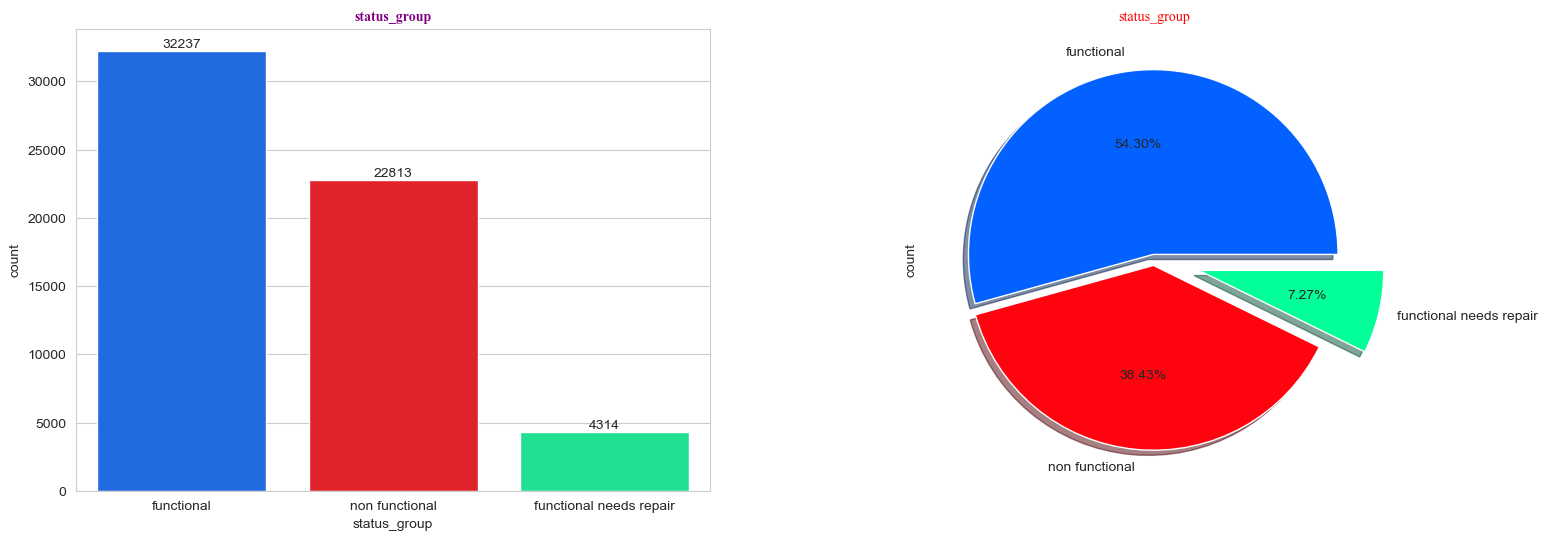

In [22]:
#CountPlot for Target Variable
palette = ['#0362FF','#FF030F','#03FF98']
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='status_group', data=df,palette=palette)
ax.bar_label(ax.containers[0])
plt.title("status_group", fontsize=20,color='purple',font='Times New Roman',fontweight = 'bold')


#Pie Chart for Percentage
ax =plt.subplot(1,2,2)
ax=df['status_group'].value_counts()
ax.plot.pie(explode=[0.03,0.03,0.25],autopct='%1.2f%%',shadow=True,colors = palette);
plt.title(label = "status_group", fontsize = 20,color='Red',font='Times New Roman');
plt.show()

- The dataset comprises 59,364 rows and 40 columns, including the target variable labeled as 'status group'.


- It's crucial to address any data imbalances during subsequent modeling. In our case, the data distribution reveals that 'functional' accounts for 54.30%, 'non-functional' for 38.43%, and 'functional needs repair' for only 7.27%.

In [23]:
df['latitude'].describe()

count    5.936400e+04
mean    -5.709463e+00
std      2.943608e+00
min     -1.164944e+01
25%     -8.541904e+00
50%     -5.023822e+00
75%     -3.326918e+00
max     -2.000000e-08
Name: latitude, dtype: float64

In [24]:
df.describe()

amount_tsh    gps_height     longitude      latitude   num_private  \
count   59364.000000  59364.000000  59364.000000  5.936400e+04  59364.000000   
mean      317.843017    668.702513     34.097560 -5.709463e+00      0.474429   
std      2998.473133    693.131013      6.517065  2.943608e+00     12.239934   
min         0.000000    -90.000000      0.000000 -1.164944e+01      0.000000   
25%         0.000000      0.000000     33.095187 -8.541904e+00      0.000000   
50%         0.000000    370.000000     34.910318 -5.023822e+00      0.000000   
75%        20.000000   1320.000000     37.179490 -3.326918e+00      0.000000   
max    350000.000000   2770.000000     40.345193 -2.000000e-08   1776.000000   

        region_code  district_code    population  construction_year  
count  59364.000000   59364.000000  59364.000000       59364.000000  
mean      15.295516       5.631494    180.019086        1301.441227  
std       17.592619       9.636138    471.604294         951.369704  
min        1.000000       0.000000      0.000000           0.000000  
25%        5.000000       2.000000      0.000000           0.000000  
50%       12.000000       3.000000     25.000000        1986.000000  
75%       17.000000       5.000000    215.000000        2004.000000  
max       99.000000      80.000000  30500.000000        2013.000000

As per the given data description, a minimum longitude value of zero is established, aligning with the Prime Meridian. This meridian runs through specific African countries: Algeria, Mali, Burkina Faso, Togo, and Ghana.
- Tanzania, located in Africa with coordinates around 6.3690° S latitude and 34.8888° E longitude, has longitudes ranging from 29 to 40. Any longitude values lower than 28 degrees for Tanzania would likely be considered as missing values.
- *For more information, click* [*here*](https://www.mapsofworld.com/lat_long/tanzania-lat-long.html).

## EDA

#### Univariate Analysis

#### Latitude and Longitude

In [25]:
def uni_analysis(col,title):
    sns.set_context("paper")
    plt.figure(figsize=(7,4))
    sns.distplot(df[col],color = 'red')
    plt.title(title)
    plt.show();

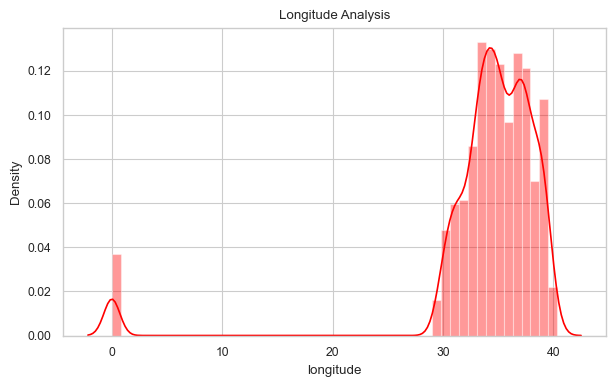

In [26]:
uni_analysis('longitude',"Longitude Analysis")

- The frequency of data points along the Prime Meridian is quite low, making it more practical to exclude them.As these low quantity will not affect our analysis.

In [27]:
len(df[df['longitude'] ==0])

1777

In [28]:
#Replacing the Zero with Null Values and Then Dropping Them

df['longitude'] = df['longitude'].replace(0, np.nan)
df.dropna(subset=['longitude'], inplace=True)

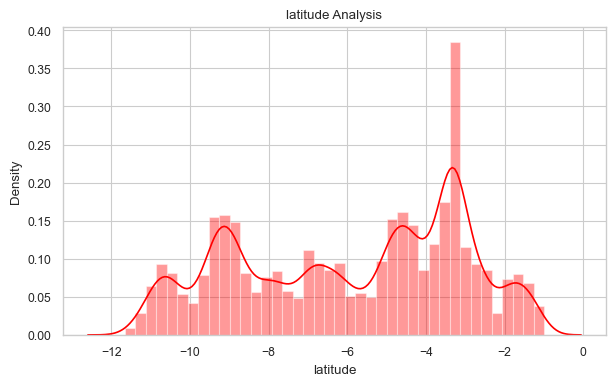

In [29]:
uni_analysis('latitude',"latitude Analysis")

In practice, the latitude values in Tanzania span from 1 to 12, which is evident from the analysis of the chart.

**amount_tsh**

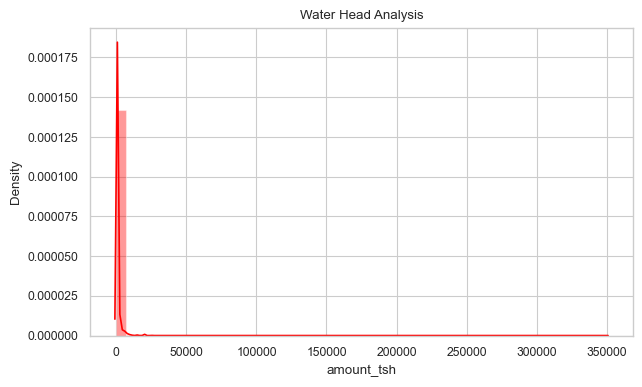

In [30]:
uni_analysis('amount_tsh',"Water Head Analysis")

In [31]:
len(df[df['amount_tsh']==0])

39826

In [32]:
df[df['amount_tsh']==0]['status_group'].value_counts(normalize = True)

status_group
functional                 0.472932
non functional             0.460227
functional needs repair    0.066841
Name: proportion, dtype: float64

- Roughly 70% of the 'amount_tsh' values are zero, while the remaining values are distributed thinly across the range of above 0 to 3,500,000.
- 'amount_tsh' refers to the total static head, representing the available water quantity at a waterpoint.


- When analyzing the value counts of the target variable, an interesting observation emerges: **about 47% of wells with a zero head are categorized as functional**. This observation contradicts practical expectations, raising concerns about the reliability of this independent variable for accurate model predictions.

#### Well Altitude

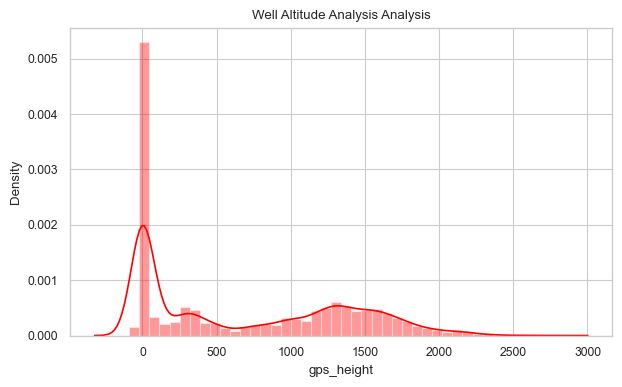

In [33]:
# gps_height is describes as a Well Altitude
uni_analysis('gps_height',"Well Altitude Analysis Analysis")

In [34]:
print("No of the Wells On the Benchmark :",len(df[df['gps_height'] ==0]))
print("No of the Wells Above Benchmark :",len(df[df['gps_height'] >0]))
print("No of the Wells Below Benchmark :",len(df[df['gps_height'] <0]))

No of the Wells On the Benchmark : 18625
No of the Wells Above Benchmark : 37466
No of the Wells Below Benchmark : 1496


- Tanzania Lowest Point : 0m (Indian Ocean)
- Tanzania highest point : 5,895m (Mount KiliManjaro)


- Well Altitude zero is taken at Sea Level which expains Well Altidude as 1000 and Above.
-  As Analysed almost 33% of well altitude is 0 which also the mode of gps_height.**Negative values of Well Altitudes that the well in some areas are below Sea Level and Deep Underground.** 
- Above Analysis about Benchmark can change given further Analysis.

#### Num_Private

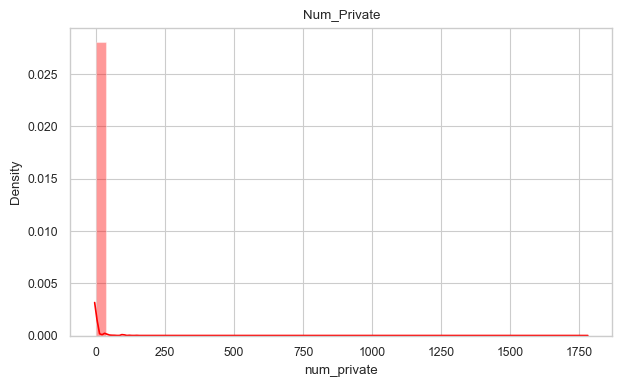

In [35]:
uni_analysis('num_private',"Num_Private")

In [36]:
print("Percent of Zero Num_Private :",len(df[df['num_private']==0])/len(df))

Percent of Zero Num_Private : 0.9868546720614028


- The data source lacks any description of the 'Num Private' feature. Approximately 99% of its values are 0, mirroring the distribution of the 'amount_tsh' feature.
- Due to its highly imbalanced nature,limited variance and lack of information about it, makes it reliability for predictive modeling very less.

#### Population

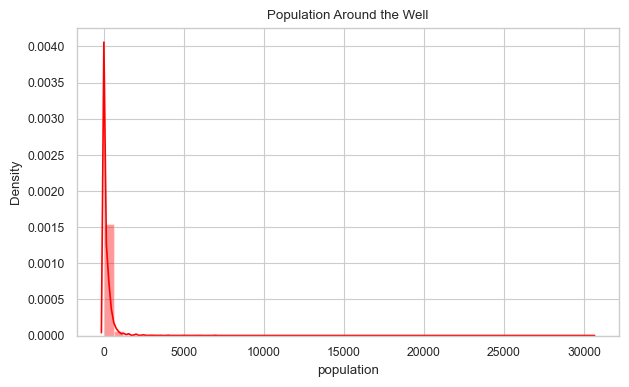

In [37]:
uni_analysis('population',"Population Around the Well")

In [38]:
print("No of Well with No Population Around:",len(df[df['population']==0]))
print("Percent of Well with Zero Population :",len(df[df['population']==0])/len(df))

No of Well with No Population Around: 19568
Percent of Well with Zero Population : 0.3397989129491031


<Axes: xlabel='population', ylabel='Density'>

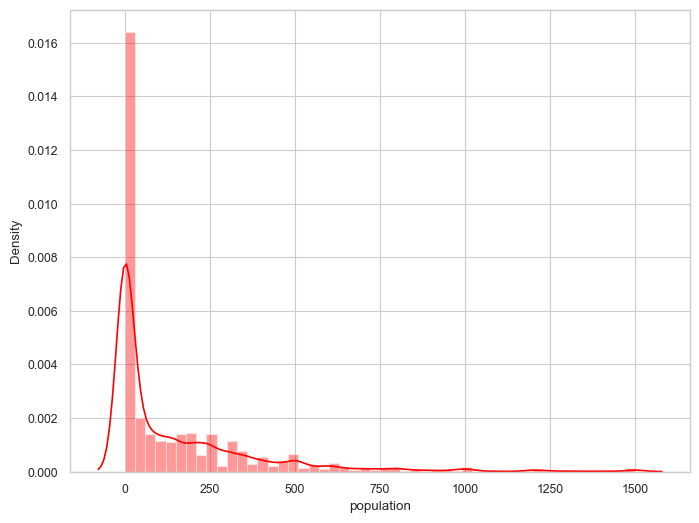

In [39]:
plt.figure(figsize = (8,6))

filtered_population = df.loc[df['population'] <= 1500, 'population']

sns.distplot(filtered_population,color = 'red')

- About 34% of the wells have a population of zero in their vicinity. The population residing around these wells tends to be relatively small, with a majority having fewer than 1500 residents.

- The large portions of Zeroes in most of the features will be challenging for the model predictions and can be point towards missing values.

In [40]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

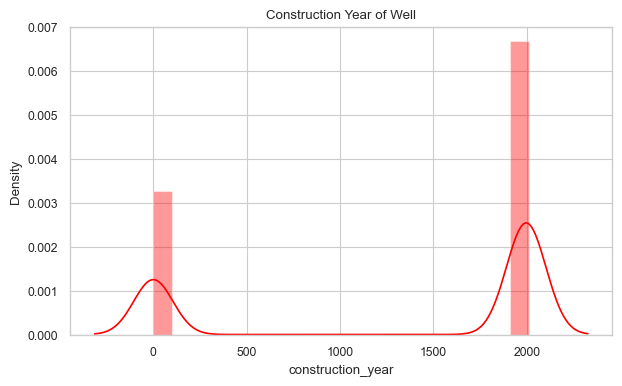

In [41]:
uni_analysis('construction_year',"Construction Year of Well")

In [42]:
print("Percentage of Missing Values in Construction year :",len(df[df['construction_year']> 0])/len(df))

Percentage of Missing Values in Construction year : 0.671870387413826


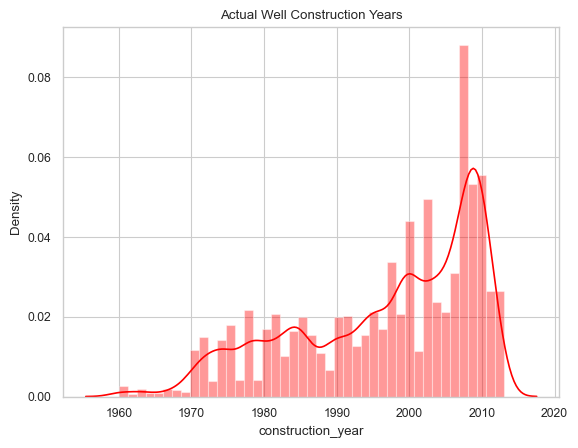

In [43]:
Const_year = df[df['construction_year']!=0]
sns.distplot(Const_year['construction_year'],color ='red')
plt.title("Actual Well Construction Years")
plt.show()

In [44]:
Const_year['construction_year'].describe()

count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

Based on the provided data, the following conclusions can be drawn:
- The average construction year for the wells is 1996.
- The earliest well in the dataset was constructed in 1983.
- The most recent well in the dataset was constructed in 2013.
- A significant number of wells were constructed around the year 2010.

- As zero as a Construction Year is Not practical value unless they are from Jesus Era (haha) and will be treated as Missing Value.
- Number of Null Value in the Construction Year as Feature is more than 65%.The Imputation of missing values can change the feature distribution and comprise the realibilty of predictions.

#### Region

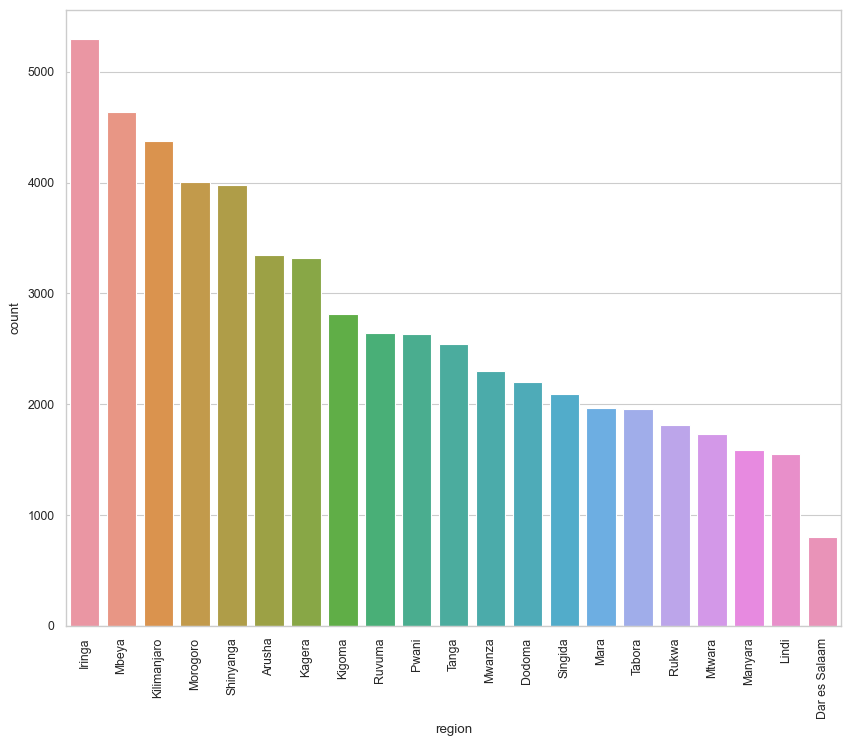

In [45]:
plt.figure(figsize = (10,8))
region_counts = df['region'].value_counts()
region_sort = region_counts.index

sns.countplot(data=df, x='region', order=region_sort)

plt.xticks(rotation=90)
plt.show()

#### Region Code

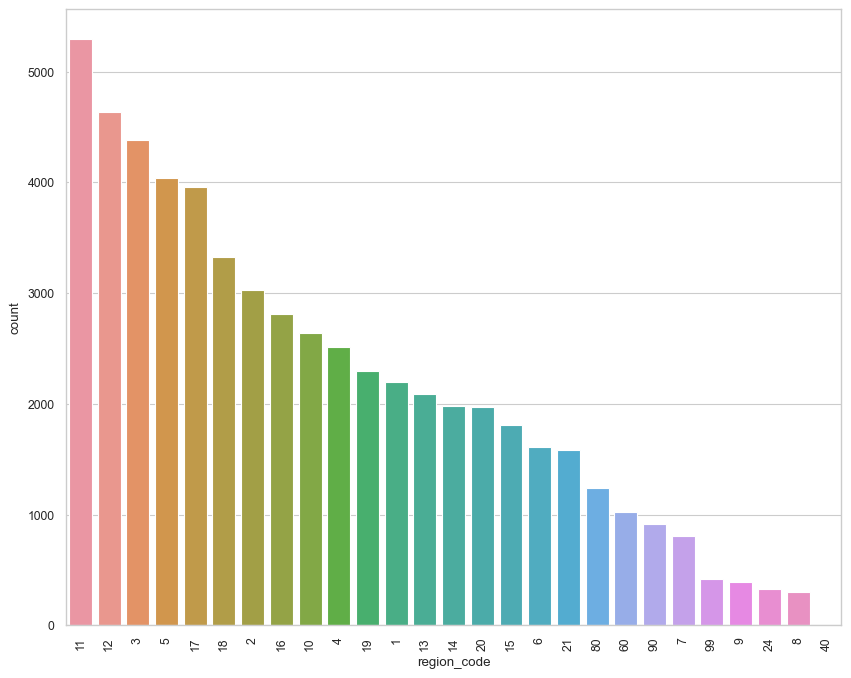

In [46]:
plt.figure(figsize = (10,8))

region_counts = df['region_code'].value_counts()
region_sort = region_counts.index

sns.countplot(data=df, x='region_code', order=region_sort)

plt.xticks(rotation=90)
plt.show()

- Number of Regions are 21 but Number of Region Code are 27 which may be due some larger areas might have been divided into different region Codes

### Impact of Independent Features on the Functionality of Wells

#### Effect of Years on Functionality of Wells

In [47]:
df['construction_year'].value_counts(normalize = True)[:6]

construction_year
0       0.328130
2010    0.045931
2008    0.045375
2009    0.043986
2000    0.036310
2007    0.027558
Name: proportion, dtype: float64

In [48]:
#Analysis on Construction Year Without Missing Values
Const_year = df[df['construction_year']!=0]

const =Const_year.groupby(['construction_year', 'status_group']).size().reset_index(name='count')

In [49]:
# Making a Pivot Table for each Category of Status Group
pivot_table = const.pivot_table(index='construction_year', columns='status_group',
                               values='count', aggfunc='sum', fill_value=0)
pivot_table.head()

status_group       functional  functional needs repair  non functional
construction_year                                                     
1960                       24                        6              72
1961                        2                        3              16
1962                        7                        1              22
1963                       31                        6              48
1964                        7                        1              32

In [50]:
pivot_table['Total'] = pivot_table[['functional', 'functional needs repair', 'non functional']].sum(axis=1)

In [51]:
pivot_table =pivot_table.reset_index()
pivot_table.head()

status_group  construction_year  functional  functional needs repair  \
0                          1960          24                        6   
1                          1961           2                        3   
2                          1962           7                        1   
3                          1963          31                        6   
4                          1964           7                        1   

status_group  non functional  Total  
0                         72    102  
1                         16     21  
2                         22     30  
3                         48     85  
4                         32     40

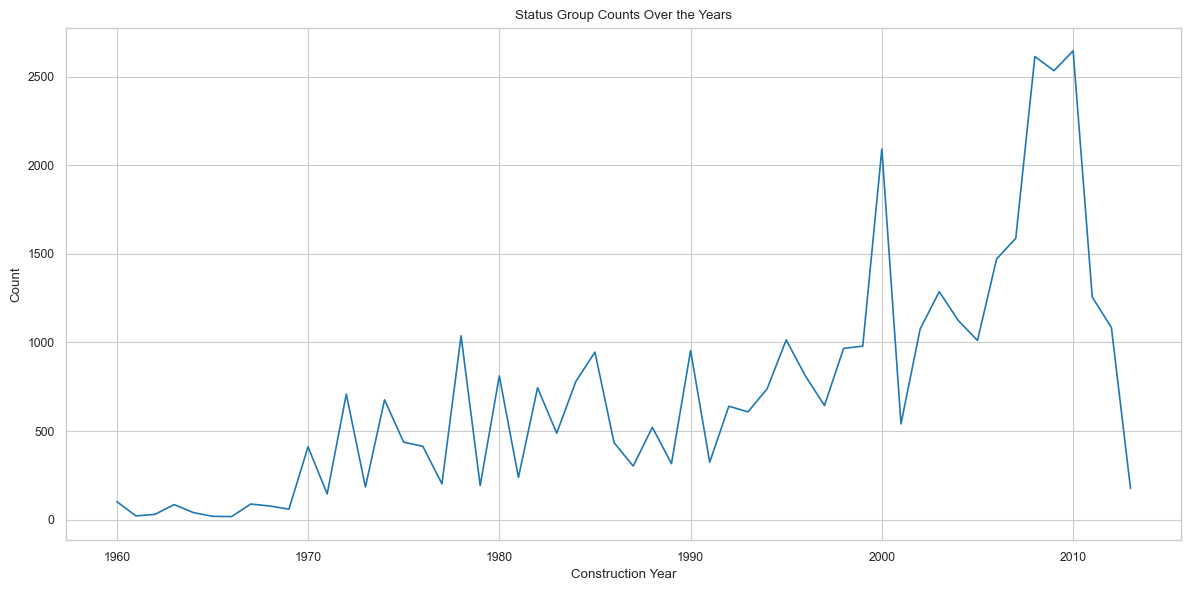

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='construction_year', y='Total', data=pivot_table)

plt.xlabel('Construction Year')
plt.ylabel('Count')

plt.title('Status Group Counts Over the Years')

plt.tight_layout()
plt.show()

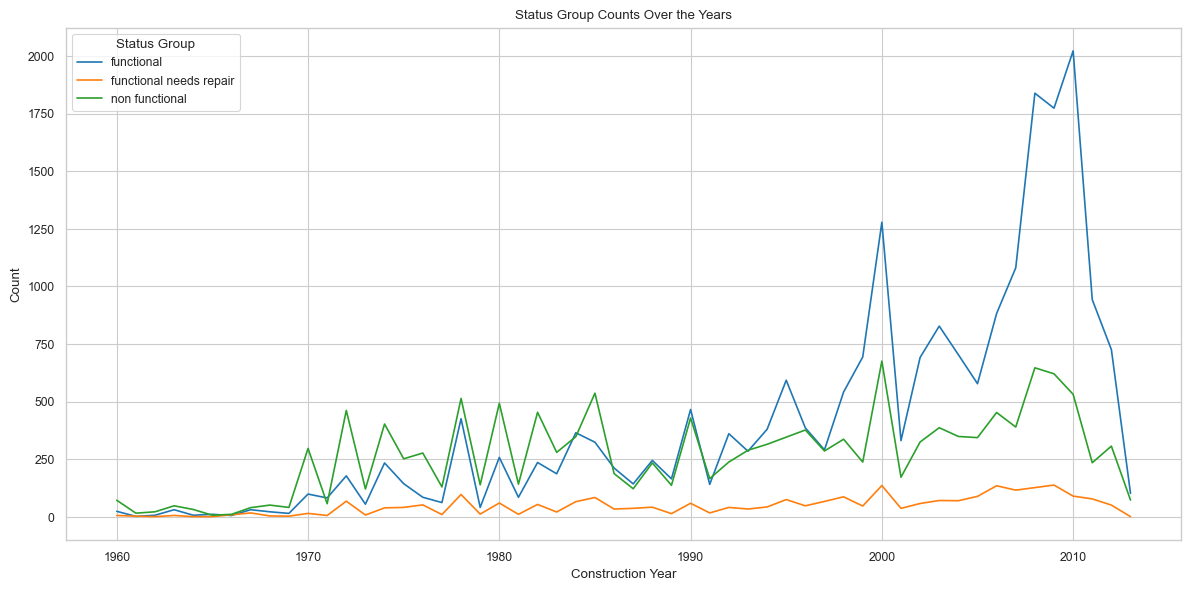

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='construction_year', y='count', hue='status_group', data=const)

plt.xlabel('Construction Year')
plt.ylabel('Count')

plt.title('Status Group Counts Over the Years')
plt.legend(title='Status Group')
plt.tight_layout()
plt.show()

- In practice, one might expect the count of Functional Wells to decrease over the years. However, it's interesting to note that the maximum number of functional wells occurs in 2010, possibly due to a significant number of wells being constructed in that year.


- The count of Non-Functional Wells has shown volatility over the years, which suggests there may have been ongoing repairs and maintenance. This volatility likely stems from wells transitioning from non-functional to functional due to repairs, indicating a changing well category. This phenomenon has also contributed to the fluctuation in counts over time.This is just a conclusion on available non missing data and cannot be full drawn.


- Second Reason might have been the Missing Values given as Zero as the Total Count of Wells each Year is Varying.We cannot draw Any Concrete Conclusion from the Construction Year Feature impact on Dependent Variable

#### Anamoly Detection

In [54]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

# For the Analysis
df['Reorded_Year'] = df['date_recorded'].dt.year

df['Recorded_Month']= df['date_recorded'].dt.month_name() #For month name

In [55]:
anomaly = df[df['Reorded_Year'] < df['construction_year']]
df = df.drop(anomaly.index)

- As the Year of Recoreded Date of Data point Cannot be less than the Construction Year

### Geospatial Comparision with Functinality of Well

**Latitude:**

- (+) values of latitude are in the northern hemisphere, indicating a location north of the equator.
- (-) values of latitude are in the southern hemisphere, indicating a location south of the equator.
- A latitude of 0 degrees is at the equator.

**Longitude:**

- (+) of longitude are in the eastern hemisphere, indicating a location east of the prime meridian.
- (-) values of longitude are in the western hemisphere, indicating a location west of the prime meridian.
- A longitude of 0 degrees is at the prime meridian.

In [56]:
df['status_group'].value_counts()

status_group
functional                 31384
non functional             22263
functional needs repair     3931
Name: count, dtype: int64

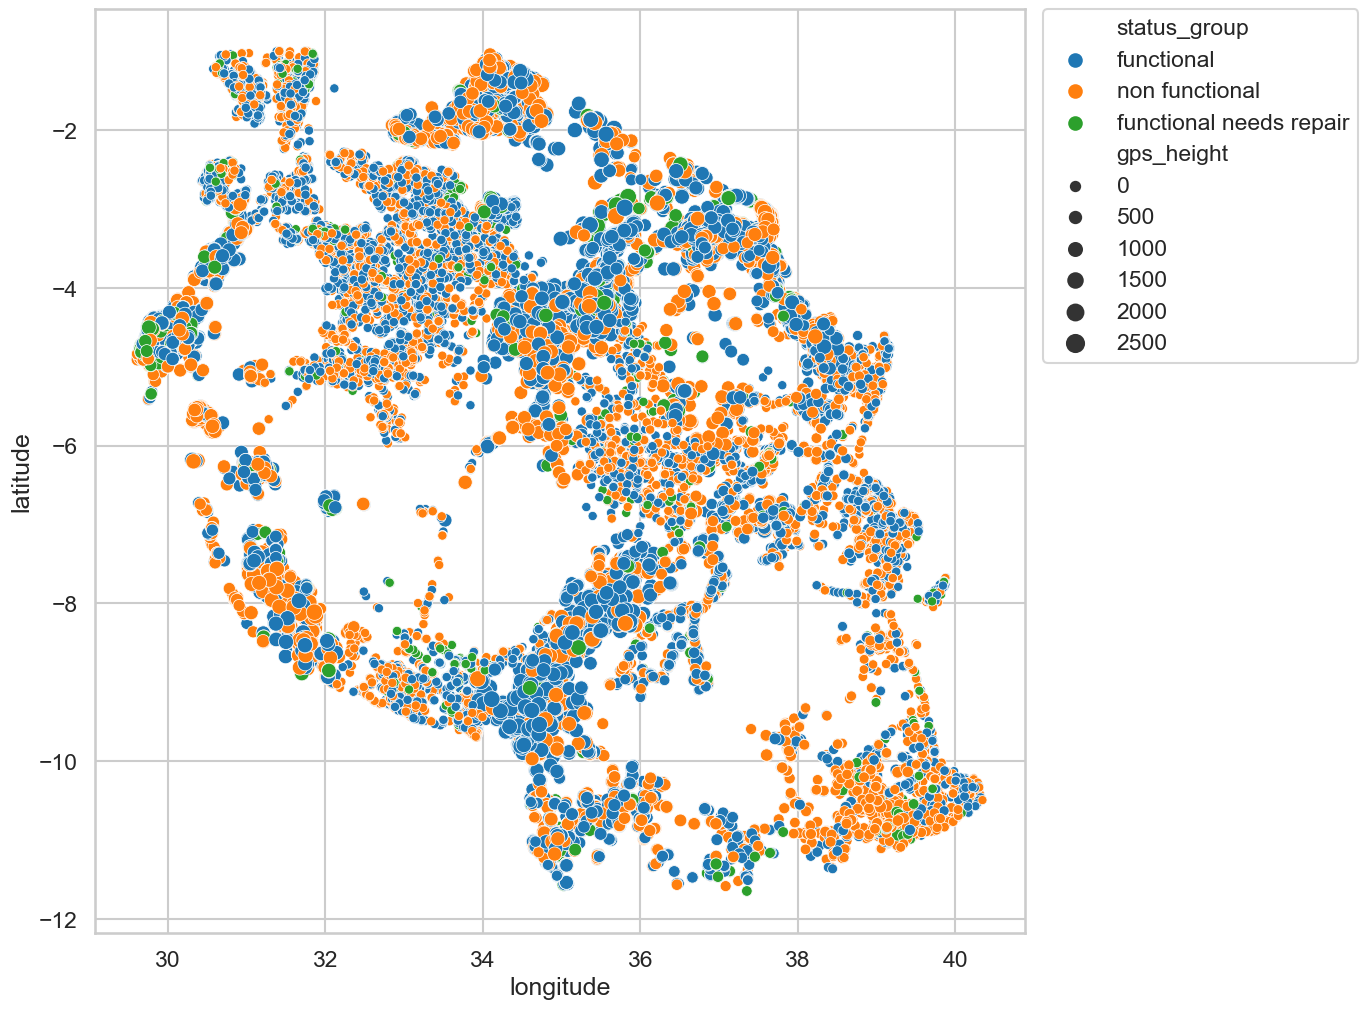

In [57]:
sns.set_context('talk')
plt.figure(figsize = (12,12))

sns.scatterplot(x ='longitude',y ='latitude',size= 'gps_height',hue = 'status_group',
                data = df)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()

#### Functional Wells in Tanzania

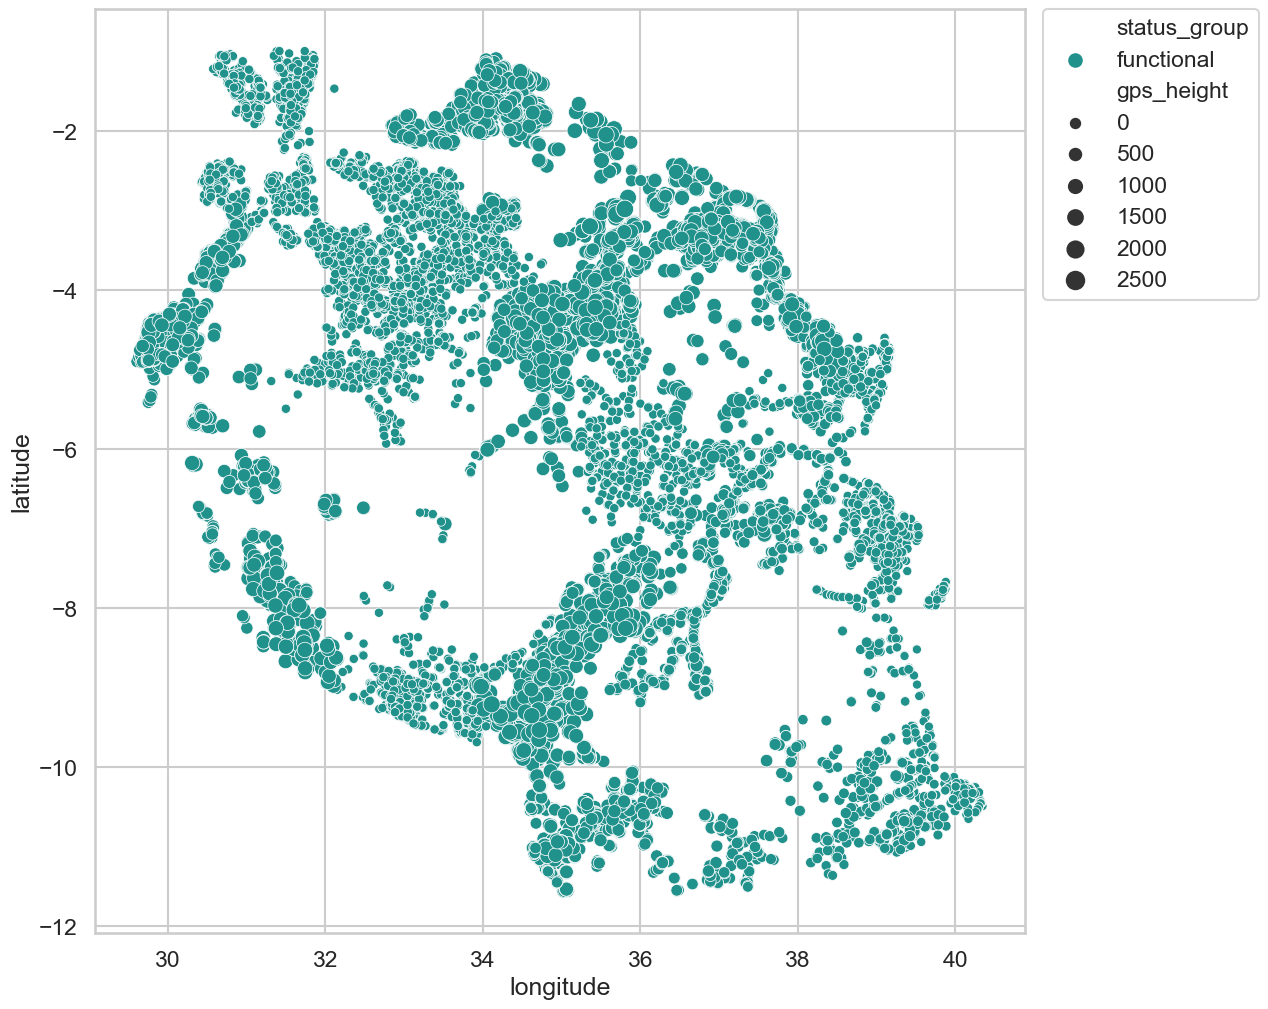

In [58]:
sns.set_context('talk')
plt.figure(figsize = (12,12))

sns.scatterplot(x ='longitude',y ='latitude',size= 'gps_height',hue = 'status_group',
                data = df[df['status_group']=='functional'],palette = "viridis" )

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()

- SouthEast and SouthWest Areas : Fuctional Well Altitude More than 1500.
- NorthWest Areas : Fuctional Wells Altutide with less than 1000. 

#### Non Functional Wells in Tanzania 

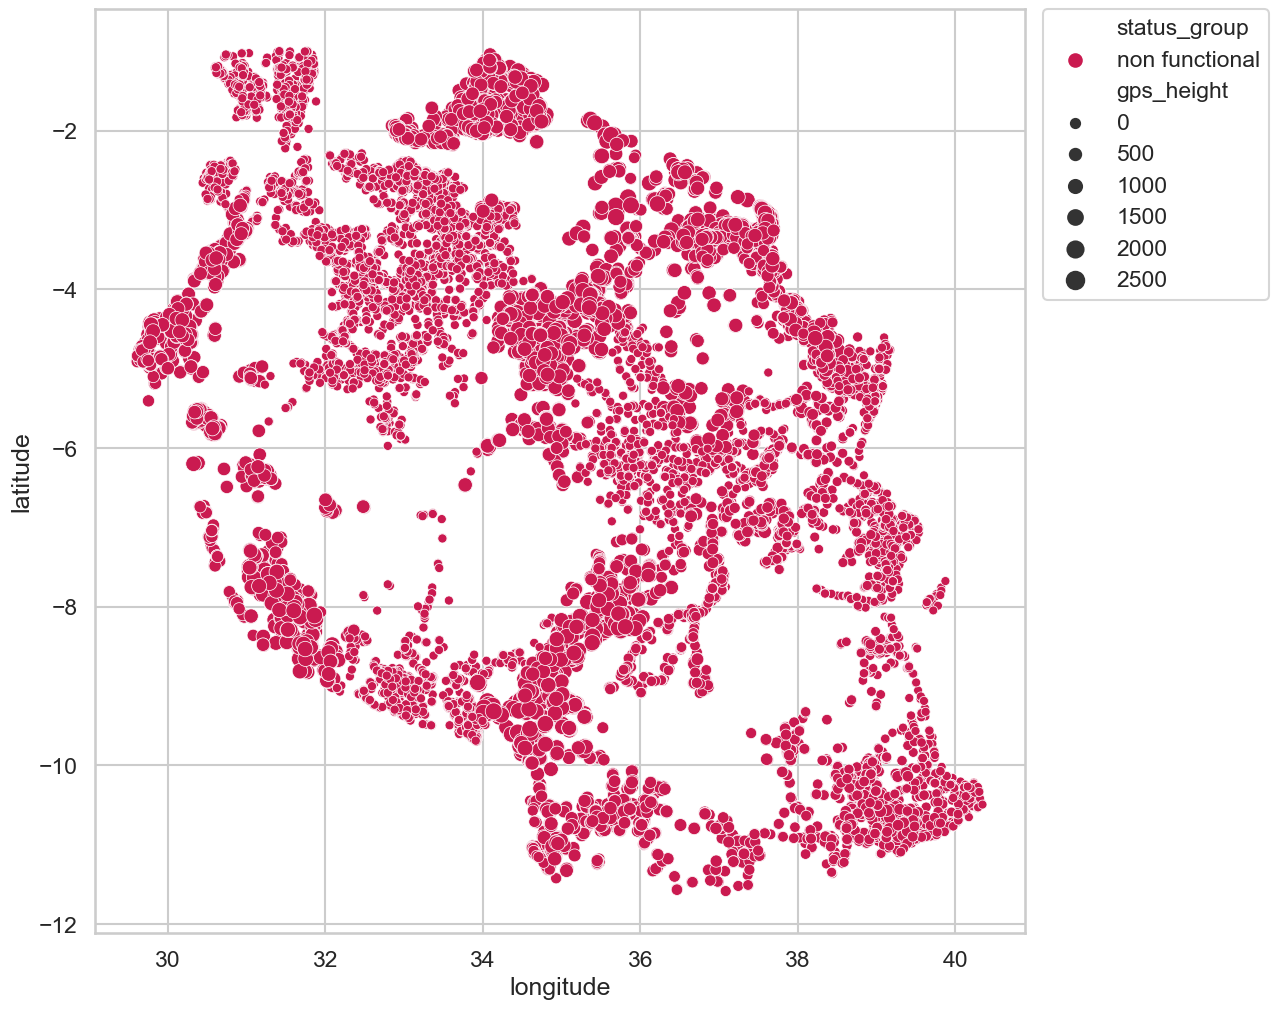

In [59]:
plt.figure(figsize = (12,12))
sns.scatterplot(y = 'latitude',x= 'longitude',size= 'gps_height',hue = 'status_group',
                data = df[df['status_group']=='non functional'],palette = 'rocket_r' )
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

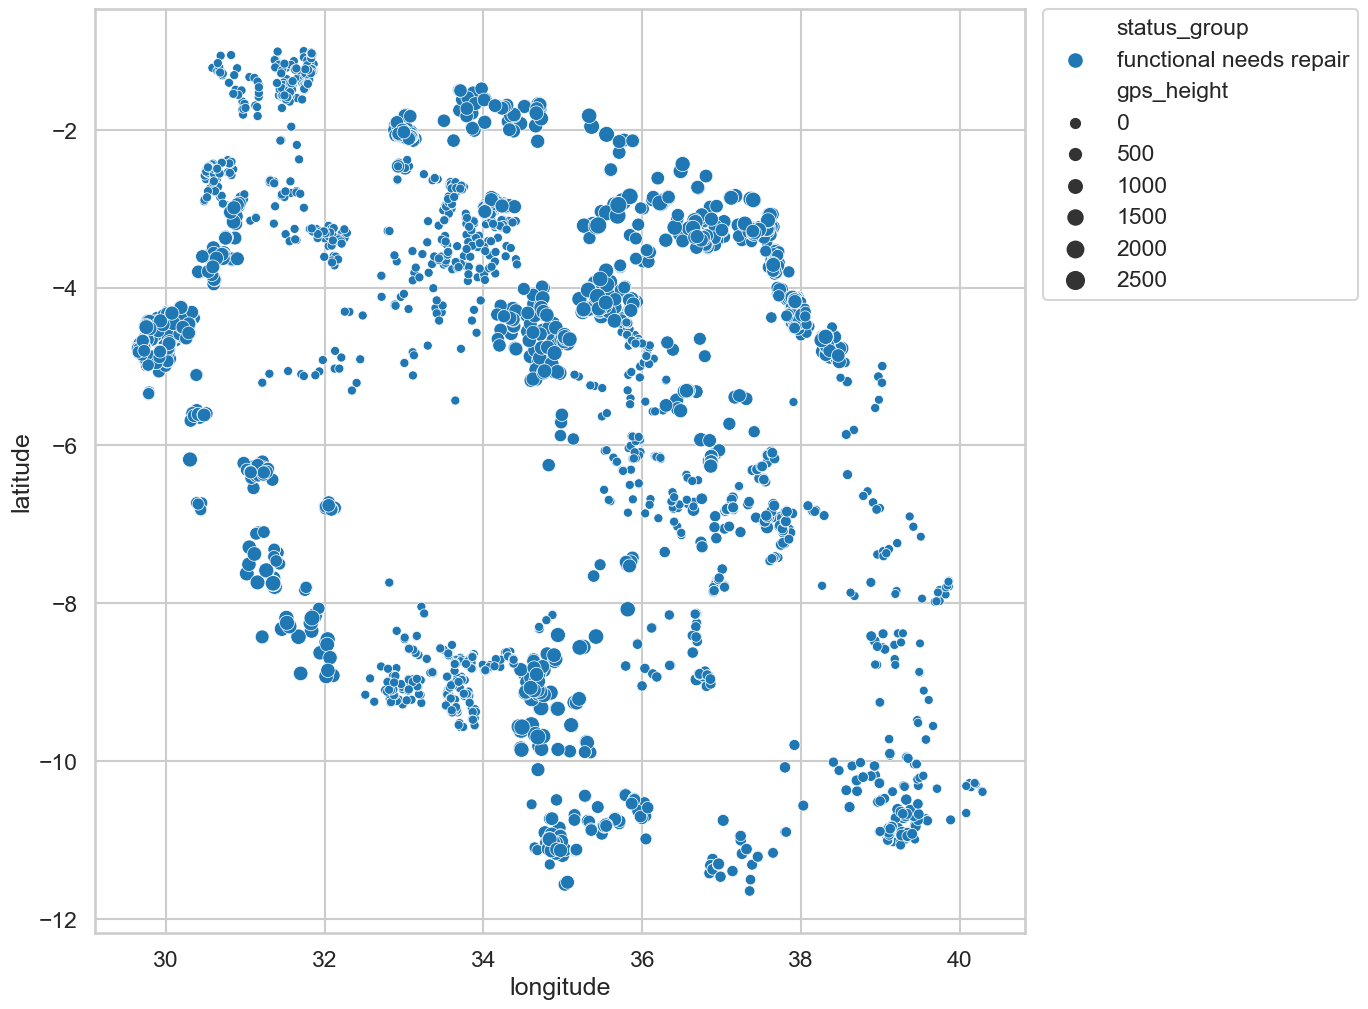

In [60]:
plt.figure(figsize = (12,12))

sns.scatterplot(x = 'longitude',y = 'latitude',size= 'gps_height',hue = 'status_group',
                data = df[df['status_group']=='functional needs repair' ],palette = 'tab10')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

**Map Comparison Insights:**

- A significant number of wells 1500 well altitude are strategically located around freshwater bodies like Lake Nyasa in the southwestern region and Lake Victoria in the northeastern region of Tanzania, aligning with the map's geography.


- Notably, there is a considerable absence of well constructions along rivers, possibly attributed to rivers' natural role as drainage channels. When a river's elevation is lower than the surrounding land, it prompts groundwater to flow toward the river, leading to lower groundwater levels nearby.


- However, there's an interesting exception with a dense cluster of wells around the Rufiji. But the river's decreased flows since the early 1990s and continuos dry spells may be the reason behind extensive well construction found in this area are non functional . This phenomenon could be linked to inadequate water management and unregulated rice irrigation schemes, factors that have contributed to the river's diminished water supply. More details about the Great Ruaha River can be found [here](https://en.wikipedia.org/wiki/Great_Ruaha_River)

#### Fuction for Visualization

In [61]:
def plot_stackedbar(df, title, figsize):
    colors = ['#0362FF','#03FF98','#FF030F']
    labels = list(df.columns)

    fig, ax = plt.subplots(1, figsize=figsize)
    left = len(df) * [1]
    
    for idx, name in enumerate(labels):
        plt.barh(df.index, 
                 df[name], 
                 left=left, 
                 color=colors[idx], 
                 height=0.4)
        left = left + df[name]
        
    # title and subtitle
    plt.title(title, loc='left', fontsize=22, pad=10)
    
    # legend
    plt.legend(labels, 
               bbox_to_anchor=([1, 1, 0, 0]), 
               ncol=1, 
               frameon=True, 
               fontsize=14)

    # adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    
    # reset font size for yticks
    ax.tick_params(axis='both', which='major', labelsize=15)
    
plt.show()

#### Region

In [62]:
def crosstab(col):
    data = pd.crosstab(df[col], df['status_group'])
    data = data.sort_values(by='functional', ascending=False)
    return data

In [63]:
region = crosstab('region')
region

status_group   functional  functional needs repair  non functional
region                                                            
Iringa               4140                      123            1030
Kilimanjaro          2640                      322            1417
Mbeya                2319                      504            1816
Arusha               2294                      175             881
Shinyanga            2289                      295            1393
Morogoro             2119                      300            1587
Kagera               1726                      304            1285
Pwani                1555                       36            1041
Ruvuma               1480                      164             996
Tanga                1436                       73            1036
Kigoma               1363                      603             850
Mwanza               1132                      137            1026
Singida              1011                      128             954
Dodoma               1009                      209             983
Manyara               987                       96             500
Mara                  885                       60            1023
Tabora                848                       45            1066
Rukwa                 707                      135             965
Mtwara                523                      126            1080
Dar es Salaam         461                        3             341
Lindi                 460                       93             993

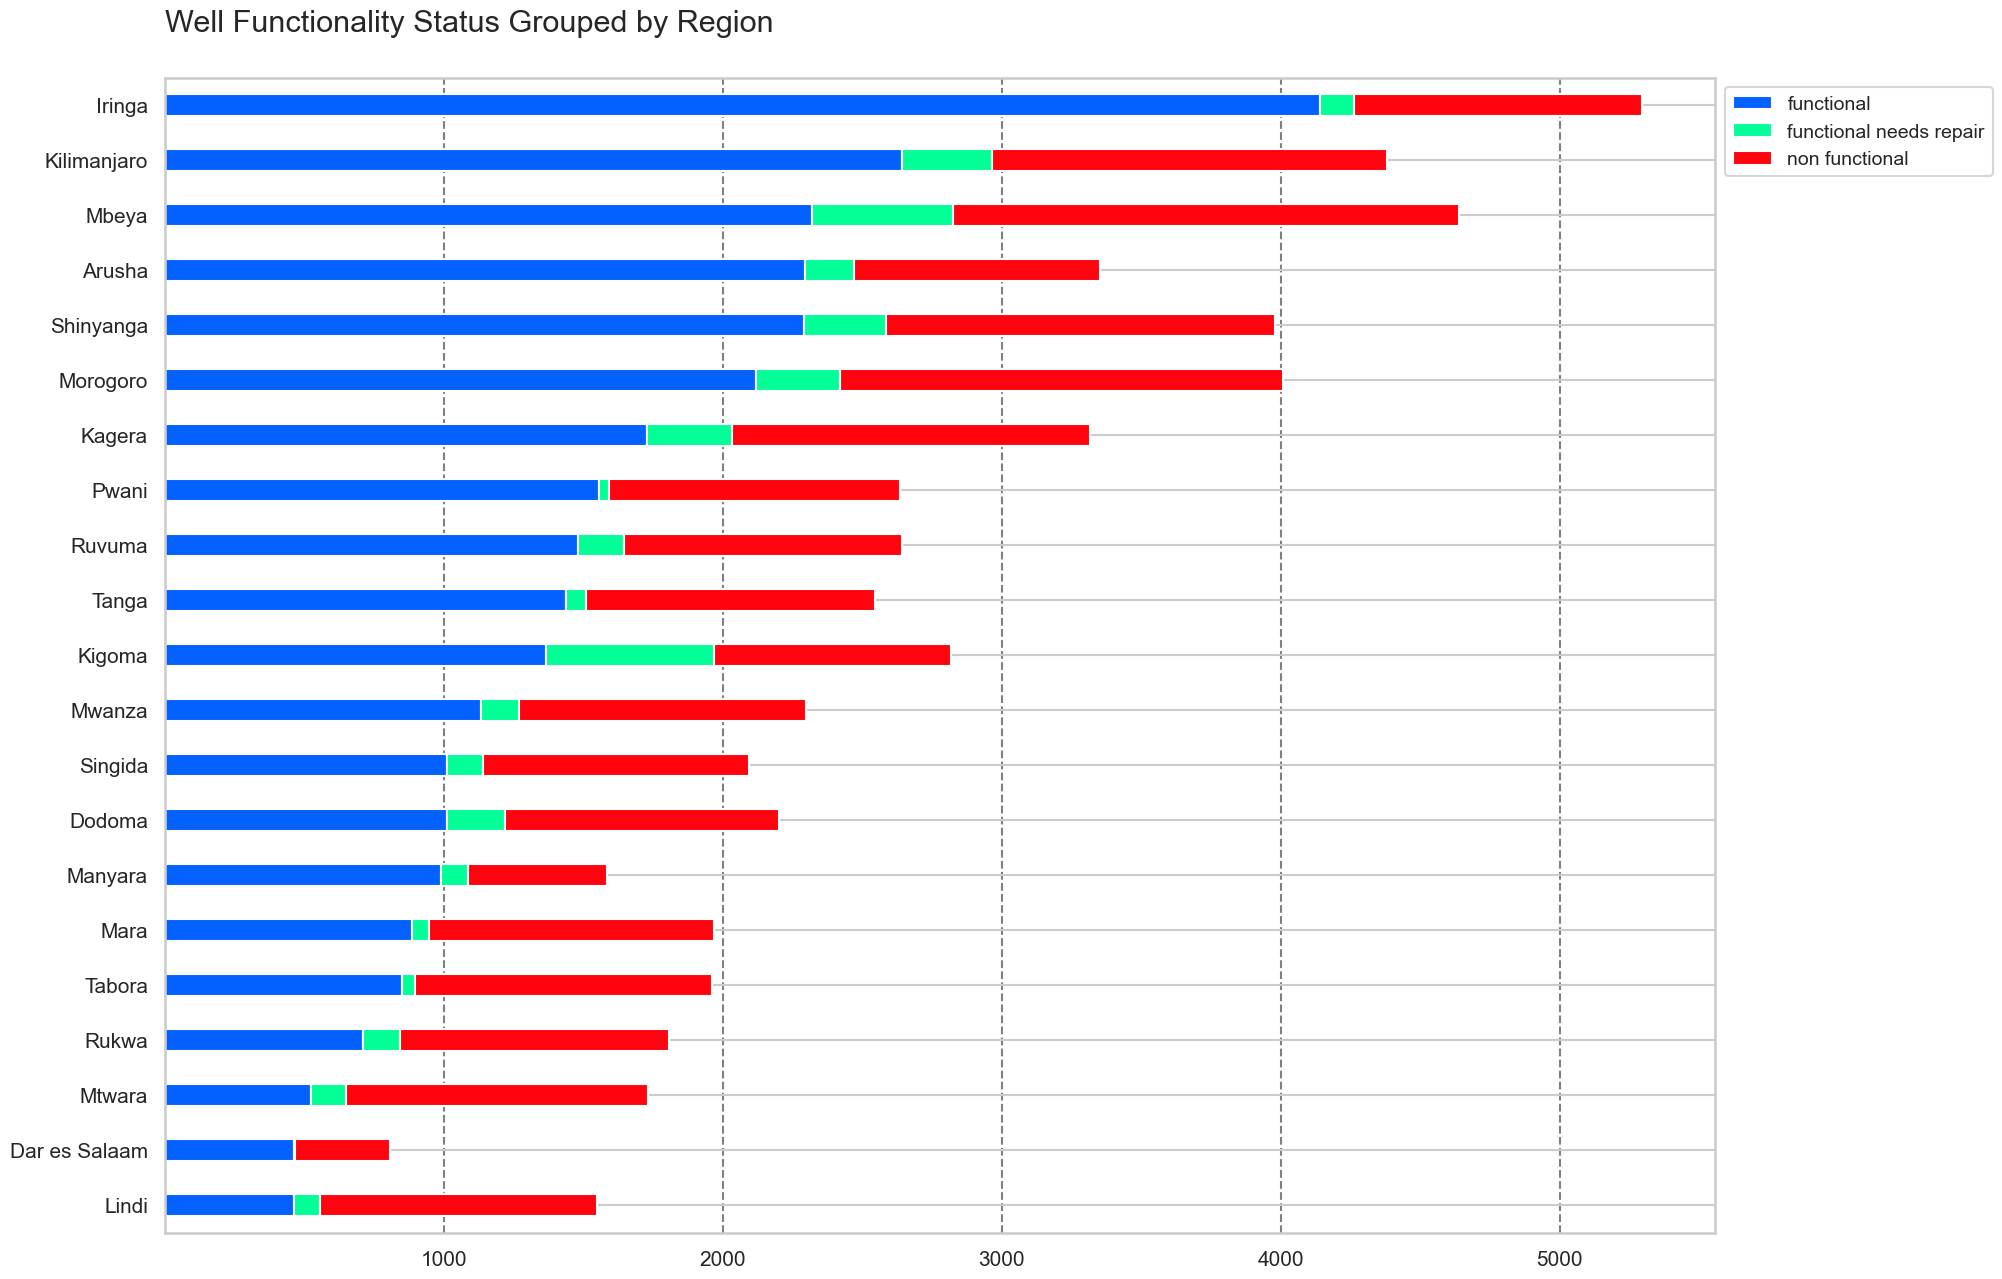

In [61]:
region_wise = pd.crosstab(df['region'], df['status_group']).sort_values(by='functional')
title = 'Well Functionality Status Grouped by Region\n'
plot_stackedbar(region_wise, title, (20,15))

- Even though Dodoma serves as the capital of Tanzania and ranks as the 8th most populous city in the nation, it notably lacks a substantial number of wells in comparison to other urban areas. 


- Interestingly, despite Dar es Salaam holding the status of being the largest and most densely populated city, it surprisingly exhibits the lowest count of wells across the country. Moreover, the number of functional wells in Dar es Salaam is also remarkably deficient, which is worrying considering the city's population size.


- As Dar es Salaam is on coastal regions its ground water may have been infiltrated by Sea's Salt water or groundwater levels in these aquifers can be affected by changes in the tides and the water table might fluctuate more closely in sync with the ocean may be the reason of less well in Dar es Salaam


- Despite Lindi having a greater number of wells compared to Dar es Salaam, it has the lowest count of operational wells in the country.


- Iringa contains the highest number of wells, and it also leads in terms of functional wells.


- The status of wells appears to be closely tied to specific regions, as indicated by the chart. Regions with higher population densities and local government presence around wells tend to has its benefits in terms of regular maintenance and repair.

#### Water Quality

In [64]:
water_quality = crosstab('water_quality')
water_quality

status_group        functional  functional needs repair  non functional
water_quality                                                          
soft                     27978                     3605           17839
salty                     2193                      199            2380
milky                      437                       14             352
unknown                    250                       34            1377
coloured                   246                       51             182
fluoride                   150                       13              36
salty abandoned            126                       15              86
fluoride abandoned           4                        0              11

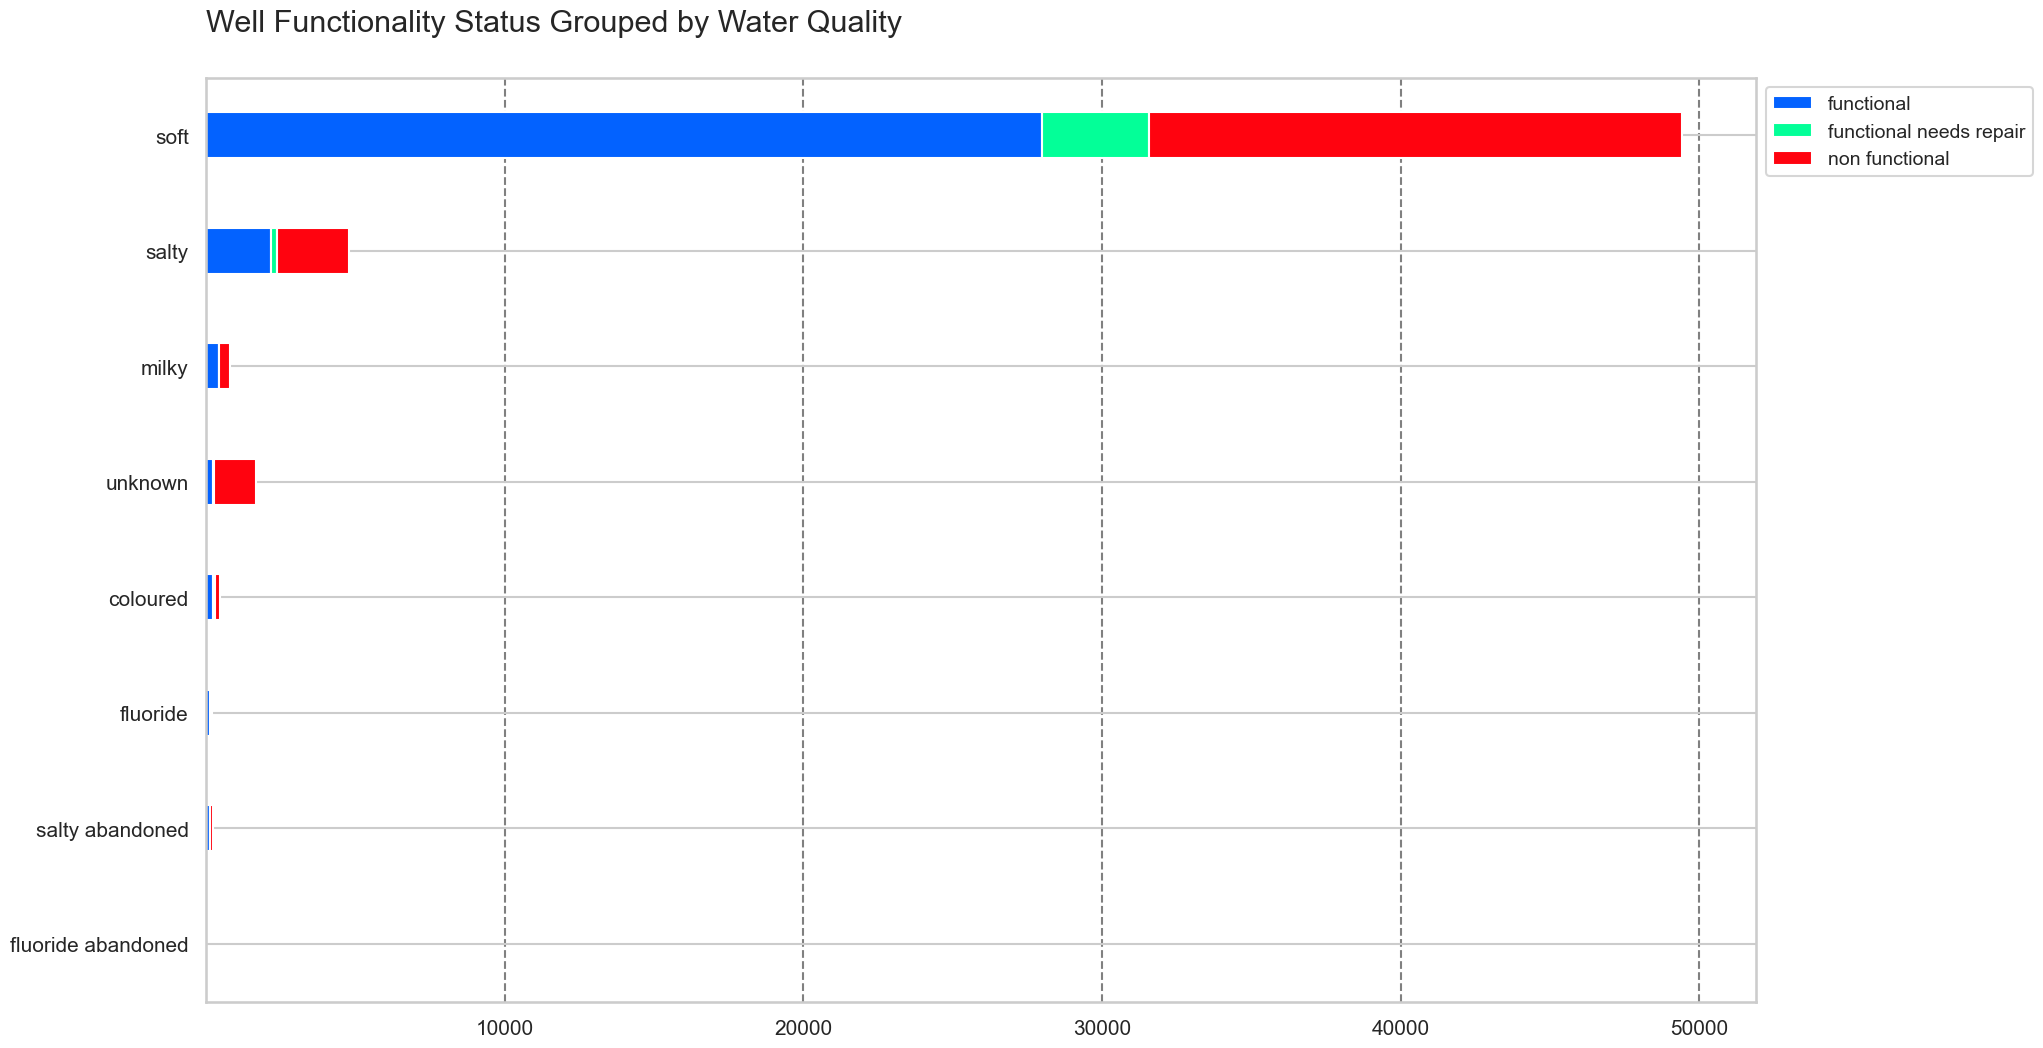

In [65]:
water_qual = pd.crosstab(df['water_quality'], df['status_group']).sort_values(by='functional')
title = 'Well Functionality Status Grouped by Water Quality\n'
plot_stackedbar(water_qual, title, (20,12))

- It's well understood that a higher quantity of wells is more likely to have water of "soft" quality compared to any other water quality category.

#### Water Quantity

In [66]:
water_quantity = crosstab('quantity')
water_quantity

status_group  functional  functional needs repair  non functional
quantity                                                         
enough             21116                     2161            8977
insufficient        7605                     1323            5636
seasonal            2308                      400            1292
unknown              201                       13             559
dry                  154                       34            5799

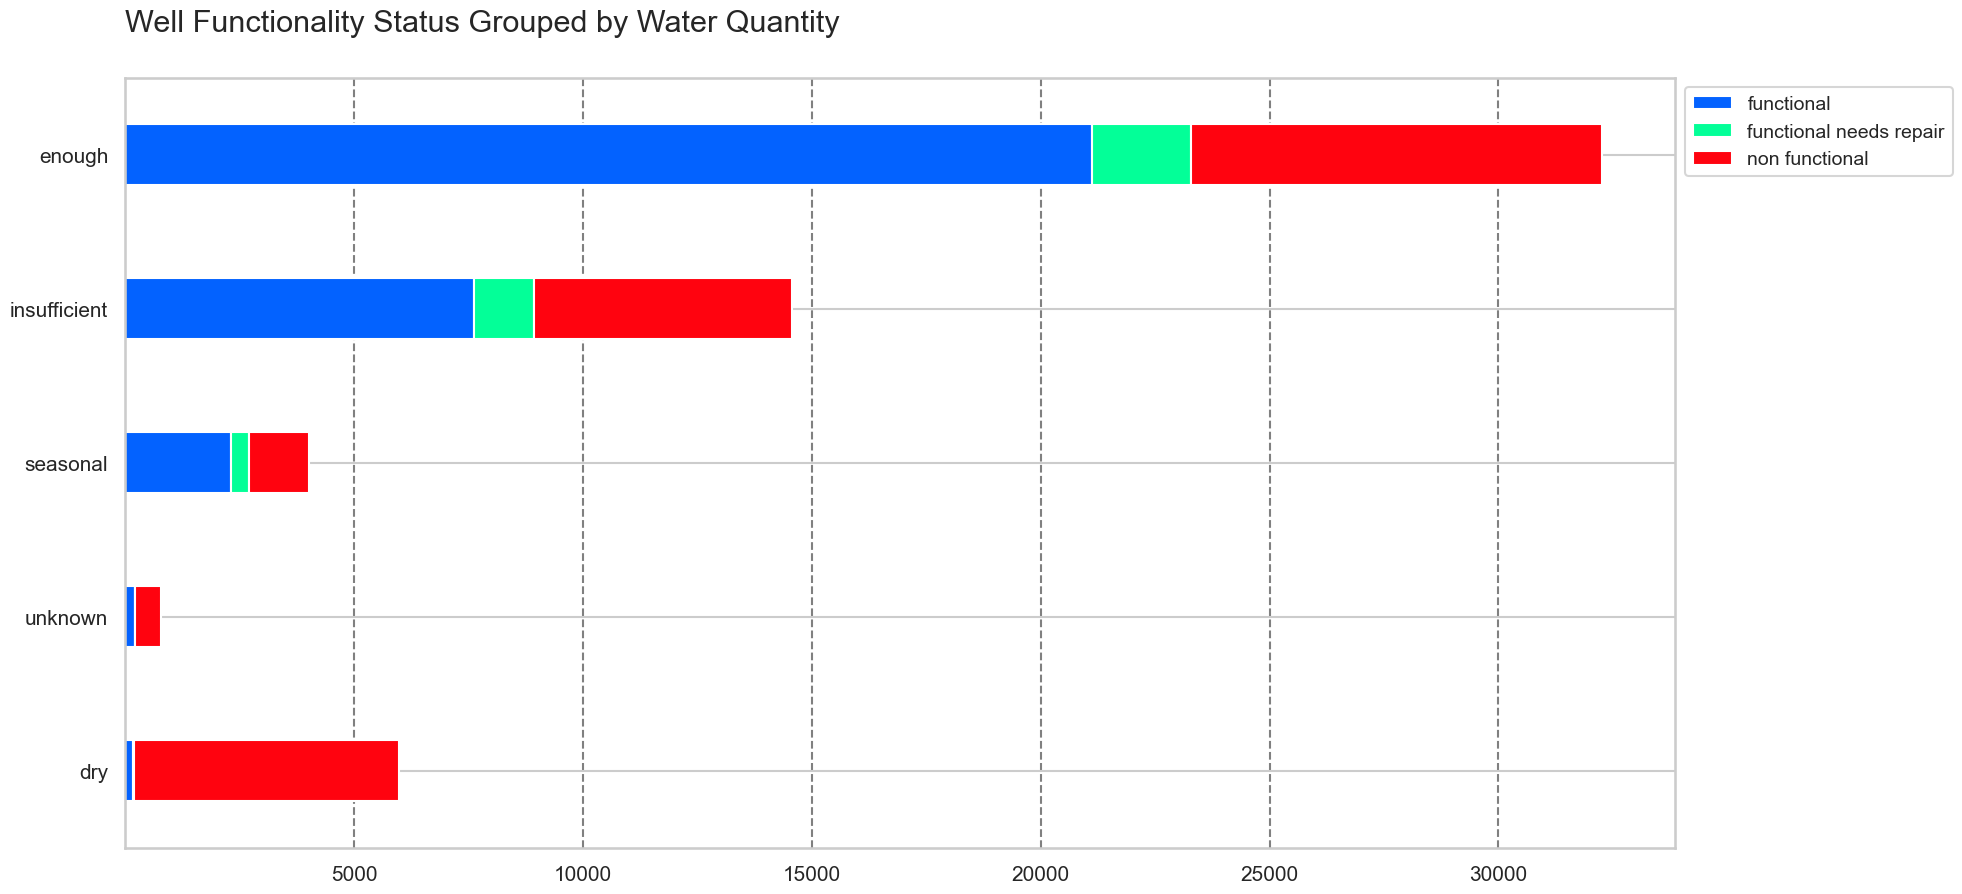

In [67]:
water_quan = pd.crosstab(df['quantity'], df['status_group']).sort_values(by='functional')
title = 'Well Functionality Status Grouped by Water Quantity\n'
plot_stackedbar(water_quan, title, (20,10))

- Analyzing the data reveals a strategic placement of wells around abundant groundwater sources. This is evident from the amount of wells with ample water availability.

- However, despite this strategic positioning, water scarcity affects certain regions, indicating that the amount of well with insufficiency of water quantity ranks as the second most.

- Seasonal wells could originate from regions with lower water levels, serving as reservoirs for rainwater storage.

- Ultimately, it's clear that non functional wells are predominantly those that have run dry.

#### Source

In [68]:
source = crosstab('source')
source

status_group          functional  functional needs repair  non functional
source                                                                   
spring                     10579                     1275            5148
shallow well                7682                      604            7209
river                       5465                     1221            2926
machine dbh                 5281                      478            5067
rainwater harvesting        1335                      295             587
hand dtw                     496                       17             359
dam                          253                       24             372
lake                         135                       12             492
other                        126                        1              75
unknown                       32                        4              28

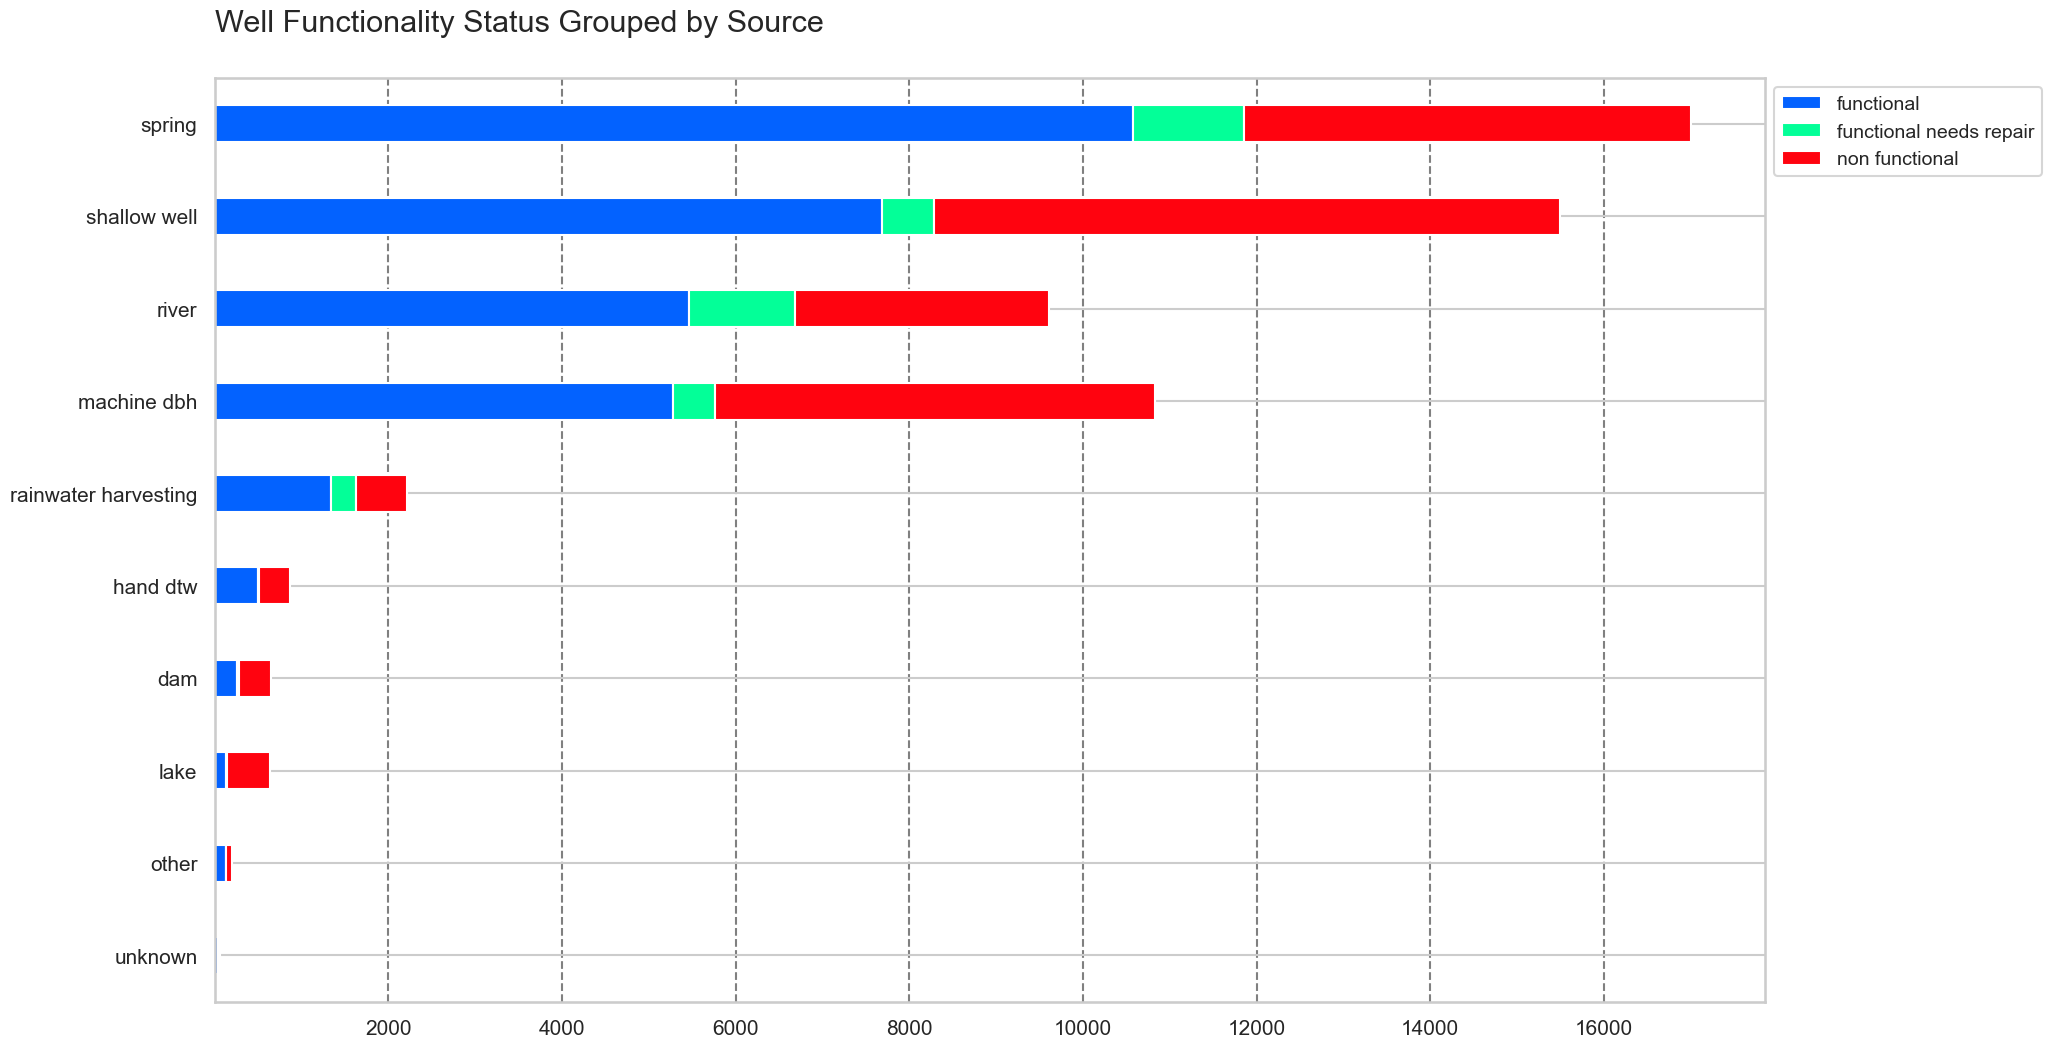

In [69]:
source = pd.crosstab(df['source'], df['status_group']).sort_values(by='functional')
title = 'Well Functionality Status Grouped by Source\n'
plot_stackedbar(source, title, (20,12))

-  Highest total number of wells are dependent on **Spring** as a Source , with a significant portion being non functional, potentially indicating challenges with maintenance or water availability (**Drastically Reducing Ground Water**).


-  A substantial number of total wells have Shallow wells as source , with a relatively balanced distribution between functional and non functional(**44.8% which is higher than average 38%**). Maintenance and groundwater levels might impact their functionality.


- Rivers Source exhibit a relatively higher proportion of functional wells (**57%**) compared to non functional ones (**30%**), suggesting they are generally more reliable water sources.This can be because a signficantly high number of wells are constructed in the vicinity of Rufiji River when compared with practical map of Tanzania.


- **Rainwater Harvesting** has more functional wells which are around **60%** indicating as good technique to fight against scarcity challenges.


#### WaterPoint Type

In [70]:
waterpoint_type = crosstab('waterpoint_type')
waterpoint_type

status_group                 functional  functional needs repair  \
waterpoint_type                                                    
communal standpipe                17646                     2241   
hand pump                         10040                      667   
communal standpipe multiple        2210                      648   
other                               836                      288   
improved spring                     562                       85   
cattle trough                        84                        2   
dam                                   6                        0   

status_group                 non functional  
waterpoint_type                              
communal standpipe                     8486  
hand pump                              5469  
communal standpipe multiple            3100  
other                                  5042  
improved spring                         135  
cattle trough                            30  
dam                                       1

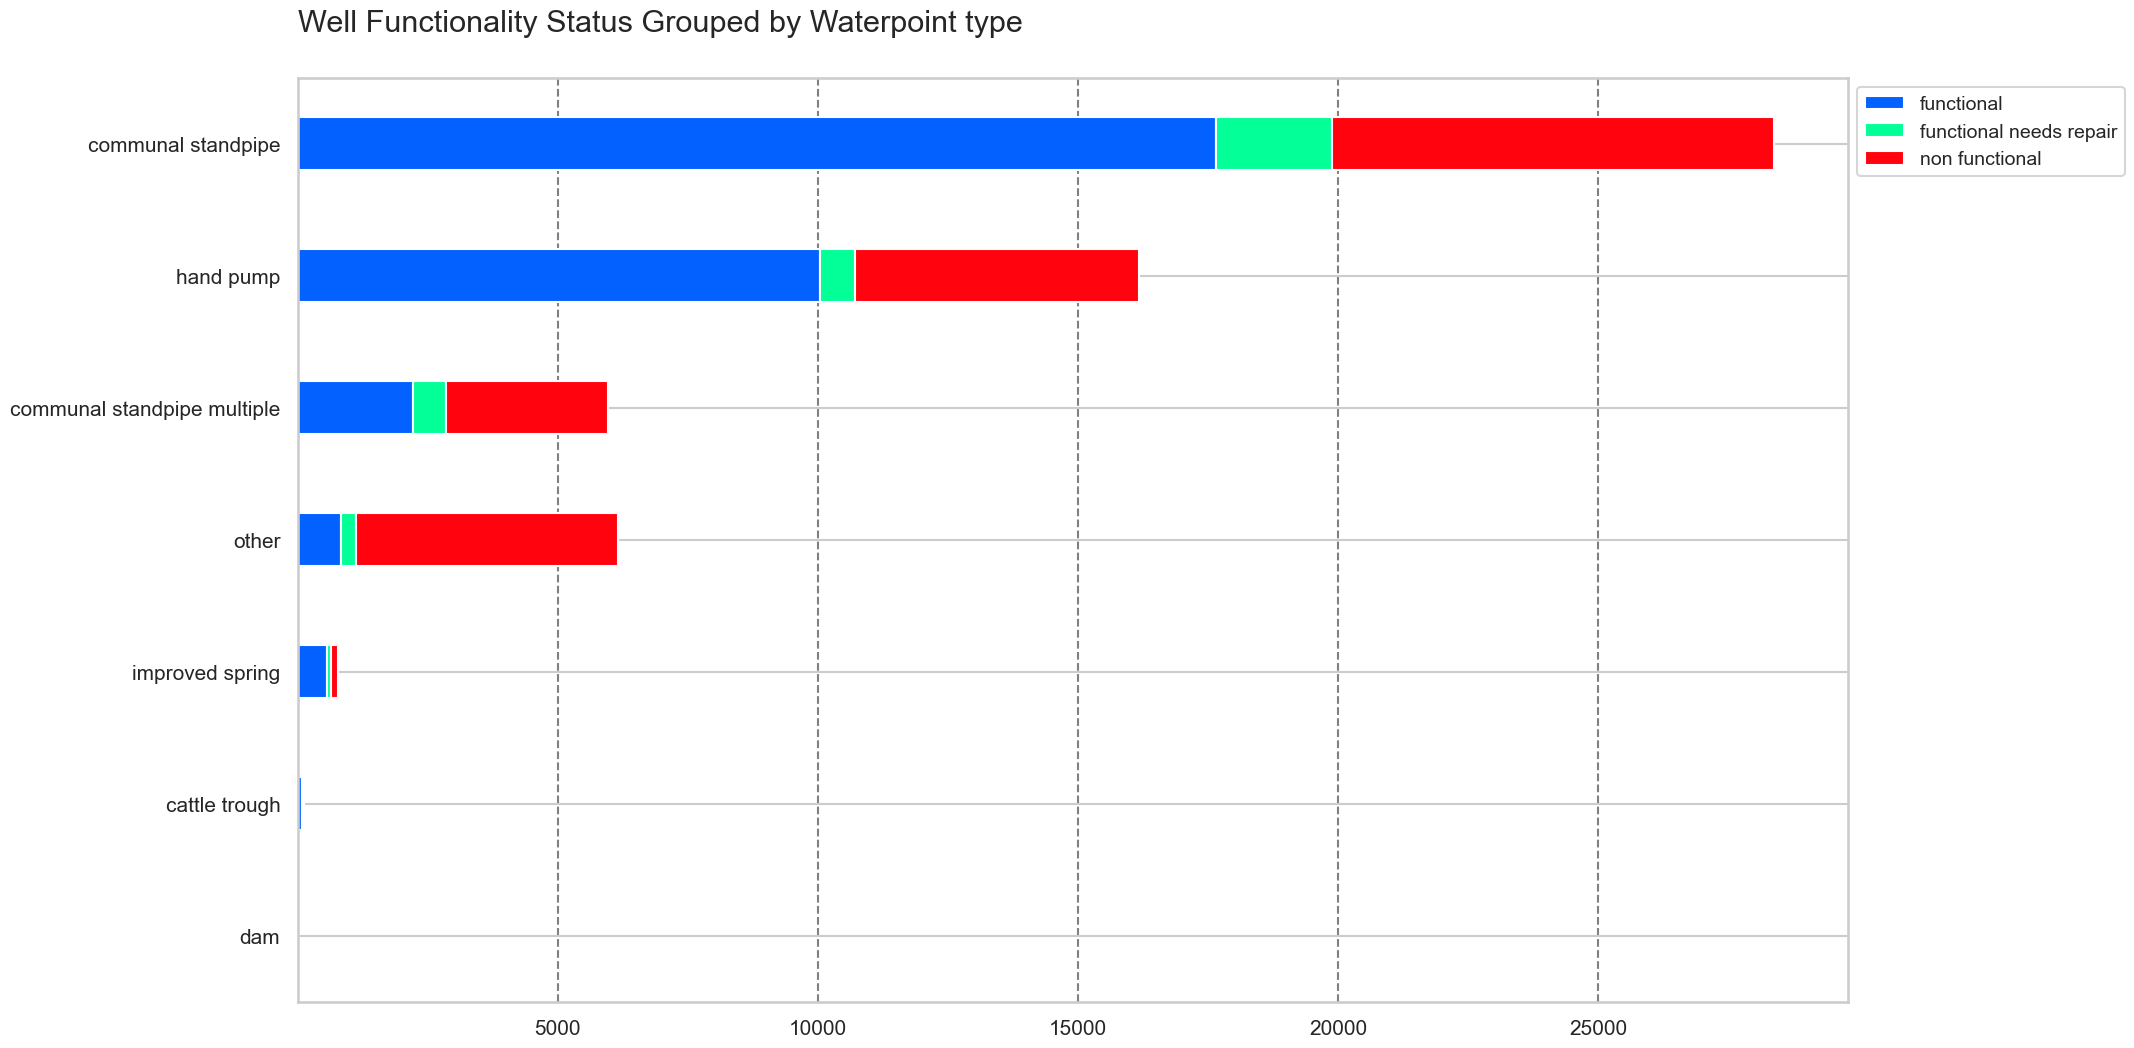

In [71]:
waterpoint_type = pd.crosstab(df['waterpoint_type'], df['status_group']).sort_values(by='functional')
title = 'Well Functionality Status Grouped by Waterpoint type\n'
plot_stackedbar(waterpoint_type, title, (20,12))

#### Extraction Type

In [97]:
extraction_type = crosstab('extraction_type_class')
extraction_type

status_group           functional  functional needs repair  non functional
extraction_type_class                                                     
gravity                     16019                     2689            7984
handpump                     9626                      634            4915
submersible                  3296                      253            2497
motorpump                    1115                      138            1686
other                         986                      193            4980
rope pump                     292                       17             141
wind-powered                   50                        7              60

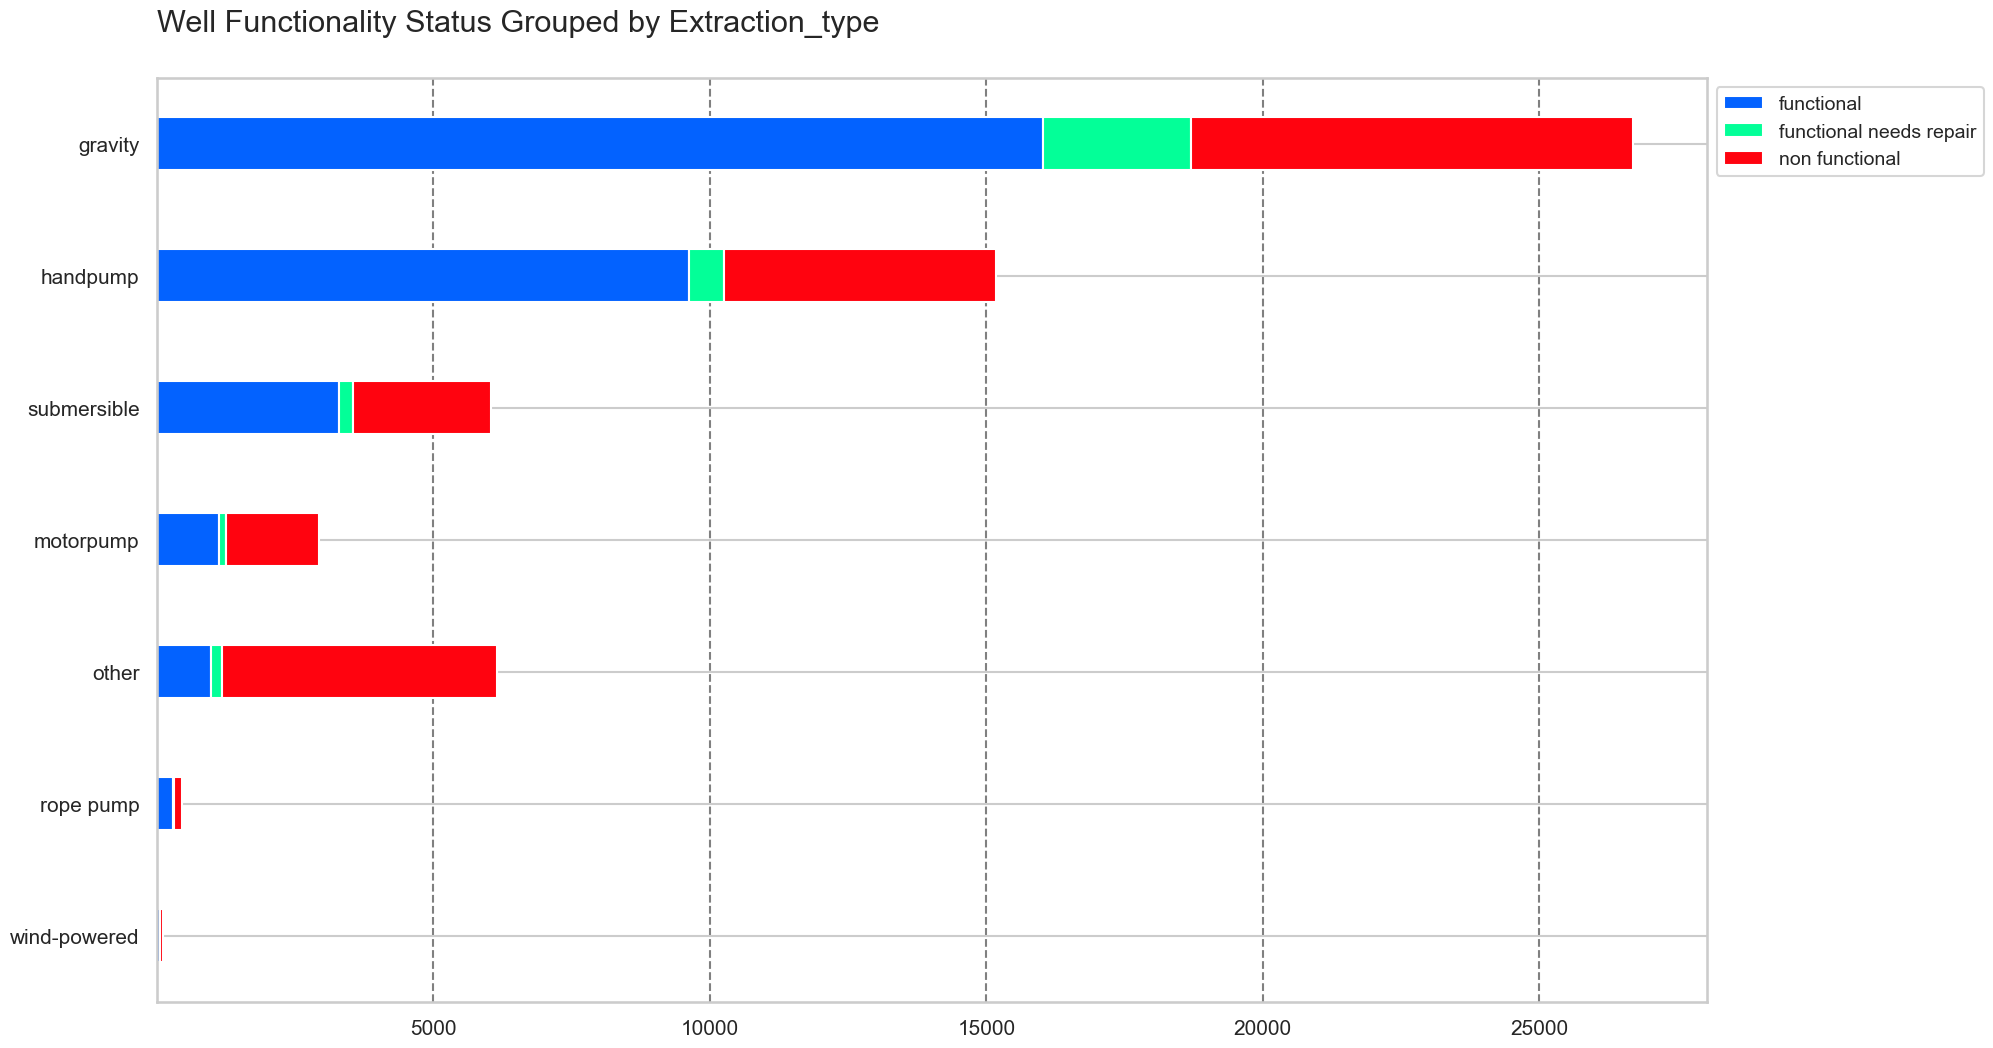

In [98]:
extraction_type = pd.crosstab(df['extraction_type_class'], df['status_group']).sort_values(by='functional')
title = 'Well Functionality Status Grouped by Extraction_type\n'
plot_stackedbar(extraction_type, title, (20,12))

- Despite being very less in Number the **Rose Pump**, Functional Well proportion is higher than average which is 65%.May be geological factor or may be it requires less maintainence

- Other has the highest proportion of Non Functional Well which is **87%**. 

#### Basin

In [99]:
basin = crosstab('basin')
basin

status_group             functional  functional needs repair  non functional
basin                                                                       
Pangani                        5372                      477            3089
Rufiji                         5067                      437            2469
Internal                       4482                      557            2746
Lake Victoria                  4289                      607            3637
Lake Nyasa                     3324                      250            1511
Wami / Ruvu                    3135                      269            2582
Lake Tanganyika                3046                      738            2548
Ruvuma / Southern Coast        1669                      326            2497
Lake Rukwa                     1000                      270            1184

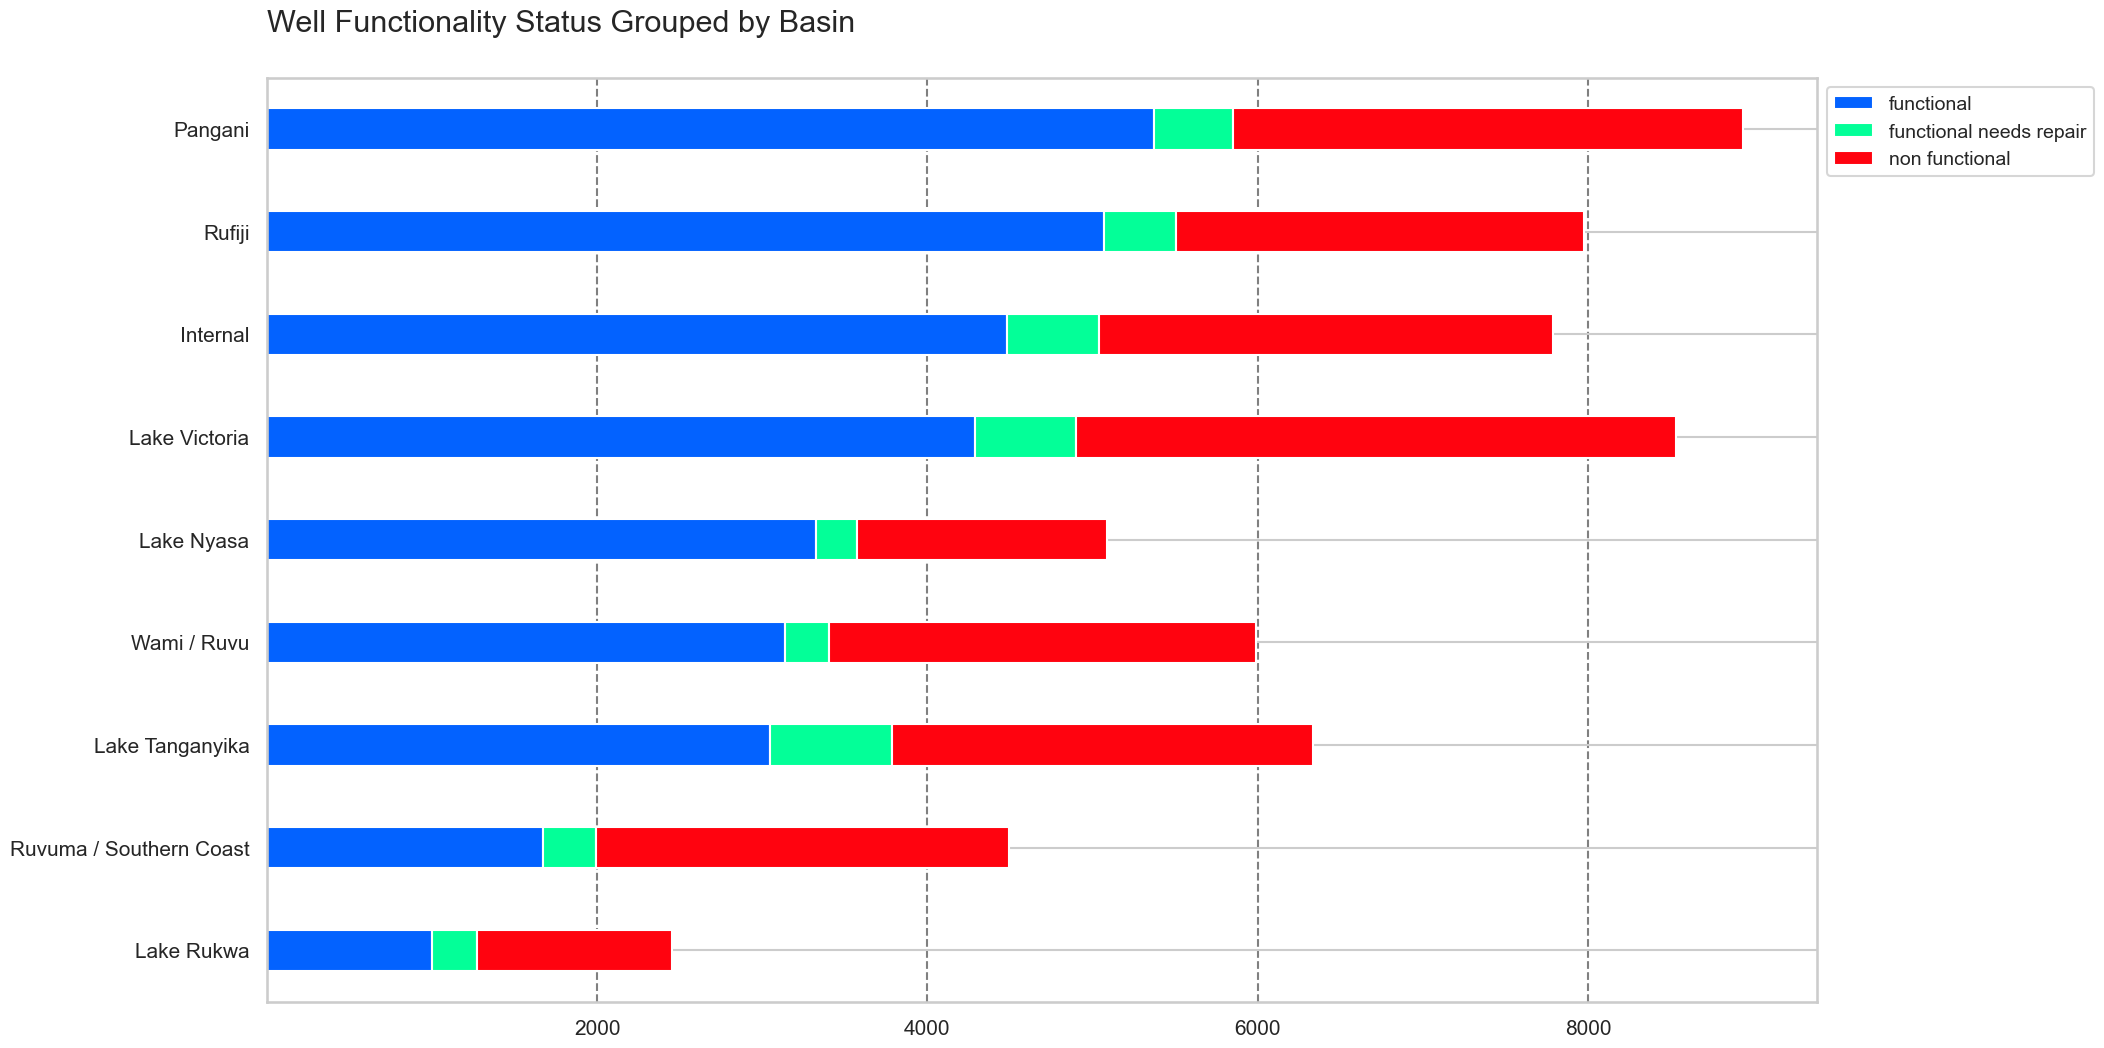

In [100]:
basin = pd.crosstab(df['basin'], df['status_group']).sort_values(by='functional')
title = 'Well Functionality Status Grouped by Basin\n'
plot_stackedbar(basin, title, (20,12))

 Among all regions, Pangani has the highest total number of wells, with a noteworthy **34%** of these wells classified as non functional.


Lake Nyasa stands out for maintaining a remarkably low proportion of non functional wells, approximately **30%**, even though it has fewer total wells. This trend suggests ample groundwater availability and effective well maintenance practices.

Interestingly, in contrast to Pangani's situation despite sharing a coastline, this region presents the highest proportion of non functional wells.

In [101]:
scheme_management = crosstab('scheme_management')
scheme_management

status_group       functional  functional needs repair  non functional
scheme_management                                                     
VWC                     18642                     2311           15182
WUG                      2507                      367            1375
Water Board              2053                      110             584
WUA                      1994                      239             649
Water authority          1616                      448            1087
Parastatal                940                      171             496
Private operator          728                       23             311
Company                   534                       37             490
Other                     457                       22             285
Trust                      46                        5              21
SWC                        20                        1              76

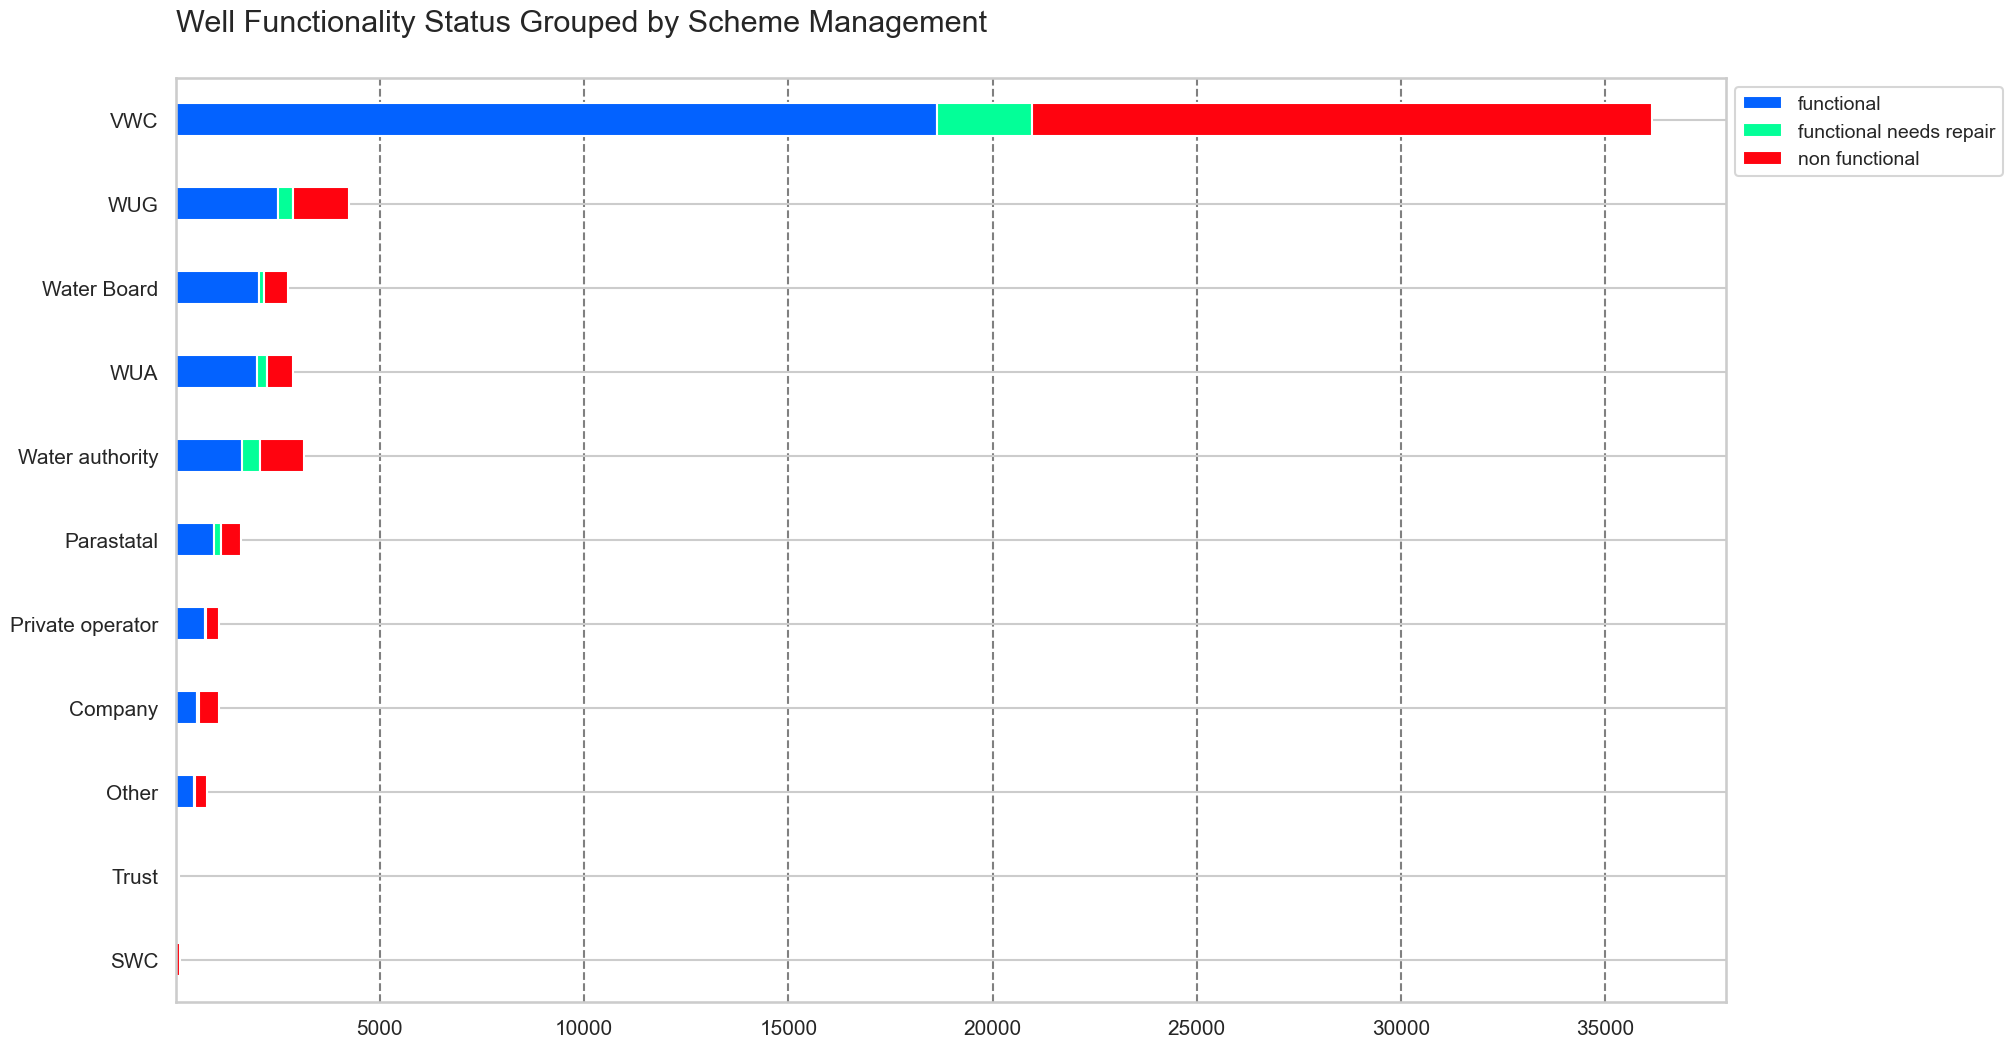

In [102]:
scheme_management = pd.crosstab(df['scheme_management'], df['status_group']).sort_values(by='functional')
title = 'Well Functionality Status Grouped by Scheme Management\n'
plot_stackedbar(scheme_management, title, (20,12))

- Almost **80%** of the Total wells are managed and operated by VWC with Around **42%** are Non Functional which can be due to Lack of Negligence from VWC.
- Scheme Managment as Feature is Highly Imbalanced and which comprises its reliability for Model Predictions

#### Recorded Date

**As Observed Earlier that Rain Water Harvesting has the promising Number of Functional Pump.
We can use Recorded Dates as a Source to Extract Monthly and Yearly impact on Functionality of Well.To detect the relation of how specific periods affects the functionality of well.**

In [103]:
Recorded_Month = crosstab('Recorded_Month')
Recorded_Month

status_group    functional  functional needs repair  non functional
Recorded_Month                                                     
March                11054                      900            5974
February              6639                      803            4565
July                  3295                      524            2844
October               2622                      260            2252
January               2454                      659            2849
April                 2050                      438            1482
August                1579                      241            1242
November               651                       58             547
December               355                       19             214
June                   269                        9              67
September              214                       10             104
May                    202                       10             123

In [104]:
Recorded_Month = pd.crosstab(df['Recorded_Month'], df['quantity']).sort_values(by='dry',ascending =False)
Recorded_Month

quantity         dry  enough  insufficient  seasonal  unknown
Recorded_Month                                               
March           1412    9985          5324      1003      204
February        1221    6819          3207       640      120
January         1047    3121          1174       433      187
July             902    3769          1571       333       88
October          492    2844          1133       601       64
April            353    2188           866       544       19
August           231    1780           720       278       53
November         131     736           228       127       34
December         120     352            94        21        1
September         66     182            69        10        1
May                9     227            92         6        1
June               3     251            86         4        1

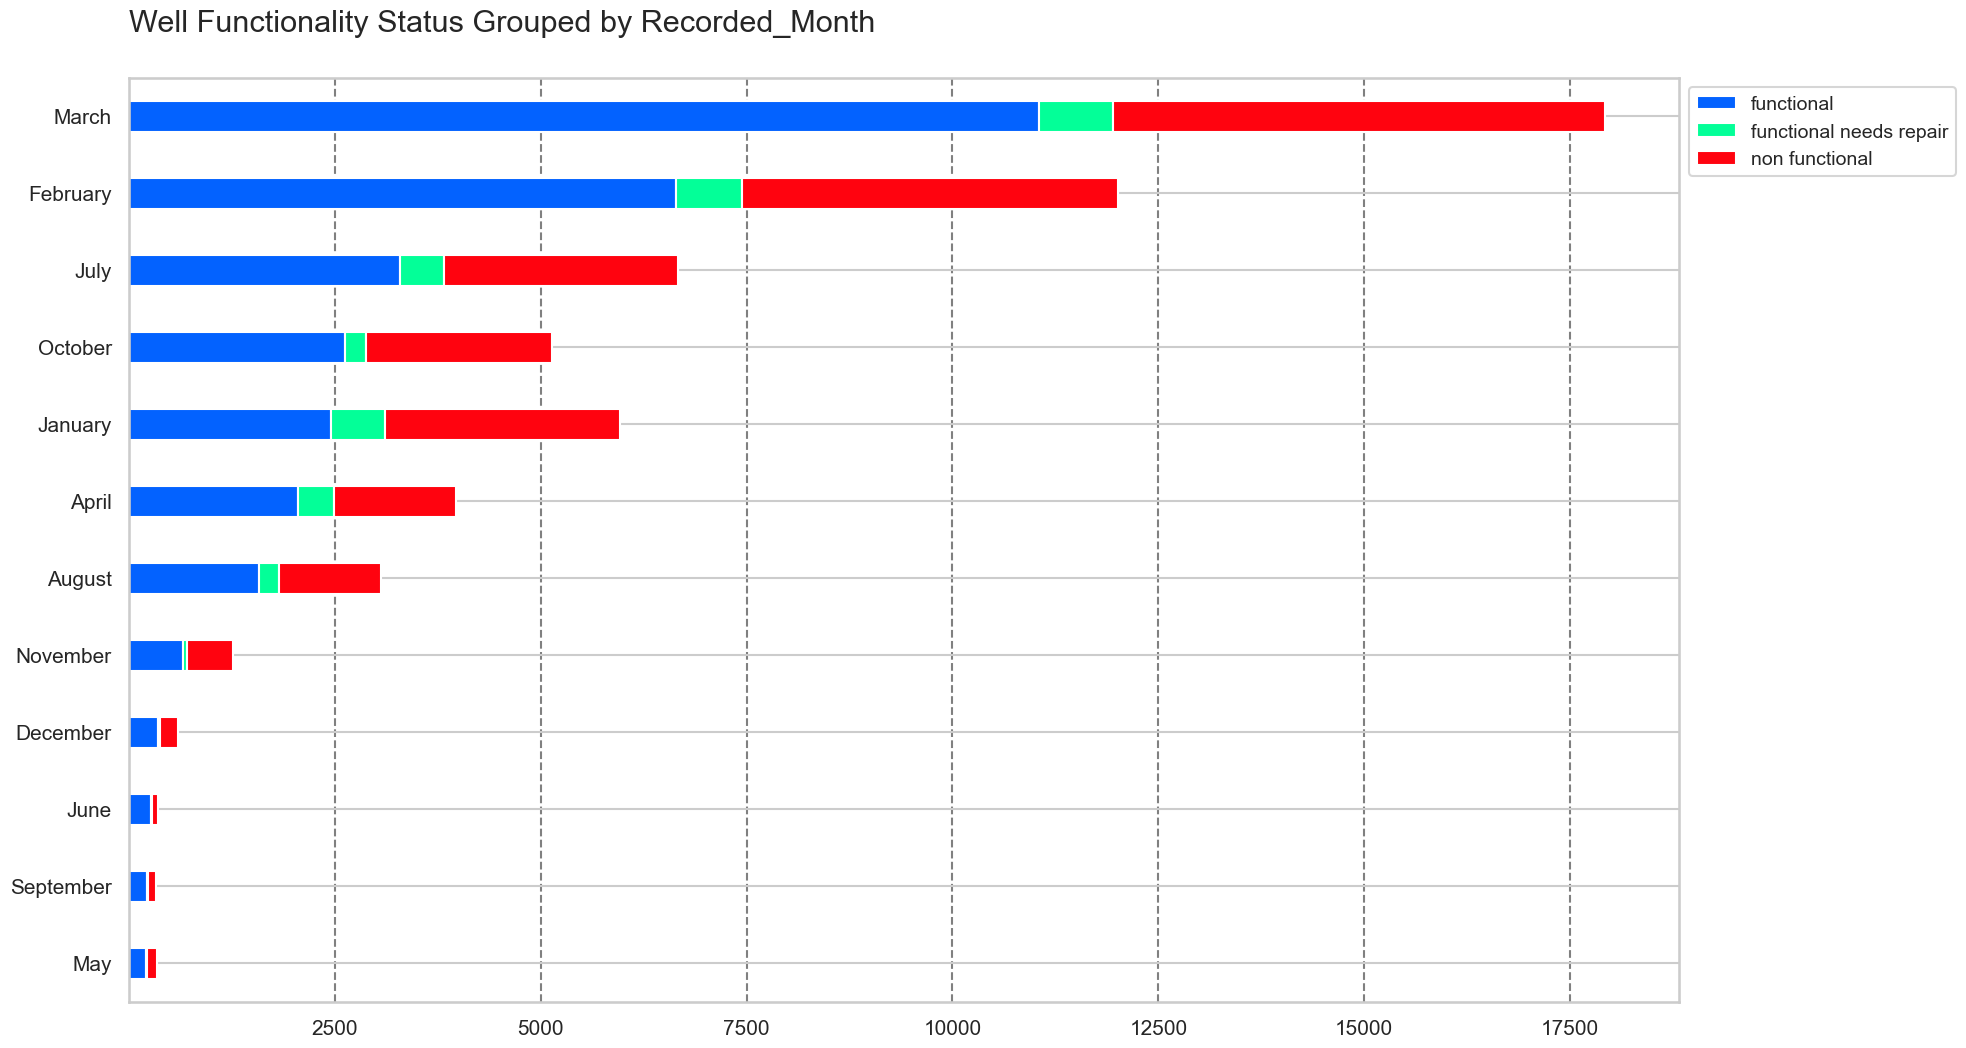

In [105]:
Recorded_month = pd.crosstab(df['Recorded_Month'], df['status_group']).sort_values(by='functional')
title = 'Well Functionality Status Grouped by Recorded_Month\n'
plot_stackedbar(Recorded_month, title, (20,12))

<Axes: ylabel='Recorded_Month'>

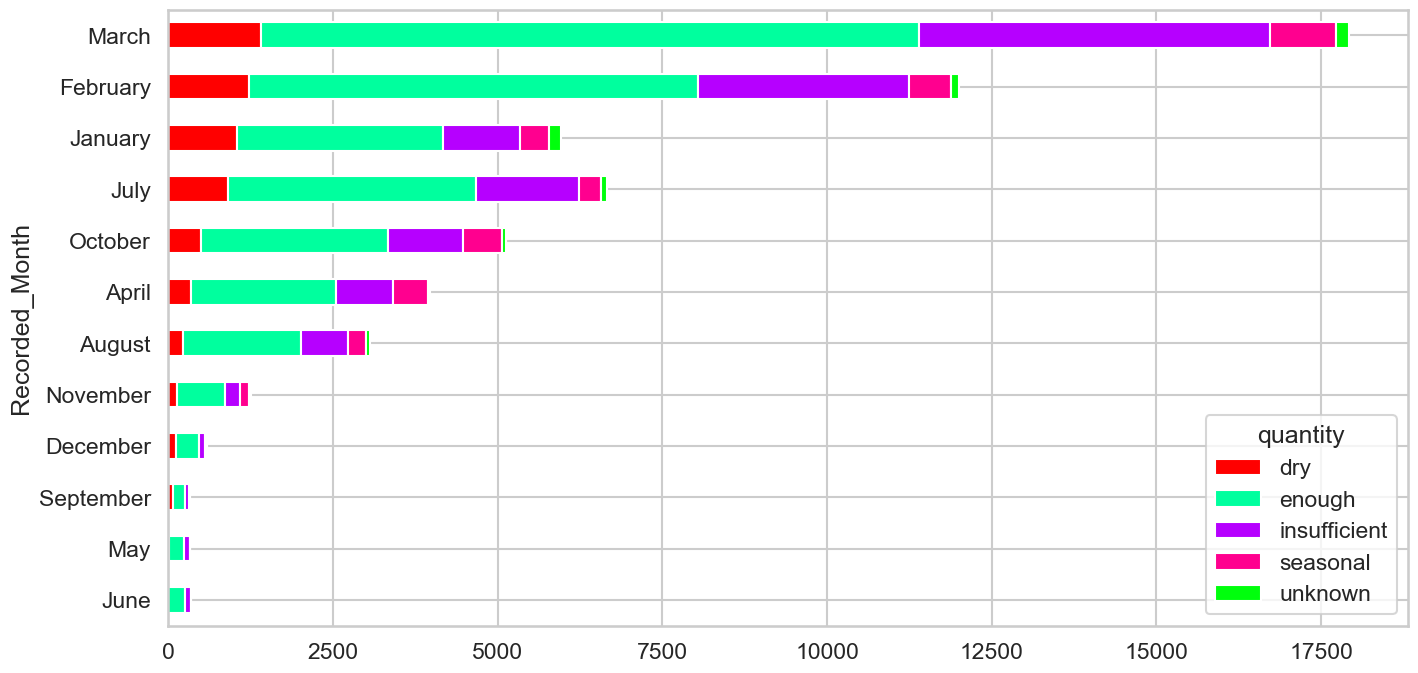

In [106]:
Month_sort = Recorded_Month.sort_values(by = 'dry')
color = ['#FF0000','#00FF9E','#B600FF','#FF008F','#00FF0C']
Month_sort.plot(kind='barh', stacked=True,figsize = (16,8),color = color)

**These Insights are drawn on the basis of recorded dates and according to the data more data records are from March as its a start of Rainy Season in Tanzania**

- Months with higher water availability ("enough" and "seasonal") tend to be March, February, and July. These months demonstrate a positive correlation between sufficient water and a higher proportion of "functional" wells..

- Conversely, months with lower water availability ("dry" and "insufficient") that show a lower count of "functional" wells and higher counts of wells needing repair ("functional needs repair") include October, January, and April.

- Despite water availability, instances of "non functional" wells are relatively consistent across months which indicated that there is lack of maintainence and reparation of well on regular basis.



### Multicorrelation

In [107]:
le =  LabelEncoder()
df['Status_encoded'] = le.fit_transform(df['status_group'])
le.classes_

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

- **0 = 'functional'**
- **1 = 'functional needs repair'**
- **2 = 'non functional'**

<Axes: >

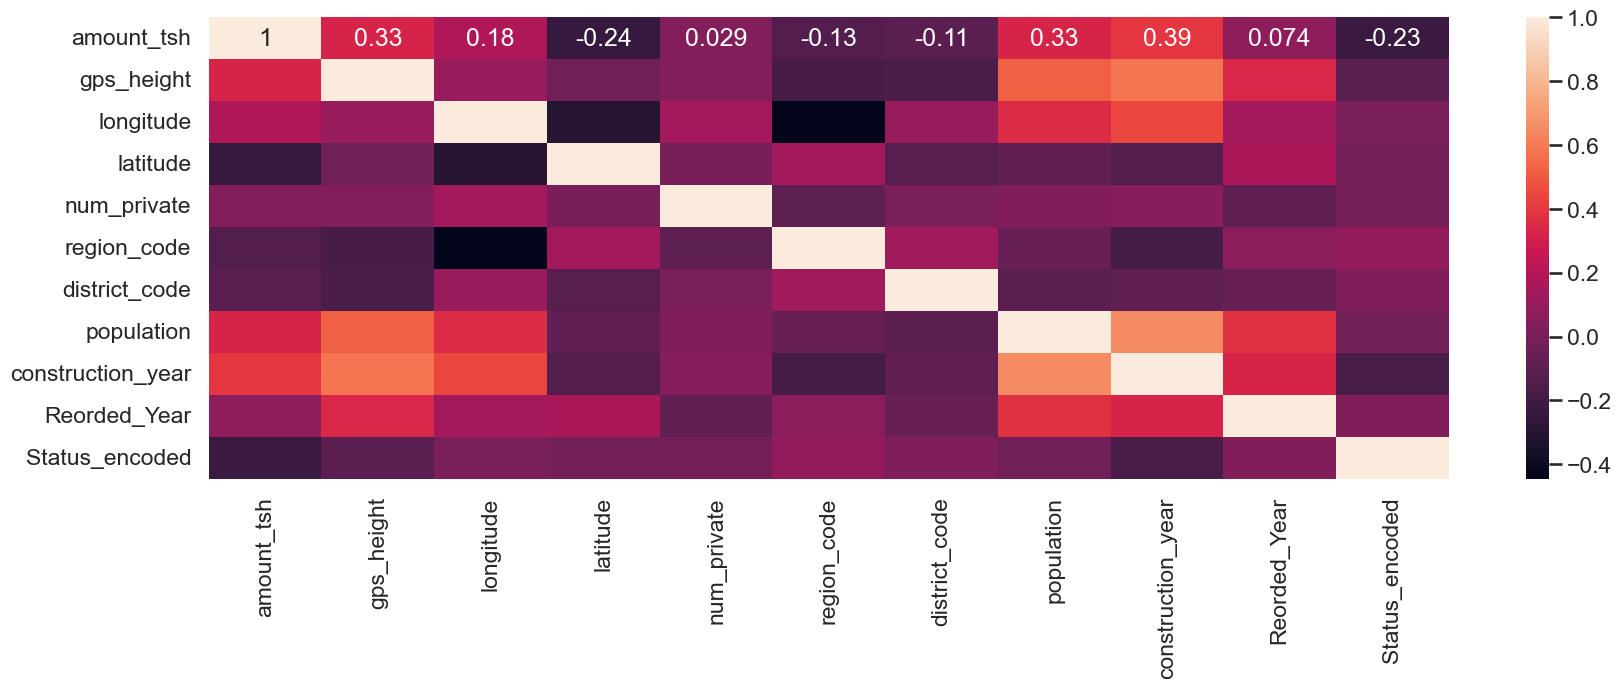

In [108]:
plt.figure(figsize = (20,6))

#Usually Correlation functions identifies numerical values but got error for unknown reason.Therefore,
numeric_df = df.select_dtypes(include=['number'])  
corr = numeric_df.corr(method='spearman')

#Plotting the Heatmap
sns.heatmap(corr,annot = True)

-  There is no significant Correlation between the Independent Features.
- gps_height and region_code has high correlation with dependent feature i.e Status_Encoded Comparetively.
- Functionality might be dependent on Altitude of well and Regions of the Country which is also what we commonly interpret.

#### Funder & Installer

The Idea is to reduce the number of variables in the installer and funder feature by coverting the variables covering 75% of the data into Major and rest into Minor.Creating a Class and using it in Column Transformer for the pipeline

Inheriting from BaseEstimator allows InstallerFunder class to be compatible with the scikit-learn ecosystem, such as being used within pipelines or grid searches.
Inheriting from TransformerMixin provides the default implementation of fit_transform based on your fit and transform methods, which is often convenient when working with transformers.

In [109]:
# class InstallerFunder(BaseEstimator, TransformerMixin):
    
#     def __init__(self, col):
#         self.col = col

#     def fit(self, col, y=None):
#         return self  # fit returns self as we don't need to fit any data for learning
    
#     def transform(self, X):
#         value_counts = X[self.col].value_counts(normalize=True, ascending=False)
        
#         cumulative_sum = value_counts.cumsum()
        
#         selected_values = cumulative_sum[cumulative_sum <= 0.75].index
        
#         encoded = X[self.col].apply(lambda x: 'Major' if x in selected_values else 'Minor')
        
#         return encoded
        
"""The fit method returns self without performing any actual fitting or computation. 
This can be useful when you want to include your transformer in a pipeline for organizational 
purposes or compatibility, but the transformer itself doesn't require any fitting."""

"The fit method returns self without performing any actual fitting or computation. \nThis can be useful when you want to include your transformer in a pipeline for organizational \npurposes or compatibility, but the transformer itself doesn't require any fitting."

### Feature Selection

In [110]:
X = data.drop('status_group',axis = 1)
y = data['status_group']

In [111]:
X.head()

amount_tsh date_recorded        funder  gps_height     installer  \
0      6000.0    2011-03-14         Roman        1390         Roman   
1         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2        25.0    2013-02-25  Lottery Club         686  World vision   
3         0.0    2013-01-28        Unicef         263        UNICEF   
4         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe multiple    communal standpipe  
3  groundwater  communal standpipe multiple    communal standpipe  
4      surface           communal sta

#### Null Values in Data

In [112]:
for col in X.columns:
    value = X[col].isnull().sum()/len(df)
    if value > 0:
        print(f"Missing Values of {col:{18}} : {value:.2f} percent")
        print("*"*60)

Missing Values of funder             : 0.06 percent
************************************************************
Missing Values of installer          : 0.06 percent
************************************************************
Missing Values of wpt_name           : 0.00 percent
************************************************************
Missing Values of subvillage         : 0.01 percent
************************************************************
Missing Values of public_meeting     : 0.06 percent
************************************************************
Missing Values of scheme_management  : 0.07 percent
************************************************************
Missing Values of scheme_name        : 0.50 percent
************************************************************
Missing Values of permit             : 0.05 percent
************************************************************


In [113]:
column = ['num_private','amount_tsh','construction_year','longitude']

for col in column:
    value = len(X[X[col]==0])/len(df)
    print(f"Missing Values of {col:{18}} : {value:.2f} percent")
    print("*"*60)

Missing Values of num_private        : 1.02 percent
************************************************************
Missing Values of amount_tsh         : 0.72 percent
************************************************************
Missing Values of construction_year  : 0.36 percent
************************************************************
Missing Values of longitude          : 0.03 percent
************************************************************


- As more than 70% of the data is **Zero** is considered as **Missing Value** in num_private,amount_tsh. We can drop these two columns.
- As with construction_year and Longitude can be imputed with mode of the relevant data.

- For Longitude is Zero. As per the given data description, a minimum longitude value of zero is established, aligning with the Prime Meridian. This meridian runs through specific African countries: Algeria, Mali, Burkina Faso, Togo, and Ghana.

- We can just convert them into NaN values then Drop Them.

In [114]:
X.drop(['num_private','amount_tsh'],axis =1,inplace = True)
X['longitude'] = X['longitude'].replace(0, np.nan)

In [115]:
X.head()

date_recorded        funder  gps_height     installer  longitude   latitude  \
0    2011-03-14         Roman        1390         Roman  34.938093  -9.856322   
1    2013-03-06       Grumeti        1399       GRUMETI  34.698766  -2.147466   
2    2013-02-25  Lottery Club         686  World vision  37.460664  -3.821329   
3    2013-01-28        Unicef         263        UNICEF  38.486161 -11.155298   
4    2011-07-13   Action In A           0       Artisan  31.130847  -1.825359   

               wpt_name                    basin  subvillage   region  \
0                  none               Lake Nyasa    Mnyusi B   Iringa   
1              Zahanati            Lake Victoria     Nyamara     Mara   
2           Kwa Mahundi                  Pangani     Majengo  Manyara   
3  Zahanati Ya Nanyumbu  Ruvuma / Southern Coast  Mahakamani   Mtwara   
4               Shuleni            Lake Victoria  Kyanyamisa   Kagera   

   region_code  district_code        lga        ward  population  \
0           11              5     Ludewa    Mundindi         109   
1           20              2  Serengeti       Natta         280   
2           21              4  Simanjiro     Ngorika         250   
3           90             63   Nanyumbu    Nanyumbu          58   
4           18              1    Karagwe  Nyakasimbi           0   

  public_meeting              recorded_by scheme_management  \
0           True  GeoData Consultants Ltd               VWC   
1            NaN  GeoData Consultants Ltd             Other   
2           True  GeoData Consultants Ltd               VWC   
3           True  GeoData Consultants Ltd               VWC   
4           True  GeoData Consultants Ltd               NaN   

                   scheme_name permit  construction_year extraction_type  \
0                        Roman  False               1999         gravity   
1                          NaN   True               2010         gravity   
2  Nyumba ya mungu pipe scheme   True               2009         gravity   
3                          NaN   True               1986     submersible   
4                          NaN   True                  0         gravity   

  extraction_type_group extraction_type_class management management_group  \
0               gravity               gravity        vwc       user-group   
1               gravity               gravity        wug       user-group   
2               gravity               gravity        vwc       user-group   
3           submersible           submersible        vwc       user-group   
4               gravity               gravity      other            other   

          payment payment_type water_quality quality_group      quantity  \
0    pay annually     annually          soft          good        enough   
1       never pay    never pay          soft          good  insufficient   
2  pay per bucket   per bucket          soft          good        enough   
3       never pay    never pay          soft          good           dry   
4       never pay    never pay          soft          good      seasonal   

  quantity_group                source           source_type source_class  \
0         enough                spring                spring  groundwater   
1   insufficient  rainwater harvesting  rainwater harvesting      surface   
2         enough                   dam                   dam      surface   
3            dry           machine dbh              borehole  groundwater   
4       seasonal  rainwater harvesting  rainwater harvesting      surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe

**In the Data Columns that contains similar information:**
- extraction_type,extraction_type_group,extraction_type_class

- payment,payment_type 

- water_quality,quality_group

- quantity,quantity_group

- source,source_type,source_class

- waterpoint_type,waterpoint_type_group

- management,management_group

- region,region_code,district_code,ward,subvillage,lga

- scheme_name,scheme_management,management,

We aim to build a general model that avoids unnecessary complexity and overfitting. Focusing on individual details might lead to too many features, making the model complex and prone to overfitting. Since broader features often include the content of specific columns, using these general features is more straightforward. This approach keeps the model simple while retaining the necessary information for accurate predictions.

**Features containing broader information for model prediction:**
 -  extraction_type_class,
 - payment_type,
 - quality_group,
 - source_class,
 - waterpoint_type_group,
 - management_group
 - scheme_management
 - region 

In [116]:
col_drop = ['extraction_type','extraction_type_group','payment',
            'water_quality','quantity','source','source_type',
            'waterpoint_type','region_code','ward',
            'subvillage','lga','management','wpt_name','scheme_name','date_recorded','construction_year',
            'recorded_by']
X1 = X.drop(col_drop,axis = 1)

In [117]:
X1.head()

funder  gps_height     installer  longitude   latitude  \
0         Roman        1390         Roman  34.938093  -9.856322   
1       Grumeti        1399       GRUMETI  34.698766  -2.147466   
2  Lottery Club         686  World vision  37.460664  -3.821329   
3        Unicef         263        UNICEF  38.486161 -11.155298   
4   Action In A           0       Artisan  31.130847  -1.825359   

                     basin   region  district_code  population public_meeting  \
0               Lake Nyasa   Iringa              5         109           True   
1            Lake Victoria     Mara              2         280            NaN   
2                  Pangani  Manyara              4         250           True   
3  Ruvuma / Southern Coast   Mtwara             63          58           True   
4            Lake Victoria   Kagera              1           0           True   

  scheme_management permit extraction_type_class management_group  \
0               VWC  False               gravity       user-group   
1             Other   True               gravity       user-group   
2               VWC   True               gravity       user-group   
3               VWC   True           submersible       user-group   
4               NaN   True               gravity            other   

  payment_type quality_group quantity_group source_class waterpoint_type_group  
0     annually          good         enough  groundwater    communal standpipe  
1    never pay          good   insufficient      surface    communal standpipe  
2   per bucket          good         enough      surface    communal standpipe  
3    never pay          good            dry  groundwater    communal standpipe  
4    never pay          good       seasonal      surface    communal standpipe

## Data Splitting

Splitting the Data in to Train and Test from the master data and splitting the train into Validation Set

In [118]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X1, y, test_size=0.3, random_state=1012,stratify = y)

In [119]:
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=1012)

In [120]:
X_train.shape

(31165, 19)

In [121]:
X_test.shape

(17810, 19)

In [122]:
X_val.shape

(10389, 19)

#### Funder & Installer

The Idea is to reduce the number of variables in the installer and funder feature by coverting the variables covering 75% of the data into Major and rest into Minor.

In [123]:
def transform(X,col):
        value_counts = X[col].value_counts(normalize=True, ascending=False)
        
        cumulative_sum = value_counts.cumsum()
        
        selected_values = cumulative_sum[cumulative_sum <= 0.75].index
        
        encoded = X[col].apply(lambda x: 'Major' if x in selected_values else 'Minor')
        
        return encoded

In [124]:
X_train['funder']  = transform(X_train,'funder')
X_train['installer']  = transform(X_train,'installer')
X_test['funder'] = transform(X_test,'funder')
X_test['installer'] = transform(X_test,'installer')
X_val['funder'] = transform(X_val,'funder')
X_val['installer'] = transform(X_val,'installer')

#### One Hot Encoding and Scaling 

In [125]:
#Segregatting Categorical and Numerical data
def num_cat(data):
    num = []
    cat = []
    for i in data.columns:
        if data[i].dtypes == 'O':
            cat.append(i)
        else:
            num.append(i)
    return num,cat

#Getting Index Value for each Column
def index_value(df,features):
    
    feature_list = features
    feature_index = []
    for col in feature_list:
        index = df.columns.get_loc(col)
        feature_index.append(index)
        
    return feature_index

In [126]:
# Making Different list for different column types for further use
num_features,cat_features = num_cat(X_train)
num_index = index_value(X_train,num_features)
cat_index = index_value(X_train,cat_features)

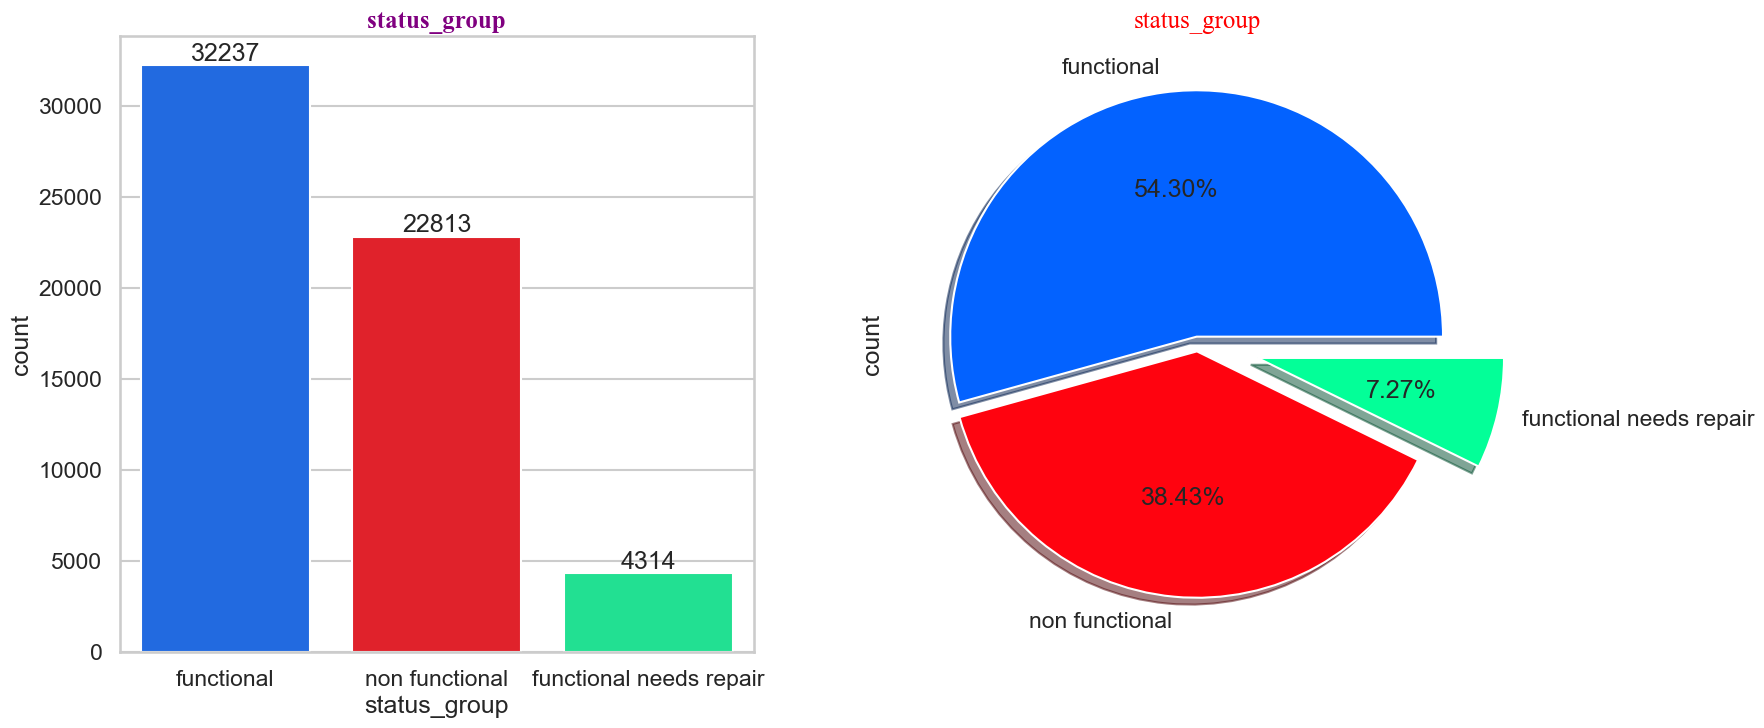

In [127]:
#CountPlot for Target Variable
palette = ['#0362FF','#FF030F','#03FF98']
ax = plt.figure(figsize=(18,8))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='status_group', data=data,palette=palette)
ax.bar_label(ax.containers[0])
plt.title("status_group", fontsize=20,color='purple',font='Times New Roman',fontweight = 'bold')


#Pie Chart for Percentage
ax =plt.subplot(1,2,2)
ax=data['status_group'].value_counts()
ax.plot.pie(explode=[0.03,0.03,0.25],autopct='%1.2f%%',shadow=True,colors = palette);
plt.title(label = "status_group", fontsize = 20,color='Red',font='Times New Roman');
plt.show()

- It's crucial to address any data imbalances during subsequent modeling. In our case, the data distribution reveals that 'functional' accounts for 54.30%, 'non-functional' for 38.43%, and 'functional needs repair' for only 7.27%.

- We can apply SMOTE Technique for Over Smapling Method.

#### PipeLine Building

In [129]:
#Ohe Hot Encoding and Imputation for Categorical 
cat_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='most_frequent')),
                         ('ohe', OneHotEncoder(drop='first',sparse = False, handle_unknown='ignore'))])


#Scaling and Imputation for num_transformers
num_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy="median")),
                               ('scaler',RobustScaler(with_centering = False))])    

#SMOTE for Cat and Numerical Variable Combined.
# Using SMOTE and ADASYN on Minority Class which is "Functional but repair".
smote = SMOTE(random_state = 101,sampling_strategy = 'minority')

adasyn = ADASYN(sampling_strategy='minority', random_state=42)

In [130]:
#Instead of OHE ,Label Binarizer as it give binary class vectors for multiclass classification

label_binarizer = LabelBinarizer()

#Encoded Target Variable
y_train_encoded = label_binarizer.fit_transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)
y_val_encoded = label_binarizer.transform(y_val)

- Making Different Type of Encoding as Label Binarizer is not Compatile with every Model of Sklearn

In [131]:
y_train_label = np.argmax(y_train_encoded,axis = 1)
y_test_label = np.argmax(y_test_encoded,axis = 1)

In [132]:
y_train_label

array([0, 0, 2, ..., 0, 2, 0], dtype=int64)

In [133]:
y_train_encoded

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [134]:
label_binarizer.transform(["functional"])

array([[1, 0, 0]])

In [135]:
label_binarizer.transform(["functional needs repair"])

array([[0, 1, 0]])

In [136]:
label_binarizer.transform(["non functional"])

array([[0, 0, 1]])

In [137]:
y_labels = ['functional','functional needs repair','non functional']

For further Reference Click [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

### Preprocessing PipeLine

In [138]:
# Passing Cat features in Imputation and OHE as it will automatically detect the NaN values.
preprocessor = ColumnTransformer([
                                ('cat_transformer',cat_transformer,cat_index),
                               ('num_transformer',num_transformer,num_index),
                                ],remainder='passthrough')

In [139]:
# Fitting and Transforming Data
X_train_tran= preprocessor.fit_transform(X_train)
X_test_tran = preprocessor.transform(X_test)

In [140]:
encoded_columns = preprocessor.named_transformers_['cat_transformer'] \
                 .named_steps['ohe'].get_feature_names_out(input_features=cat_features)

# As Pandas Create Column Index Object we can Directly drop column names unlike List.
num_columns = X1.columns.drop(cat_features)


#All Features of DataSet
# As Pipeline is Sequential Method.It extracts selected columns from main data and cluster it together.
# Acc to Steps it Concatenate the other columns seperately. We will do the same.

features = np.concatenate([encoded_columns,num_columns])

In [141]:
#X_train Transformed
X_train_transformed = pd.DataFrame(X_train_tran,columns = features)
X_train_transformed.head() 

funder_Minor  installer_Minor  basin_Lake Nyasa  basin_Lake Rukwa  \
0           0.0              0.0               0.0               0.0   
1           0.0              0.0               0.0               0.0   
2           1.0              1.0               0.0               0.0   
3           0.0              0.0               1.0               0.0   
4           0.0              0.0               0.0               0.0   

   basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  basin_Rufiji  \
0                    1.0                  0.0            0.0           0.0   
1                    0.0                  0.0            0.0           1.0   
2                    0.0                  0.0            1.0           0.0   
3                    0.0                  0.0            0.0           0.0   
4                    0.0                  0.0            0.0           0.0   

   basin_Ruvuma / Southern Coast  basin_Wami / Ruvu  region_Dar es Salaam  \
0                            0.0                0.0                   0.0   
1                            0.0                0.0                   0.0   
2                            0.0                0.0                   0.0   
3                            0.0                0.0                   0.0   
4                            0.0                0.0                   0.0   

   region_Dodoma  region_Iringa  region_Kagera  region_Kigoma  \
0            0.0            0.0            0.0            1.0   
1            0.0            1.0            0.0            0.0   
2            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0   

   region_Kilimanjaro  region_Lindi  region_Manyara  region_Mara  \
0                 0.0           0.0             0.0          0.0   
1                 0.0           0.0             0.0          0.0   
2                 1.0           0.0             0.0          0.0   
3                 0.0           0.0             0.0          0.0   
4                 0.0           0.0             0.0          0.0   

   region_Mbeya  region_Morogoro  region_Mtwara  region_Mwanza  region_Pwani  \
0           0.0              0.0            0.0            0.0           0.0   
1           0.0              0.0            0.0            0.0           0.0   
2           0.0              0.0            0.0            0.0           0.0   
3           1.0              0.0            0.0            0.0           0.0   
4           0.0              0.0            0.0            0.0           0.0   

   region_Rukwa  region_Ruvuma  region_Shinyanga  region_Singida  \
0           0.0            0.0               0.0             0.0   
1           0.0            0.0               0.0             0.0   
2           0.0            0.0               0.0             0.0   
3           0.0            0.0               0.0             0.0   
4           0.0            0.0               0.0             0.0   

   region_Tabora  region_Tanga  public_meeting_True  scheme_management_Other  \
0            0.0           0.0                  1.0                      0.0   
1            0.0           0.0                  1.0                      0.0   
2            0.0           0.0                  1.0                      0.0   
3            0.0           0.0                  1.0                      0.0   
4            1.0           0.0                  1.0                      0.0   

   scheme_management_Parastatal  scheme_management_Private operator  \
0                           0.0                                 0.0   
1                           0.0                                 0.0   
2                           0.0                                 0.0   
3                           0.0                                 0.0   
4                           0.0                                 0.0   

   scheme_management_SWC  scheme_managem

In [142]:
X_train_transformed.shape

(31165, 79)

In [143]:
#X_test Transformed

X_test_transformed = pd.DataFrame(X_test_tran,columns = features)
X_test_transformed.head()

funder_Minor  installer_Minor  basin_Lake Nyasa  basin_Lake Rukwa  \
0           0.0              0.0               0.0               0.0   
1           0.0              0.0               0.0               0.0   
2           1.0              1.0               0.0               0.0   
3           1.0              1.0               0.0               0.0   
4           1.0              1.0               0.0               0.0   

   basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  basin_Rufiji  \
0                    0.0                  1.0            0.0           0.0   
1                    0.0                  1.0            0.0           0.0   
2                    0.0                  1.0            0.0           0.0   
3                    1.0                  0.0            0.0           0.0   
4                    0.0                  0.0            0.0           0.0   

   basin_Ruvuma / Southern Coast  basin_Wami / Ruvu  region_Dar es Salaam  \
0                            0.0                0.0                   0.0   
1                            0.0                0.0                   0.0   
2                            0.0                0.0                   0.0   
3                            0.0                0.0                   0.0   
4                            1.0                0.0                   0.0   

   region_Dodoma  region_Iringa  region_Kagera  region_Kigoma  \
0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            1.0   
4            0.0            0.0            0.0            0.0   

   region_Kilimanjaro  region_Lindi  region_Manyara  region_Mara  \
0                 0.0           0.0             0.0          0.0   
1                 0.0           0.0             0.0          0.0   
2                 0.0           0.0             0.0          1.0   
3                 0.0           0.0             0.0          0.0   
4                 0.0           0.0             0.0          0.0   

   region_Mbeya  region_Morogoro  region_Mtwara  region_Mwanza  region_Pwani  \
0           0.0              0.0            0.0            0.0           0.0   
1           0.0              0.0            0.0            1.0           0.0   
2           0.0              0.0            0.0            0.0           0.0   
3           0.0              0.0            0.0            0.0           0.0   
4           0.0              0.0            0.0            0.0           0.0   

   region_Rukwa  region_Ruvuma  region_Shinyanga  region_Singida  \
0           0.0            0.0               1.0             0.0   
1           0.0            0.0               0.0             0.0   
2           0.0            0.0               0.0             0.0   
3           0.0            0.0               0.0             0.0   
4           0.0            1.0               0.0             0.0   

   region_Tabora  region_Tanga  public_meeting_True  scheme_management_Other  \
0            0.0           0.0                  1.0                      0.0   
1            0.0           0.0                  1.0                      0.0   
2            0.0           0.0                  1.0                      1.0   
3            0.0           0.0                  1.0                      0.0   
4            0.0           0.0                  1.0                      0.0   

   scheme_management_Parastatal  scheme_management_Private operator  \
0                           0.0                                 0.0   
1                           0.0                                 0.0   
2                           0.0                                 0.0   
3                           0.0                                 0.0   
4                           0.0                                 0.0   

   scheme_management_SWC  scheme_managem

- X_train_transformed and X_test_transformed won't typically be used for Usual Model . Instead, they are reserved for scenarios where data is trained using the selected features of a model. This approach is more straightforward compared to feeding it into a complex pipeline.

## Model Building

In [144]:
#Weightage Assignment for Multiclass Output
sample_weights = compute_sample_weight(class_weight='balanced', y=y_labels)


In [145]:
def model_evaluate(title,model, X_train, X_test, y_train, y_test, model_name):
    
    #Model Name is fetching Model from the PipeLine
    model.named_steps[model_name].sample_weight = sample_weights
    model.fit(X_train, y_train)
   
    y_pred = model.predict(X_test)

    cr = classification_report(y_test, y_pred,target_names = y_labels)
    acc = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5,scoring = 'accuracy')
   
    
    print(f"Evaluation Metrics of {title}\n")
    print(f"Classification Report for {title}:\n{cr}")
    print(f"Accuracy Score: {acc:.2f}")
    print(f"Mean CV Score:{cv_scores.mean():.2f}")
 

In [146]:
def GridSearch(model,params,X_train,y_train):
    gscv = GridSearchCV(model, param_grid= params, cv=5, scoring='accuracy', n_jobs=-1,verbose = 1)
    gscv.fit(X_train,y_train)
    best_params = gscv.best_params_
    best_score = gscv.best_score_
    print("Best params :\n",best_params)
    print("\nBest Accuracy Score :",best_score)
    

In [147]:
def roc_auc_cuve(title,model,X_train,y_train_,X_roc_type,y_roc_type):

    fig, ax = plt.subplots(figsize=(5, 5))

    model.fit(X_train, y_train_)
    y_score = model.predict_proba(X_roc_type)
    
    # Length of Classes in Taregt
    n_classes=len(y_train.unique())
    
    #Color List
    colors = ["aqua", "darkorange", "cornflowerblue"]
    
    for status,color in zip(range(n_classes),colors):
        
        RocCurveDisplay.from_predictions(
        y_roc_type[:, status],  #Extracting each column from Binary Vector
        y_score[:, status],
        name=f"ROC curve for {y_labels[status]}",
            color=color,
            ax=ax
        )

    
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate",fontsize = 12)
    plt.ylabel("True Positive Rate",fontsize = 12)
    plt.title(f"One-vs-Rest ROC curves for {title}",fontsize = 12)
    plt.legend(bbox_to_anchor=([1, 1, 0, 0]), 
                   ncol=1, 
                   frameon=True, 
                   fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)
    plt.show()

- As for Multiclass ROC Curve we have used **ROcCurveDisplay**.
- For More Info please Refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions)

-------------------------------------------------------------------------------------------------------------------------------------

- Metrics we need to Focus on is **ROC Score** as data is imbalance which can lead to Inaccurate Accuracy Score even after SMOTE is applied.


**Metrics to Focus On **-
- Another Metrics we need to Focus on is **Recall** to keep False Negative in check for Non Functional and Functional with Repair Pump which will help the Tanzania Water Ministry to take actions. 



 **Why Recall ?**
- Focus will be on achieving a **high Recall to ensure that correctly identify non-functional wells and those in need of repair**. While Precision is important to avoid unnecessary maintenance costs, in cases where public health and safety are at stake, it's generally preferable to prioritize Recall to minimize the risk of not addressing wells that need maintenance.

We will start with Simple Model for the Interpretability which will be easy to Understand and can be treated as a BaseLine Model for the More Complex Models.As Simple Models Tends to OverFit.

#### Decision Tree  

In [148]:
dtc = ImbPipeline([ ('preprocessor',preprocessor),
                    ('smote',smote),
                    ('dtc',DecisionTreeClassifier(random_state = 101))
                  ])

In [149]:
model_evaluate("Decision Tree with Smote Technique",dtc, X_train, X_test, y_train_label, y_test_label,'dtc')

Evaluation Metrics of Decision Tree with Smote Technique

Classification Report for Decision Tree with Smote Technique:
                         precision    recall  f1-score   support

             functional       0.80      0.77      0.78      9672
functional needs repair       0.34      0.45      0.38      1294
         non functional       0.75      0.74      0.75      6844

               accuracy                           0.73     17810
              macro avg       0.63      0.65      0.64     17810
           weighted avg       0.75      0.73      0.74     17810

Accuracy Score: 0.73
Mean CV Score:0.72


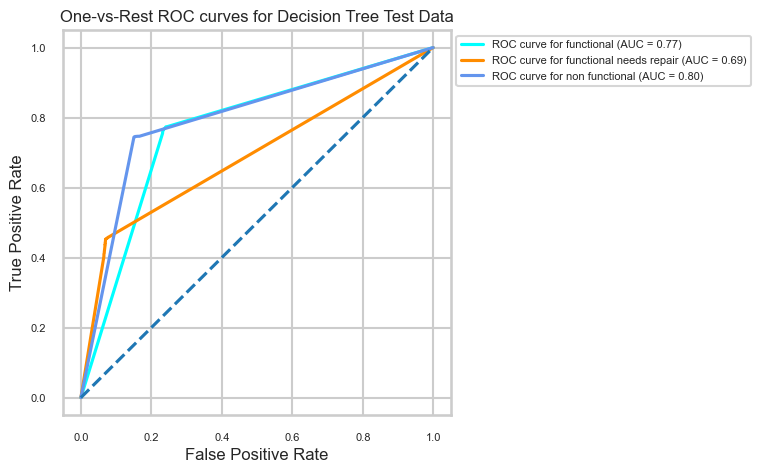

In [150]:
roc_auc_cuve("Decision Tree Test Data",dtc,X_train,y_train,X_test,y_test_encoded)

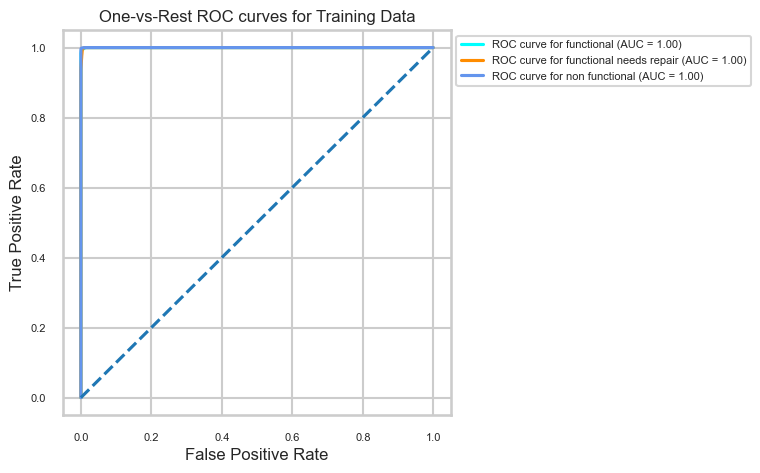

In [152]:
roc_auc_cuve("Training Data",dtc,X_train,y_train,X_train,y_train_encoded)

As Expected the Simple Model is heavily overfitting to training Data.Applying GridSearch Cv to reduce overfitting 

In [153]:
params = { 
    'dtc__max_depth': [10, 15, 20,25],
    'dtc__max_features': ['sqrt', 'log2'],
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__min_samples_split': [4, 6, 10,15],
    'dtc__min_samples_leaf': [4, 6, 8,20,30]
}

In [154]:
#Applying the Grid Search CV on Simple Models
dtc = ImbPipeline([ ('preprocessor',preprocessor),
                    ('smote',smote),
                    ('dtc',DecisionTreeClassifier())
                      ])
gscv = GridSearchCV(estimator = dtc,param_grid = params,n_jobs=-1,scoring = 'f1')
gscv.fit(X_train,y_train_label)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_transformer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         [0, 2,
                                                                          5, 6,
                                                                          9, 10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18]),
                                                                        ('num_transformer',
                                                                         Pipeline(steps=[('...
                                                                                          RobustScaler(with_centering=False))]),
                                                                         [1, 3,
                                                                          4, 7,
                                                                          8])])),
                                       ('smote',
                                        SMOTE(random_state=101,
                                              sampling_strategy='minority')),
                                       ('dtc', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dtc__criterion': ['gini', 'entropy'],
                         'dtc__max_depth': [10, 15, 20, 25],
                         'dtc__max_features': ['sqrt', 'log2'],
                         'dtc__min_samples_leaf': [4, 6, 8, 20, 30],
                         'dtc__min_samples_split': [4, 6, 10, 15]},
             scoring='f1')

In [155]:
best_params = gscv.best_params_

In [156]:
dtc = ImbPipeline([ ('preprocessor',preprocessor),
                    ('smote',smote),
                    ('dtc',DecisionTreeClassifier(max_depth = best_params['dtc__max_depth'],
                                                  max_features = best_params['dtc__max_features'],
                                                criterion = best_params['dtc__criterion'],
                                                min_samples_split= best_params['dtc__min_samples_split'],
                                                  min_impurity_decrease=0.0
                                                ))
                  ])

In [157]:
model_evaluate("Decision Tree with Smote Technique",dtc, X_train, X_test, y_train_label, y_test_label,'dtc')

Evaluation Metrics of Decision Tree with Smote Technique

Classification Report for Decision Tree with Smote Technique:
                         precision    recall  f1-score   support

             functional       0.67      0.76      0.71      9672
functional needs repair       0.21      0.39      0.27      1294
         non functional       0.71      0.48      0.57      6844

               accuracy                           0.62     17810
              macro avg       0.53      0.54      0.52     17810
           weighted avg       0.66      0.62      0.63     17810

Accuracy Score: 0.62
Mean CV Score:0.54


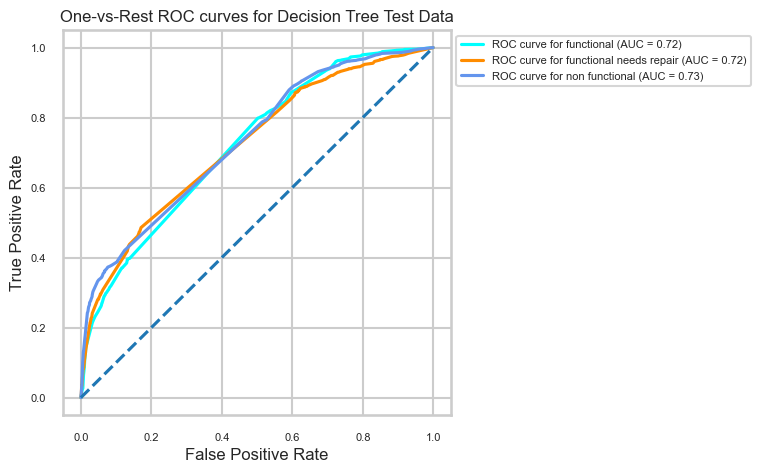

In [158]:
roc_auc_cuve("Decision Tree Test Data",dtc,X_train,y_train,X_test,y_test_encoded)

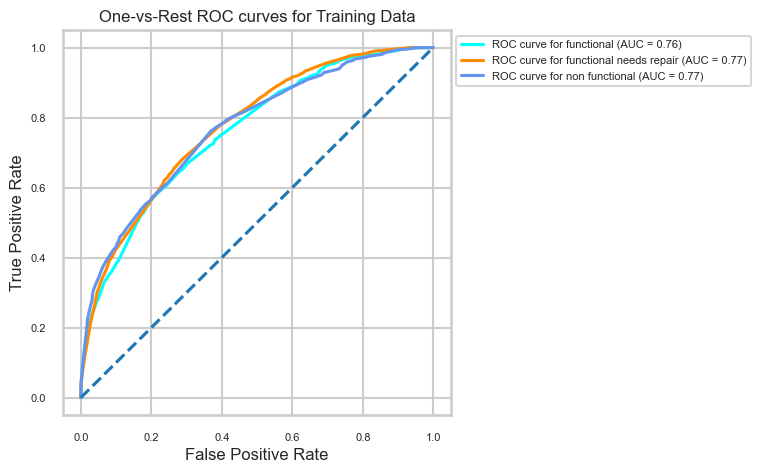

In [159]:
roc_auc_cuve("Training Data",dtc,X_train,y_train,X_train,y_train_encoded)

Eventhough Data is not Overfitting After HyperParameter tuning Expected Results are not drawn form the Decision Tree.
Next we will use Logistic Regression 

#### Logistic Regression

In [160]:
lr = ImbPipeline([ ('preprocessor',preprocessor),
                    ('smote',smote),
                    ('lr',LogisticRegression(C=5,max_iter=300,penalty = 'elasticnet'
                                             ,multi_class = 'multinomial',solver = 'saga',l1_ratio = 0.6))
                  ])

In [161]:
model_evaluate("Logistic Regression with Smote Technique",lr, X_train, X_test, y_train_label, y_test_label,'lr')

Evaluation Metrics of Logistic Regression with Smote Technique

Classification Report for Logistic Regression with Smote Technique:
                         precision    recall  f1-score   support

             functional       0.75      0.65      0.70      9672
functional needs repair       0.17      0.67      0.27      1294
         non functional       0.83      0.53      0.65      6844

               accuracy                           0.61     17810
              macro avg       0.58      0.62      0.54     17810
           weighted avg       0.74      0.61      0.65     17810

Accuracy Score: 0.61
Mean CV Score:0.60


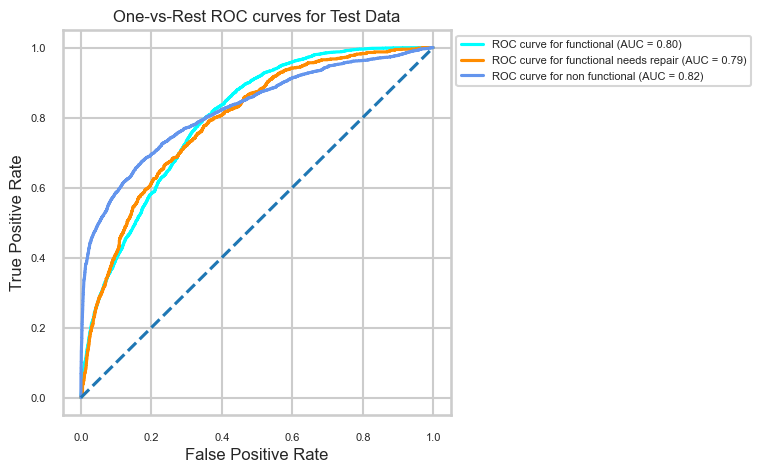

In [162]:
roc_auc_cuve("Test Data",lr,X_train,y_train,X_test,y_test_encoded)

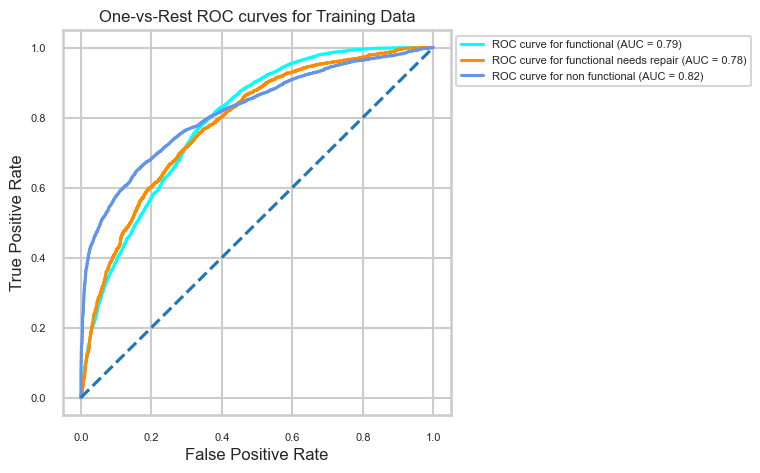

In [163]:
roc_auc_cuve("Training Data",lr,X_train,y_train,X_train,y_train_encoded)

In [164]:
param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr__penalty': ['l1', 'l2','elasticnet'],
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lr__max_iter': [100, 1000, 10000]
}


In [165]:
def objective(trial):
    try:
        # Hyperparameter search space
        C = trial.suggest_float("C", 0.01,20,step = 0.5)
        penalty = trial.suggest_categorical("penalty", ['l2'])
        solver = trial.suggest_categorical("solver", ['newton-cg', 'lbfgs', 'saga','sag'])
        max_iter = trial.suggest_int("max_iter", 100, 10000, step=500)
        
    
        # Model Building
        clf = LogisticRegression(
            C=C,
            penalty=penalty,
            solver=solver,
            class_weight='balanced',
            max_iter=max_iter
        )

        pipeline = ImbPipeline([('preprocessor', preprocessor),
                                ('smote', smote),
                                ('lr', clf)
                               ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        F1_score = f1_score(y_test, y_pred, average='micro')
        
        
        return F1_score

    except Exception as e:
            print(f"Solver: {solver} does not support Penalty: {penalty}")
        
          



In [166]:
study_lr = optuna.create_study(direction="maximize")

# Optimize hyperparameters
study_lr.optimize(objective, n_trials=60)

# Get the best hyperparameters from the study
best_params = study_lr.best_params
print("Best Hyperparameters:", best_params_lr)

[I 2024-03-08 16:04:38,642] A new study created in memory with name: no-name-f029d9f2-6e00-4eab-84ce-226e123b8408
[I 2024-03-08 16:04:45,762] Trial 0 finished with value: 0.6110612015721505 and parameters: {'C': 13.51, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 100}. Best is trial 0 with value: 0.6110612015721505.
[I 2024-03-08 16:06:58,280] Trial 1 finished with value: 0.6187535092644582 and parameters: {'C': 12.51, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 7600}. Best is trial 1 with value: 0.6187535092644582.
[I 2024-03-08 16:07:06,694] Trial 2 finished with value: 0.620157215047726 and parameters: {'C': 1.01, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 100}. Best is trial 2 with value: 0.620157215047726.
[I 2024-03-08 16:07:20,037] Trial 3 finished with value: 0.6204941044357103 and parameters: {'C': 15.01, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 3100}. Best is trial 3 with value: 0.6204941044357103.
[I 2024-03-08 16:08:47,385] Trial 4 finished with value: 

NameError: name 'best_params_lr' is not defined

In [167]:
lr = ImbPipeline([ ('preprocessor',preprocessor),
                    ('smote',smote),
                    ('lr',LogisticRegression(C = 3.01,
                                            penalty = 'l2',
                                            solver = 'newton-cg',
                                            max_iter = 4100))
                  ])

In [168]:
model_evaluate("Logistic Regression with Smote Technique",lr, X_train, X_test, y_train_label, y_test_label,'lr')

Evaluation Metrics of Logistic Regression with Smote Technique

Classification Report for Logistic Regression with Smote Technique:
                         precision    recall  f1-score   support

             functional       0.75      0.66      0.70      9672
functional needs repair       0.18      0.67      0.28      1294
         non functional       0.83      0.54      0.65      6844

               accuracy                           0.61     17810
              macro avg       0.59      0.62      0.55     17810
           weighted avg       0.74      0.61      0.65     17810

Accuracy Score: 0.61
Mean CV Score:0.60


Even though overfitting is Avoided the Accuracy is not good in Base Models.We will move towards complex or "Black Box" Models for the Better Results.

#### Random Forest

In [1261]:
rf = ImbPipeline([('preprocessor',preprocessor),
                  ('smote',smote),
                       ('rf',RandomForestClassifier(random_state = 101,max_depth = 24,
                                                max_features = 'sqrt',
                                                criterion = 'gini',
                                                min_samples_split= 4))
                      ])

                                                  

In [859]:
model_evaluate("Random Forest with Smote Technique",rf, X_train, X_test, y_train_encoded, y_test_encoded)

Evaluation Metrics of Random Forest with Smote Technique

Classification Report for Random Forest with Smote Technique:
                         precision    recall  f1-score   support

             functional       0.83      0.78      0.80      9672
functional needs repair       0.41      0.45      0.43      1294
         non functional       0.87      0.70      0.77      6844

              micro avg       0.81      0.72      0.76     17810
              macro avg       0.70      0.64      0.67     17810
           weighted avg       0.81      0.72      0.76     17810
            samples avg       0.72      0.72      0.72     17810

Accuracy Score: 0.72
ROC Score: 0.82
Mean CV Score:0.71


In [673]:
#ImbPipeline
rf = ImbPipeline([('preprocessor',preprocessor),
                  ('smote',smote),
                       ('rf',RandomForestClassifier(random_state = 101,max_depth = 24))
                      ])


In [513]:
model_evaluate("Random Forest with Smote Technique",rf, X_train, X_test, y_train_encoded, y_test_encoded)

Evaluation Metrics of Random Forest with Smote Technique

Classification Report for Random Forest with Smote Technique:
                         precision    recall  f1-score   support

             functional       0.83      0.78      0.80      9672
functional needs repair       0.41      0.44      0.42      1294
         non functional       0.86      0.71      0.78      6844

              micro avg       0.80      0.73      0.76     17810
              macro avg       0.70      0.64      0.67     17810
           weighted avg       0.81      0.73      0.76     17810
            samples avg       0.73      0.73      0.73     17810

Accuracy Score: 0.73
ROC Score: 0.82
Mean CV Score:0.72


In [514]:
model_evaluate("Random Forest with Smote Technique",rf, X_train, X_val, y_train_encoded, y_val_encoded)

Evaluation Metrics of Random Forest with Smote Technique

Classification Report for Random Forest with Smote Technique:
                         precision    recall  f1-score   support

             functional       0.83      0.78      0.81      5688
functional needs repair       0.41      0.44      0.43       758
         non functional       0.86      0.70      0.77      3943

              micro avg       0.80      0.73      0.76     10389
              macro avg       0.70      0.64      0.67     10389
           weighted avg       0.81      0.73      0.76     10389
            samples avg       0.73      0.73      0.73     10389

Accuracy Score: 0.73
ROC Score: 0.82
Mean CV Score:0.72


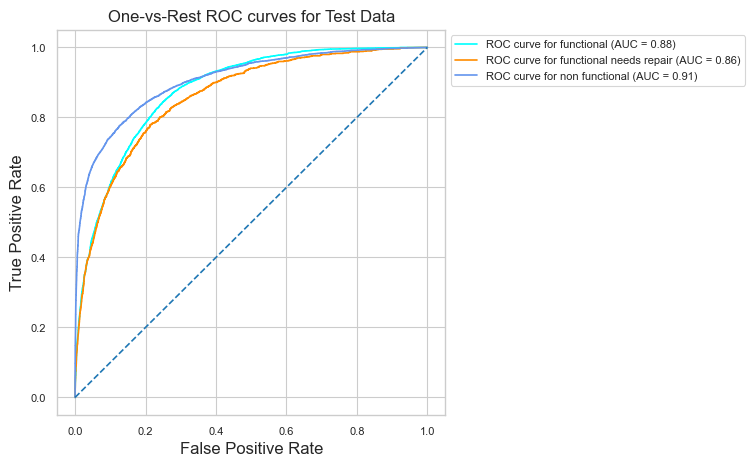

In [674]:
roc_auc_cuve("Test Data",rf,X_train,y_train,X_test,y_test_encoded)

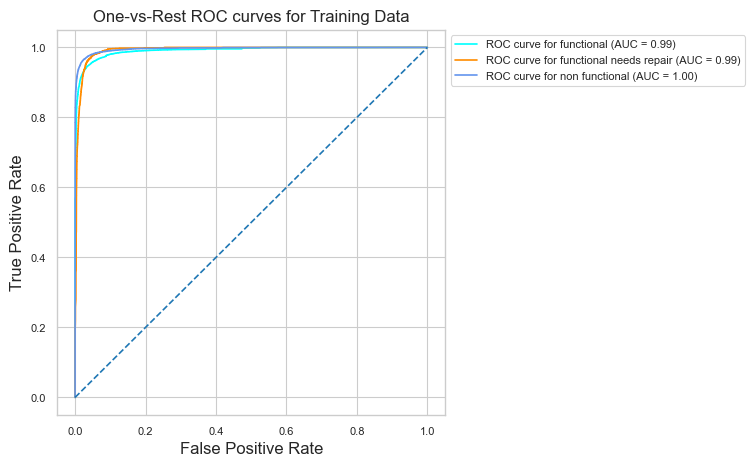

In [675]:
roc_auc_cuve("Training Data",rf,X_train,y_train,X_train,y_train_encoded)

In [1267]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",50,1000,step = 50)
    
    #log meaning values we be trailed from 2,32 but smaller values will be sampled more frequently rather than larger
    # If log = False meaning values should be linearly sampled like 2,4,6,8 and so on
    max_depth = trial.suggest_int("max_depth",15,50,log = True)
    criterion = trial.suggest_categorical("criterion", ['gini', 'entropy','log_loss'])
    max_features = trial.suggest_categorical("max_features",['sqrt','log2'])
    min_samples_split = trial.suggest_int("min_samples_split",2,20,step = 2)
    min_samples_leaf = trial.suggest_int("min_samples_leaf",5,30,step = 2)
    
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion = criterion,
        random_state=42,
        class_weight= 'balanced'
    )
    
    pipeline = ImbPipeline([('preprocessor',preprocessor),
                  ('smote',smote),
                       ('rf',clf)
                      ])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    F1_score = f1_score(y_test,y_pred,average = 'micro')
    
    # Return the negative mean score (Optuna minimizes the objective function)
    return F1_score


In [1268]:
# For Optuna to give same results for every run # Set a seed for Optuna
study = optuna.create_study(direction="maximize")

# Optimize hyperparameters
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
trial = study.best_trial
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-10-03 14:36:45,245] A new study created in memory with name: no-name-27849370-a7c7-440d-bebc-2057562d9ebd
[I 2023-10-03 14:37:34,632] Trial 0 finished with value: 0.7092644581695676 and parameters: {'n_estimators': 400, 'max_depth': 15, 'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.7092644581695676.
[I 2023-10-03 14:38:18,960] Trial 1 finished with value: 0.7363279056709714 and parameters: {'n_estimators': 250, 'max_depth': 44, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.7363279056709714.
[I 2023-10-03 14:39:57,608] Trial 2 finished with value: 0.7364963503649634 and parameters: {'n_estimators': 600, 'max_depth': 31, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.7364963503649634.
[I 2023-10-03 14:40:47,148] Trial 3 finished with value: 0.7221

[I 2023-10-03 15:26:43,663] Trial 30 finished with value: 0.7344750140370578 and parameters: {'n_estimators': 550, 'max_depth': 23, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 17 with value: 0.746378439079169.
[I 2023-10-03 15:28:52,611] Trial 31 finished with value: 0.745199326221224 and parameters: {'n_estimators': 650, 'max_depth': 26, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 17 with value: 0.746378439079169.
[I 2023-10-03 15:30:47,839] Trial 32 finished with value: 0.7359348680516564 and parameters: {'n_estimators': 650, 'max_depth': 26, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 17 with value: 0.746378439079169.
[I 2023-10-03 15:33:29,696] Trial 33 finished with value: 0.7470522178551375 and parameters: {'n_estimators': 800, 'max_depth': 30, 'criterion': 'entropy', 'max_features': '

[I 2023-10-03 17:16:53,371] Trial 60 finished with value: 0.7303761931499158 and parameters: {'n_estimators': 700, 'max_depth': 35, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 33 with value: 0.7470522178551375.
[I 2023-10-03 17:22:30,975] Trial 61 finished with value: 0.7470522178551375 and parameters: {'n_estimators': 800, 'max_depth': 30, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 33 with value: 0.7470522178551375.
[I 2023-10-03 19:24:13,332] Trial 62 finished with value: 0.7466591802358226 and parameters: {'n_estimators': 600, 'max_depth': 30, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 33 with value: 0.7470522178551375.
[I 2023-10-03 19:26:13,708] Trial 63 finished with value: 0.7471083660864682 and parameters: {'n_estimators': 550, 'max_depth': 32, 'criterion': 'entropy', 'max_features

[I 2023-10-03 20:14:46,893] Trial 90 finished with value: 0.7475575519371139 and parameters: {'n_estimators': 100, 'max_depth': 37, 'criterion': 'log_loss', 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 75 with value: 0.7482313307130827.
[I 2023-10-03 20:17:12,834] Trial 91 finished with value: 0.7469399213924761 and parameters: {'n_estimators': 500, 'max_depth': 36, 'criterion': 'log_loss', 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 75 with value: 0.7482313307130827.
[I 2023-10-03 20:18:02,710] Trial 92 finished with value: 0.747164514317799 and parameters: {'n_estimators': 150, 'max_depth': 37, 'criterion': 'log_loss', 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 75 with value: 0.7482313307130827.
[I 2023-10-03 20:18:57,614] Trial 93 finished with value: 0.7475575519371139 and parameters: {'n_estimators': 100, 'max_depth': 37, 'criterion': 'log_loss', 'max_featu

Best Hyperparameters: {'n_estimators': 400, 'max_depth': 38, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 5}


In [926]:
#ImbPipeline
rf = ImbPipeline([('preprocessor',preprocessor),
                  ('adasyn',adasyn),
                    ('rf',RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                                   max_depth = best_params['max_depth'],
                                                   criterion = best_params['criterion'],
                                                   max_features = best_params['max_features'],
                                                   bootstrap = True,
                                                   min_samples_split = best_params['min_samples_split'],
                                                   min_samples_leaf = best_params['min_samples_leaf']))
                 ])


In [1024]:
model_evaluate("Random Forest with HyperParameter Tuning",rf, X_train, X_test, y_train_encoded, y_test_encoded)

Evaluation Metrics of Random Forest with HyperParameter Tuning

Classification Report for Random Forest with HyperParameter Tuning:
                         precision    recall  f1-score   support

             functional       0.91      0.35      0.51      9672
functional needs repair       0.28      0.66      0.39      1294
         non functional       0.85      0.60      0.70      6844

              micro avg       0.72      0.47      0.57     17810
              macro avg       0.68      0.54      0.53     17810
           weighted avg       0.84      0.47      0.57     17810
            samples avg       0.47      0.47      0.47     17810

Accuracy Score: 0.47
ROC Score: 0.69
Mean CV Score:0.45


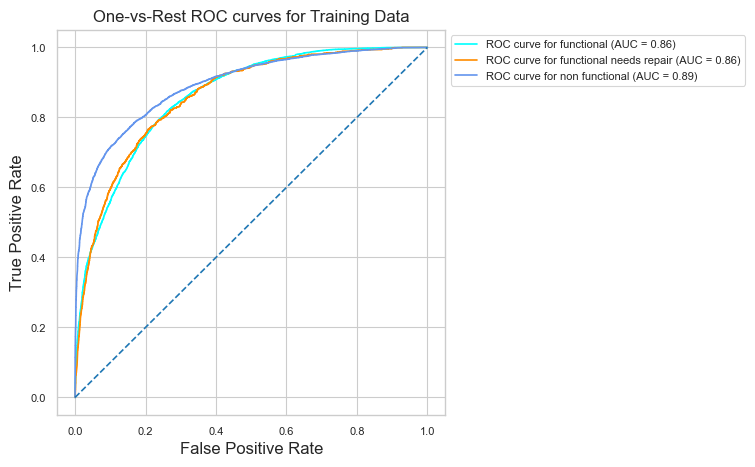

In [931]:
roc_auc_cuve("Training Data",rf, X_train, y_train, X_test, y_test_encoded)

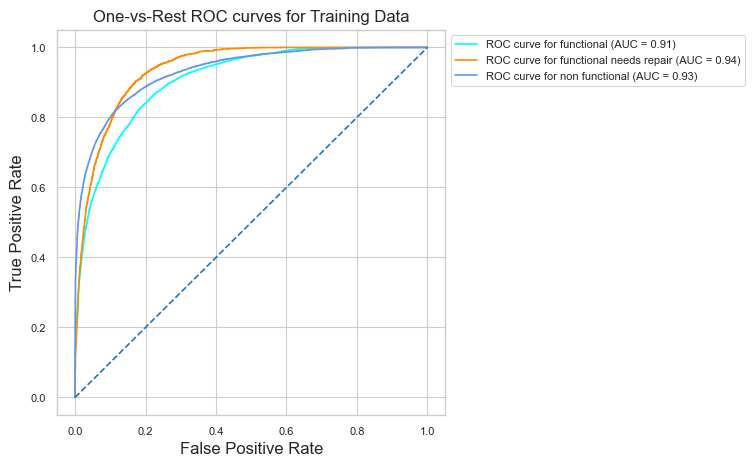

In [928]:
roc_auc_cuve("Training Data",rf, X_train, y_train, X_train, y_train_encoded)

#### Random Forest with Feature Selection

In [947]:
rf = ImbPipeline([('preprocessor',preprocessor),
                  ('smote',smote),
                  ('Feature Selection',SelectKBest(score_func = mutual_info_classif,k =  20)),
                       ('rf',RandomForestClassifier(random_state = 101,oob_score = True,max_depth = 20))])

In [948]:
model_evaluate("Random Forest with HyperParameter Tuning",rf, X_train, X_test, y_train_label, y_test_label)

Evaluation Metrics of Random Forest with HyperParameter Tuning

Classification Report for Random Forest with HyperParameter Tuning:
                         precision    recall  f1-score   support

             functional       0.80      0.82      0.81      9672
functional needs repair       0.82      0.72      0.77      6844
         non functional       0.35      0.50      0.41      1294

               accuracy                           0.76     17810
              macro avg       0.66      0.68      0.66     17810
           weighted avg       0.77      0.76      0.76     17810

Accuracy Score: 0.76
Mean CV Score:0.75


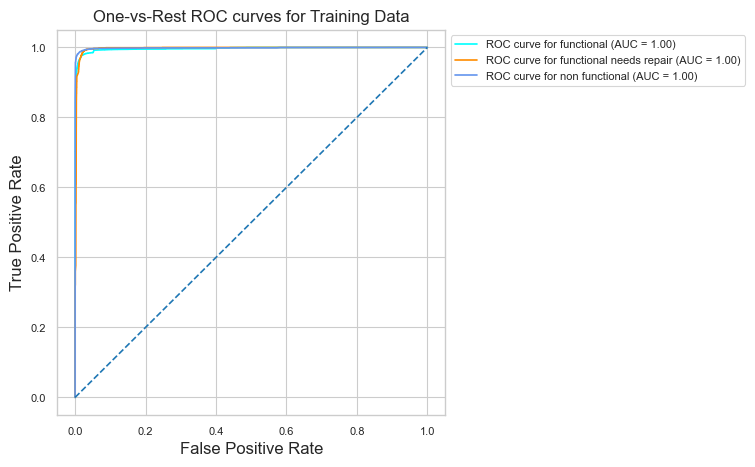

In [946]:
roc_auc_cuve("Training Data",rf, X_train, y_train, X_train, y_train_encoded)

In [115]:
rf = ImbPipeline([('preprocessor',preprocessor),
                  ('adasyn',adasyn),
                       ('rf',RandomForestClassifier(random_state = 101,oob_score = True))
                      ])

In [116]:
model_evaluate("Random Forest with HyperParameter Tuning",rf, X_train, X_test, y_train_encoded, y_test_encoded)

Evaluation Metrics of Random Forest with HyperParameter Tuning

Classification Report for Random Forest with HyperParameter Tuning:
                         precision    recall  f1-score   support

             functional       0.83      0.79      0.81      6447
functional needs repair       0.41      0.45      0.43       863
         non functional       0.84      0.75      0.79      4563

              micro avg       0.79      0.75      0.77     11873
              macro avg       0.69      0.67      0.68     11873
           weighted avg       0.80      0.75      0.77     11873
            samples avg       0.75      0.75      0.75     11873

Accuracy Score: 0.75
ROC Score: 0.78
Mean CV Score:0.74


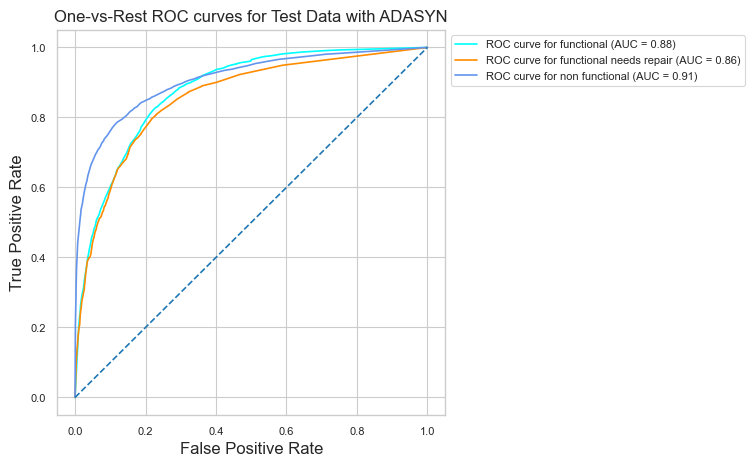

In [121]:
roc_auc_cuve("Test Data with ADASYN",rf,X_train,y_train,X_test,y_test_encoded)

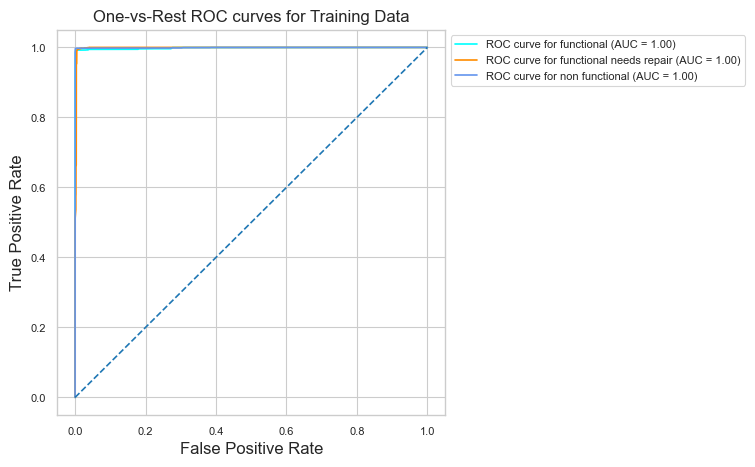

In [122]:
roc_auc_cuve("Training Data",rf,X_train,y_train,X_train,y_train_encoded)

#### Gradient Boosting Classifier

In [116]:
gb = ImbPipeline([('preprocessor',preprocessor),
                  ('smote',smote),
                       ('gb',GradientBoostingClassifier())
                      ])

In [117]:
model_evaluate("Gradient Boosting with SMOTE",gb, X_train, X_test, y_train_encoded, y_test_encoded,'gb')

ValueError: y should be a 1d array, got an array of shape (45780, 3) instead.

#### XGBoost Classifier

In [100]:
xg = ImbPipeline([('preprocessor',preprocessor),
                  ('smote',smote),
                       ('xg',XGBClassifier())
                      ])

In [101]:
model_evaluate("XGBoost with SMOTE",xg, X_train, X_test, y_train_encoded, y_test_encoded,'xg')

Evaluation Metrics of XGBoost with SMOTE

Classification Report for XGBoost with SMOTE:
                         precision    recall  f1-score   support

             functional       0.81      0.78      0.79      9672
functional needs repair       0.40      0.45      0.42      1294
         non functional       0.86      0.68      0.76      6844

              micro avg       0.79      0.71      0.75     17810
              macro avg       0.69      0.63      0.66     17810
           weighted avg       0.80      0.71      0.75     17810
            samples avg       0.70      0.71      0.71     17810

Accuracy Score: 0.69
Mean CV Score:0.68


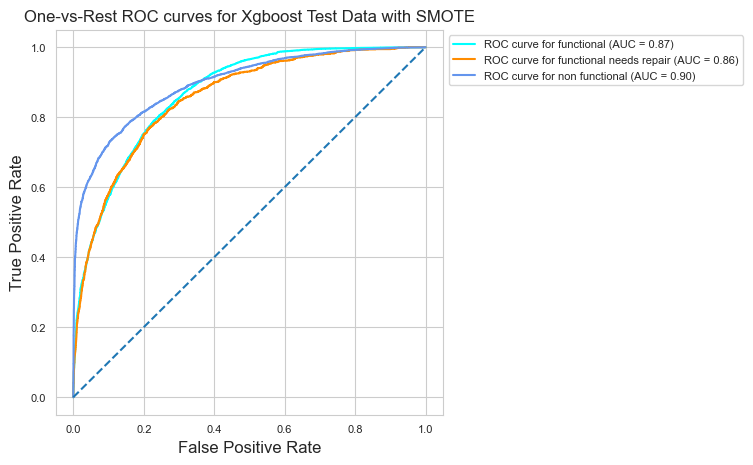

In [102]:
roc_auc_cuve("Xgboost Test Data with SMOTE",xg,X_train,y_train_encoded,X_test,y_test_encoded)

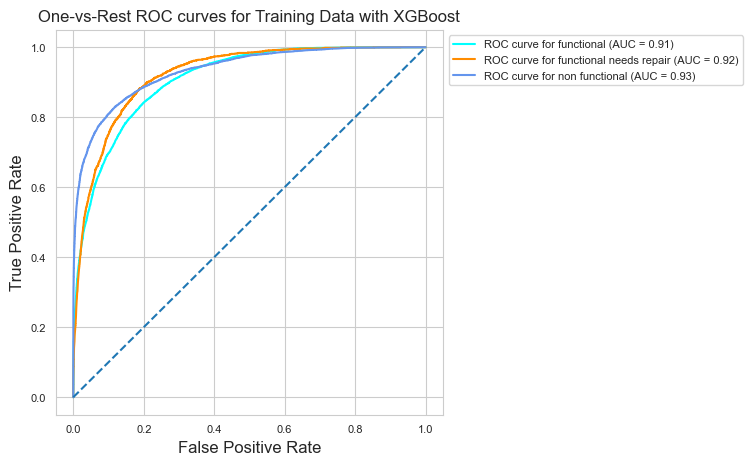

In [103]:
roc_auc_cuve("Training Data with XGBoost",xg,X_train,y_train_encoded,X_train,y_train_encoded)

As the Data is Not Overfitting But we will use Optuna for Hyperparameter Tunning for the Better Accuracy. 

In [104]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 1000, step=50)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_float('min_child_weight', 0.1, 10)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-9, 100)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-9, 100)

    clf = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        learning_rate=learning_rate,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        seed = 42
    )

    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('xgb', clf)
    ])
    
    pipeline.fit(X_train, y_train_label)
    y_pred = pipeline.predict(X_test)
    F1_score = f1_score(y_test_label, y_pred, average='micro')

    # Return the negative mean score (Optuna minimizes the objective function)
    return F1_score

In [105]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=100)  

[I 2023-10-03 23:56:42,911] A new study created in memory with name: no-name-ffced01c-29a2-44a7-a649-cf0e2ccd7b7c
[I 2023-10-03 23:56:48,765] Trial 0 finished with value: 0.7228523301516002 and parameters: {'n_estimators': 350, 'max_depth': 3, 'min_child_weight': 7.259980147749193, 'subsample': 0.7222685601591331, 'colsample_bytree': 0.148620529467546, 'learning_rate': 0.04108173291671051, 'reg_alpha': 0.06758553274373938, 'reg_lambda': 15.190415684165387}. Best is trial 0 with value: 0.7228523301516002.
[I 2023-10-03 23:57:13,338] Trial 1 finished with value: 0.76614261650758 and parameters: {'n_estimators': 650, 'max_depth': 9, 'min_child_weight': 6.232700073853636, 'subsample': 0.48523252827559393, 'colsample_bytree': 0.9065387686881055, 'learning_rate': 0.003951010405979857, 'reg_alpha': 0.0012669500468801913, 'reg_lambda': 0.048531318821086925}. Best is trial 1 with value: 0.76614261650758.
[I 2023-10-03 23:57:33,251] Trial 2 finished with value: 0.7540145985401459 and parameters:

[I 2023-10-04 09:10:25,133] Trial 21 finished with value: 0.7904548006737788 and parameters: {'n_estimators': 700, 'max_depth': 7, 'min_child_weight': 4.636379201002308, 'subsample': 0.7035510299892882, 'colsample_bytree': 0.4977824737959968, 'learning_rate': 0.09578124215304817, 'reg_alpha': 8.443395369022684e-05, 'reg_lambda': 0.3696123631825345}. Best is trial 21 with value: 0.7904548006737788.
[I 2023-10-04 09:10:52,920] Trial 22 finished with value: 0.7895002807411566 and parameters: {'n_estimators': 850, 'max_depth': 6, 'min_child_weight': 3.567535550180912, 'subsample': 0.675189143397237, 'colsample_bytree': 0.41251176831387065, 'learning_rate': 0.09907568708635292, 'reg_alpha': 0.00014252783201189643, 'reg_lambda': 0.3393889031383376}. Best is trial 21 with value: 0.7904548006737788.
[I 2023-10-04 09:11:18,178] Trial 23 finished with value: 0.7905109489051096 and parameters: {'n_estimators': 550, 'max_depth': 9, 'min_child_weight': 6.2091195222921645, 'subsample': 0.74757658839

[I 2023-10-04 09:17:52,175] Trial 42 finished with value: 0.7810780460415496 and parameters: {'n_estimators': 150, 'max_depth': 8, 'min_child_weight': 3.8352809716124177, 'subsample': 0.958487994249583, 'colsample_bytree': 0.9747113292106229, 'learning_rate': 0.05041370743684998, 'reg_alpha': 7.042762944601463e-09, 'reg_lambda': 0.011809193236229948}. Best is trial 40 with value: 0.7950589556428973.
[I 2023-10-04 09:18:06,060] Trial 43 finished with value: 0.7937675463222909 and parameters: {'n_estimators': 300, 'max_depth': 9, 'min_child_weight': 3.037411162405464, 'subsample': 0.982725149153032, 'colsample_bytree': 0.9850128030539322, 'learning_rate': 0.08295018991624781, 'reg_alpha': 2.863780147618812e-09, 'reg_lambda': 0.08200552119077525}. Best is trial 40 with value: 0.7950589556428973.
[I 2023-10-04 09:18:22,607] Trial 44 finished with value: 0.7924761370016844 and parameters: {'n_estimators': 350, 'max_depth': 9, 'min_child_weight': 3.776105309660708, 'subsample': 0.84408532107

[I 2023-10-04 09:22:47,189] Trial 63 finished with value: 0.7925884334643458 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_child_weight': 3.120959753817829, 'subsample': 0.9892601312767721, 'colsample_bytree': 0.9987372484328205, 'learning_rate': 0.06344087379412258, 'reg_alpha': 1.3596122483828641e-08, 'reg_lambda': 0.17439932506765488}. Best is trial 40 with value: 0.7950589556428973.
[I 2023-10-04 09:22:53,867] Trial 64 finished with value: 0.7714205502526671 and parameters: {'n_estimators': 100, 'max_depth': 9, 'min_child_weight': 3.9167784847233222, 'subsample': 0.9617428815033865, 'colsample_bytree': 0.9609949289084894, 'learning_rate': 0.030889185168601847, 'reg_alpha': 7.831208739342215e-09, 'reg_lambda': 0.07100345914784656}. Best is trial 40 with value: 0.7950589556428973.
[I 2023-10-04 09:23:05,844] Trial 65 finished with value: 0.7905670971364402 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_child_weight': 3.5869486669769928, 'subsample': 0.86468

[I 2023-10-04 09:34:32,074] Trial 84 finished with value: 0.794329028635598 and parameters: {'n_estimators': 600, 'max_depth': 8, 'min_child_weight': 0.7970996875309794, 'subsample': 0.9760097312911311, 'colsample_bytree': 0.8093903247465841, 'learning_rate': 0.04401475528587251, 'reg_alpha': 1.6865609554255964e-09, 'reg_lambda': 5.5913196509957915e-05}. Best is trial 40 with value: 0.7950589556428973.
[I 2023-10-04 09:35:02,367] Trial 85 finished with value: 0.7946659180235821 and parameters: {'n_estimators': 700, 'max_depth': 8, 'min_child_weight': 0.7606539363057797, 'subsample': 0.9499835170295687, 'colsample_bytree': 0.7576789754498808, 'learning_rate': 0.041571376922103595, 'reg_alpha': 1.171351798362229e-09, 'reg_lambda': 4.717333856854414e-05}. Best is trial 40 with value: 0.7950589556428973.
[I 2023-10-04 09:35:28,224] Trial 86 finished with value: 0.7904548006737788 and parameters: {'n_estimators': 700, 'max_depth': 7, 'min_child_weight': 0.7417491046876128, 'subsample': 0.90

In [106]:
# Print the best hyperparameters and F1-score
best_params = study_xgb.best_params
best_f1 = study_xgb.best_value

print(f"Best Hyperparameters: {best_params}")
print(f"Best F1-score: {best_f1}")

Best Hyperparameters: {'n_estimators': 650, 'max_depth': 8, 'min_child_weight': 0.6563013612682002, 'subsample': 0.9460521288515937, 'colsample_bytree': 0.8340234595028394, 'learning_rate': 0.04530200631764155, 'reg_alpha': 2.123953767853943e-09, 'reg_lambda': 0.0005854093548574767}
Best F1-score: 0.7956765861875351


In [107]:
xg = ImbPipeline([('preprocessor',preprocessor),
                  ('smote',smote),
                       ('xg',XGBClassifier(n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_child_weight=best_params['min_child_weight'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        learning_rate=best_params['learning_rate'],
        reg_alpha=best_params['reg_alpha'],
        reg_lambda=best_params['reg_lambda']))
                      ])


In [108]:
model_evaluate("XGBoost with SMOTE",xg, X_train, X_test, y_train_encoded, y_test_encoded,'xg')

Evaluation Metrics of XGBoost with SMOTE

Classification Report for XGBoost with SMOTE:
                         precision    recall  f1-score   support

             functional       0.82      0.81      0.81      9672
functional needs repair       0.42      0.44      0.43      1294
         non functional       0.86      0.71      0.78      6844

              micro avg       0.80      0.74      0.77     17810
              macro avg       0.70      0.65      0.67     17810
           weighted avg       0.81      0.74      0.77     17810
            samples avg       0.74      0.74      0.74     17810

Accuracy Score: 0.73
Mean CV Score:0.72


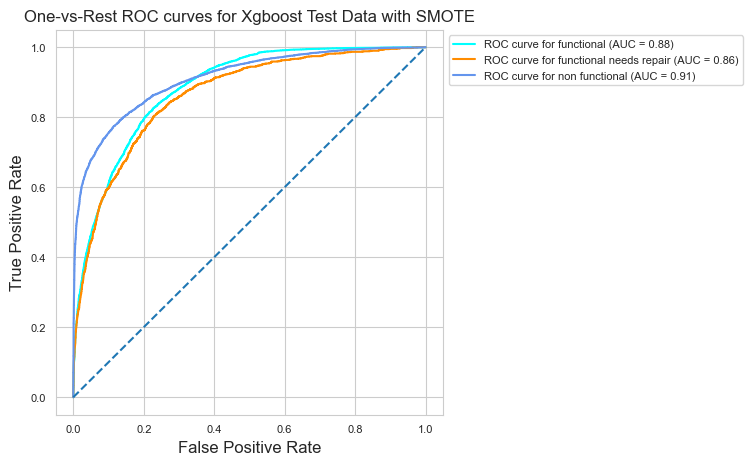

In [109]:
roc_auc_cuve("Xgboost Test Data with SMOTE",xg, X_train, y_train_encoded, X_test, y_test_encoded)

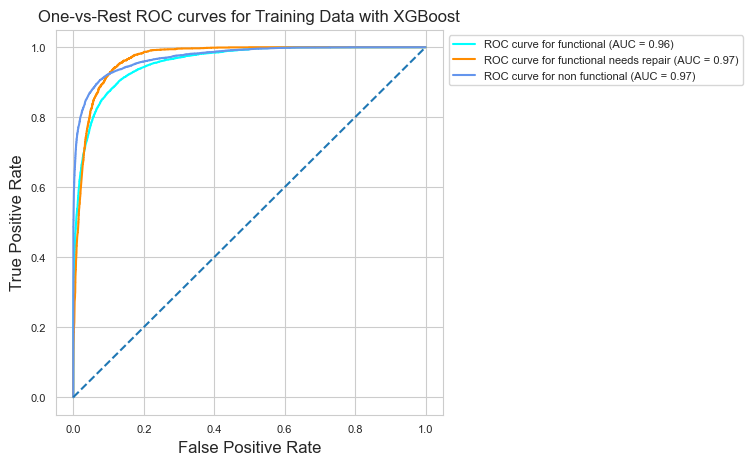

In [110]:
roc_auc_cuve("Training Data with XGBoost",xg,X_train,y_train_encoded,X_train,y_train_encoded)

In [112]:
xg = ImbPipeline([('preprocessor',preprocessor),
                  ('adasyn',adasyn),
                       ('xg',XGBClassifier(n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_child_weight=best_params['min_child_weight'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        learning_rate=best_params['learning_rate'],
        reg_alpha=best_params['reg_alpha'],
        reg_lambda=best_params['reg_lambda']))
                      ])


In [114]:
model_evaluate("XGBoost with SMOTE",xg, X_train, X_test, y_train_encoded, y_test_encoded,'xg')

Evaluation Metrics of XGBoost with SMOTE

Classification Report for XGBoost with SMOTE:
                         precision    recall  f1-score   support

             functional       0.82      0.80      0.81      9672
functional needs repair       0.41      0.45      0.43      1294
         non functional       0.86      0.71      0.78      6844

              micro avg       0.80      0.74      0.77     17810
              macro avg       0.70      0.65      0.67     17810
           weighted avg       0.80      0.74      0.77     17810
            samples avg       0.73      0.74      0.74     17810

Accuracy Score: 0.73
Mean CV Score:0.72


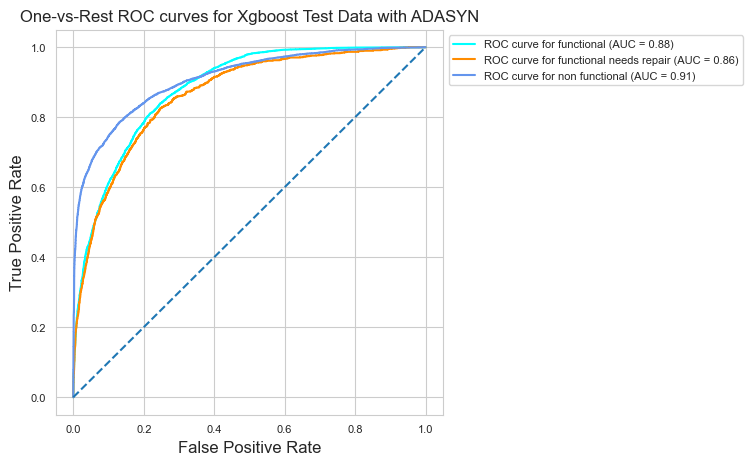

In [113]:
roc_auc_cuve("Xgboost Test Data with ADASYN",xg, X_train, y_train_encoded, X_test, y_test_encoded)

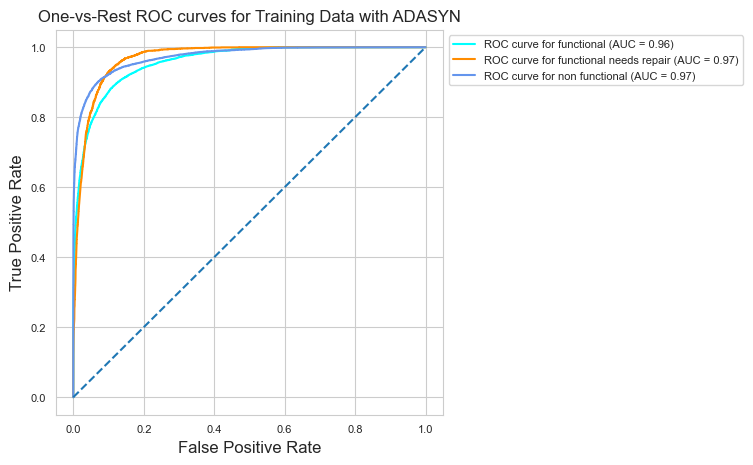

In [115]:
roc_auc_cuve("Training Data with ADASYN",xg,X_train,y_train_encoded,X_train,y_train_encoded)

#checking pipeline 

In [176]:
X

date_recorded           funder  gps_height     installer  longitude  \
0        2011-03-14            Roman        1390         Roman  34.938093   
1        2013-03-06          Grumeti        1399       GRUMETI  34.698766   
2        2013-02-25     Lottery Club         686  World vision  37.460664   
3        2013-01-28           Unicef         263        UNICEF  38.486161   
4        2011-07-13      Action In A           0       Artisan  31.130847   
...             ...              ...         ...           ...        ...   
59395    2013-05-03  Germany Republi        1210           CES  37.169807   
59396    2011-05-07      Cefa-njombe        1212          Cefa  35.249991   
59397    2011-04-11              NaN           0           NaN  34.017087   
59398    2011-03-08            Malec           0          Musa  35.861315   
59399    2011-03-23       World Bank         191         World  38.104048   

        latitude              wpt_name                    basin    subvillage  \
0      -9.856322                  none               Lake Nyasa      Mnyusi B   
1      -2.147466              Zahanati            Lake Victoria       Nyamara   
2      -3.821329           Kwa Mahundi                  Pangani       Majengo   
3     -11.155298  Zahanati Ya Nanyumbu  Ruvuma / Southern Coast    Mahakamani   
4      -1.825359               Shuleni            Lake Victoria    Kyanyamisa   
...          ...                   ...                      ...           ...   
59395  -3.253847   Area Three Namba 27                  Pangani      Kiduruni   
59396  -9.070629     Kwa Yahona Kuvala                   Rufiji      Igumbilo   
59397  -8.750434               Mashine                   Rufiji     Madungulu   
59398  -6.378573                Mshoro                   Rufiji        Mwinyi   
59399  -6.747464       Kwa Mzee Lugawa              Wami / Ruvu  Kikatanyemba   

            region  region_code  district_code             lga  \
0           Iringa           11              5          Ludewa   
1             Mara           20              2       Serengeti   
2          Manyara           21              4       Simanjiro   
3           Mtwara           90             63        Nanyumbu   
4           Kagera           18              1         Karagwe   
...            ...          ...            ...             ...   
59395  Kilimanjaro            3              5             Hai   
59396       Iringa           11              4          Njombe   
59397        Mbeya           12              7         Mbarali   
59398       Dodoma            1              4        Chamwino   
59399     Morogoro            5              2  Morogoro Rural   

                   ward  population public_meeting              recorded_by  \
0              Mundindi         109           True  GeoData Consultants Ltd   
1                 Natta         280            NaN  GeoData Consultants Ltd   
2               Ngorika         250           True  GeoData Consultants Ltd   
3              Nanyumbu          58           True  GeoData Consultants Ltd   
4            Nyakasimbi           0           True  GeoData Consultants Ltd   
...                 ...         ...            ...                      ...   
59395  Masama Magharibi         125           True  GeoData Consultants Ltd   
59396            Ikondo          56           True  GeoData Consultants Ltd   
59397           Chimala           0           True  GeoData Consultants Ltd   
59398      Mvumi Makulu           0           True  GeoData Consultants Ltd   
59399        Ngerengere         150           True  GeoData Consultants Ltd   

      scheme_management                  scheme_name permit  \
0                   VWC                        Roman  False   
1                 Other                          NaN   True   
2                   VWC  Nyumba ya mungu pipe scheme   True   
3                   VWC                          NaN   True   
4                   NaN                          Na

In [170]:
y100=dtc.predict(X)

In [171]:
y100

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

In [174]:
y100=pd.DataFrame(y100)

In [175]:
y100.value_counts()

functional                 29377
functional needs repair    18346
non functional             11641
Name: count, dtype: int64